In [1]:
library(ggplot2)
library(rvest)
library(dplyr)
library(stringr)
library(caTools)
library(repr)

Loading required package: xml2

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Source Data

In [2]:
source("/u/project/sriram/ukbiobank/33127/bd_load_data.R")


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last



In [3]:
my_data<-data

In [4]:
dim(my_data)

[1] 502508   2297

### Generate Data Type

In [4]:
theurl <- "/u/project/sriram/ukbiobank/33127/ukb39967.html"
file<-read_html(theurl)
rank_data_html <- html_nodes(file,'td :nth-child(1)')
rank_data <- html_text(rank_data_html)[-1]
type<-unique(rank_data[which(str_count(rank_data, "[0-9]")==0)])
type<-type[type!='']
id_type_ind<-which(rank_data %in% colnames(my_data) | rank_data %in% type)
id_type<-rank_data[id_type_ind]
id_type_table<-data.frame(eid = id_type[seq(1,length(id_type),by=2)], type = id_type[seq(2,length(id_type),by=2)])

In [5]:
cate<-c('Categorical (single)' ,'Categorical (multiple)')
cate_cor <- as.character(id_type_table[which(id_type_table$type %in% cate),1])

In [6]:
my_data_cate<- my_data %>% select(cate_cor) %>% mutate_all(funs(factor(.)))

Warning message:
“funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session.”

In [8]:
head(my_data_cate)

19-0.0 21-0.0 31-0.0 52-0.0 54-0.0 55-0.0 120-0.0 132-0.0 190-0.0 670-0.0 ⋯
1 1      1      0      2      11001  11     9       4215002 NA      1       ⋯
2 NA     1      0      5      11018  6      9       4212005 NA      1       ⋯
3 3      3      1      6      11012  5      9       NA      NA      2       ⋯
4 1      1      0      7      11010  4      1       3211015 NA      1       ⋯
5 1      1      0      8      11012  11     1       NA      NA      1       ⋯
6 2      1      0      12     11009  5      1       NA      NA      1       ⋯
  104910-0.0 104920-0.0 110005-0.0 131215-0.0 131217-0.0 131219-0.0 131221-0.0
1 NA         NA         NA         NA         NA         NA         NA        
2 NA         NA         NA         NA         NA         NA         NA        
3 NA         NA         NA         NA         NA         NA         NA        
4 NA         NA         2          NA         NA         NA         NA        
5 NA         NA         2          NA         NA         NA         NA        
6 NA         NA         NA         NA         NA         NA         NA        
  132455-0.0 132457-0.0 132459-0.0
1 NA         NA         NA        
2 NA         NA         NA        
3 NA         NA         NA        
4 NA         NA         NA        
5 NA         NA         NA        
6 NA         NA         NA

### Dataframe with Only Categorical Variables

In [7]:
db <- my_data_cate 
db$eid <- my_data$eid
db$WBCC <- my_data$`30000-0.0`
db<- db %>% select(c('eid','WBCC'),everything())

In [11]:
str(db)

'data.frame':	502508 obs. of  1217 variables:
 $ eid       : int  1923142 5896937 2847894 5764431 4695056 2456604 5626273 4636042 5501069 2710701 ...
 $ WBCC      : num  6.6 NA 8.44 7.4 6.19 6.4 8.23 4.81 7.71 8.75 ...
 $ 19-0.0    : Factor w/ 3 levels "1","2","3": 1 NA 3 1 1 2 NA 1 1 1 ...
 $ 21-0.0    : Factor w/ 5 levels "-1","1","2","3",..: 2 2 4 2 2 2 2 2 2 2 ...
 $ 31-0.0    : Factor w/ 2 levels "0","1": 1 1 2 1 1 1 2 1 1 1 ...
 $ 52-0.0    : Factor w/ 12 levels "1","2","3","4",..: 2 5 6 7 8 12 6 12 11 11 ...
 $ 54-0.0    : Factor w/ 22 levels "10003","11001",..: 2 18 13 11 13 10 20 12 11 16 ...
 $ 55-0.0    : Factor w/ 12 levels "1","2","3","4",..: 11 6 5 4 11 5 5 2 10 3 ...
 $ 120-0.0   : Factor w/ 3 levels "1","2","9": 3 3 3 1 1 1 3 1 1 3 ...
 $ 132-0.0   : Factor w/ 10442 levels "0","1111002",..: 5451 5434 NA 2850 NA NA NA 3278 NA 7311 ...
 $ 190-0.0   : Factor w/ 5 levels "1","2","3","4",..: NA NA NA NA NA NA NA NA NA NA ...
 $ 670-0.0   : Factor w/ 7 levels "-7","-3","1",..

Summary Statistic for 
WBC - 30000-0.0
RBC - 30010-0.0

In [18]:
db %>% select(WBCC) %>% summarise(mean = mean(WBCC,na.rm=T)
                                 ,median = median(WBCC,na.rm=T)
                                 ,sd = sd(WBCC,na.rm=T)
                                 ,min = min(WBCC,na.rm=T)
                                 ,max = max(WBCC,na.rm=T)
                                 ,missing = sum(is.na(WBCC)))

mean     median sd       min max   missing
1 6.885063 6.65   2.122728 0   389.7 24334

Warning message:
“Removed 24334 rows containing non-finite values (stat_bin).”

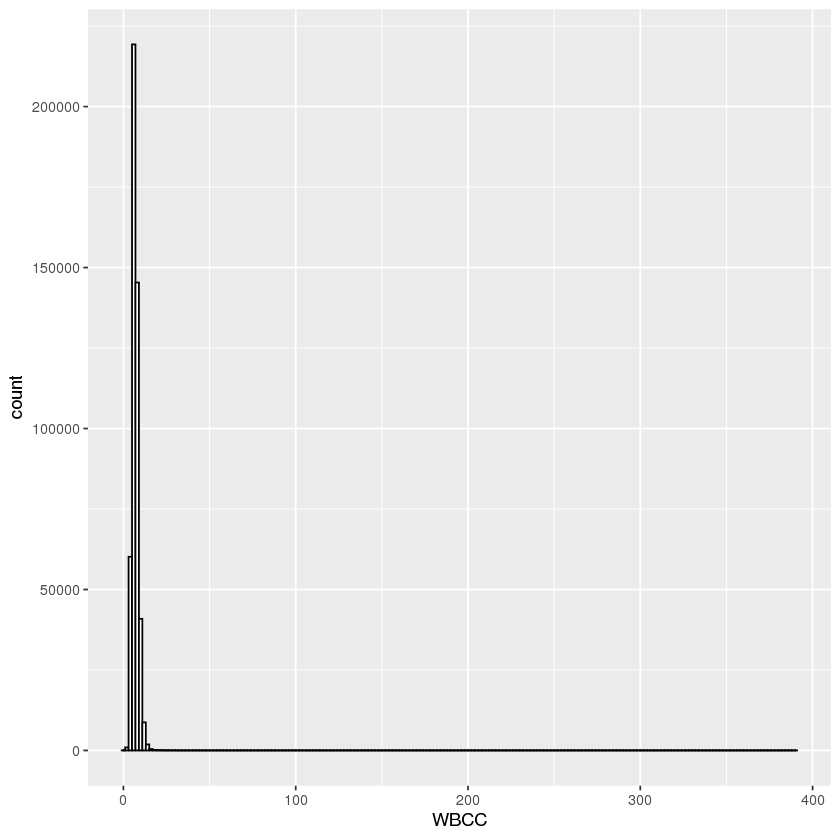

In [19]:
ggplot(db, aes(x=WBCC)) + geom_histogram(binwidth=2,color="black", fill="white")

### Remove all of the NA of white blood cell count

In [8]:
db <- db%>% filter(!is.na(WBCC))

In [9]:
dim(db)

[1] 478174   1217

### Summary of Each Categorical Variables

In [10]:
missing<-db %>% select(everything()) %>% summarise_all(funs(sum(is.na(.))))

In [11]:
missing<-as.data.frame(t(missing))

In [12]:
missing$var<-rownames(missing)
rownames(missing)<-1:length(missing$V1)

In [13]:
missing[which(missing$V1==0),'var']

[1] "eid"       "WBCC"      "31-0.0"    "52-0.0"    "54-0.0"    "55-0.0"   
 [7] "5090-0.0"  "5091-0.0"  "5136-0.0"  "5138-0.0"  "5139-0.0"  "5140-0.0" 
[13] "5141-0.0"  "5142-0.0"  "5143-0.0"  "5144-0.0"  "5145-0.0"  "5146-0.0" 
[19] "5147-0.0"  "5148-0.0"  "30004-0.0" "30505-0.0" "30525-0.0" "30535-0.0"
[25] "40001-0.0" "40002-0.0" "40006-0.0" "40020-0.0" "40021-0.0" "40022-0.0"
[31] "41200-0.0" "41201-0.0" "41202-0.0" "41203-0.0" "41204-0.0" "41205-0.0"
[37] "41210-0.0" "41221-0.0" "41229-0.0" "41230-0.0" "41270-0.0" "41271-0.0"
[43] "41272-0.0"

### Remove columns with too many missing values

In [14]:
sum(missing$V1 > dim(db)[1]*0.5)
remove_var<-missing$var[which(missing$V1 > dim(db)[1]*0.5)]
db <- db %>% select(-remove_var)

[1] 844

In [17]:
dim(db)

[1] 478174    373

### Remove columns with too many levels

In [15]:
cols<-data.frame(var = setdiff(names(db), c('eid',"WBCC"))) 
cols$var <-as.character(cols$var)
col_names<-read.csv('col_names.csv')
cols$var_names<-col_names$var_names
cols$p<-NA

In [16]:
db_levels<-as.data.frame(sapply(db,nlevels))
rm_fac<-rownames(db_levels)[which(db_levels[,1]>50 | db_levels[,1]==1)]
db<-  db %>% select(-rm_fac)
dim(db)

[1] 478174    336

In [17]:
cols<-cols %>% filter( ! var %in% rm_fac)

In [18]:
anova_p<-function(name){
    w<- paste('`',name,'`',sep = '')
    formula <- lm(as.formula(paste( "WBCC ~ ",w)),db)
    return(anova(formula)[1,5])
    }

In [19]:
for(i in 1:length(cols$var)){
    cols$p[i]<-anova_p(cols$var[i])
}

In [23]:
head(cols)

var    var_names                            p           
1 19-0.0 Heel ultrasound method               3.359716e-07
2 21-0.0 Weight method                        6.268815e-38
3 31-0.0 Sex                                  1.455398e-25
4 52-0.0 Month of birth                       3.478793e-01
5 54-0.0 UK Biobank assessment centre         0.000000e+00
6 55-0.0 Month of attending assessment centre 1.408599e-83

In [20]:
rm_p<-cols$var[which(cols$p> 10^-8)]
db<-  db %>% select(-rm_p)
cols<-cols %>% filter( ! var %in% rm_p)

In [34]:
dim(cols)

[1] 234   3

In [28]:
#write.csv(cols,'columns.csv',row.names = F)

In [21]:
plot_box<-function(var,var_name){
    print(ggplot(aes(x = get(var),y=WBCC),data = db)+ geom_boxplot()+ylim(0,25)+xlab(var_name))
}

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

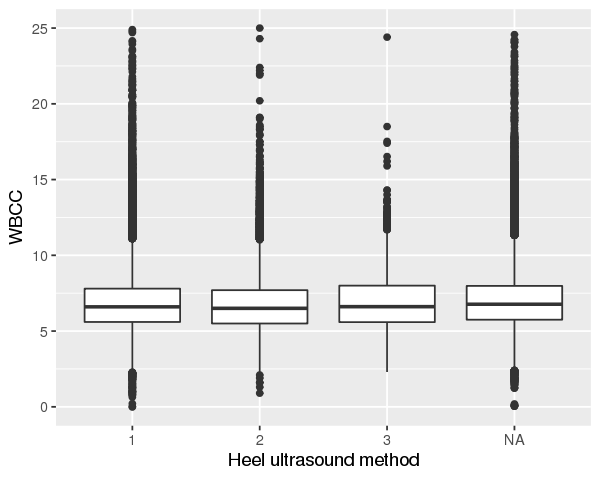

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

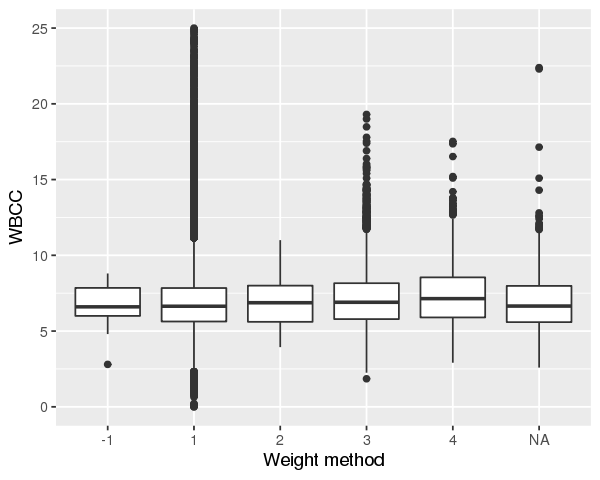

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

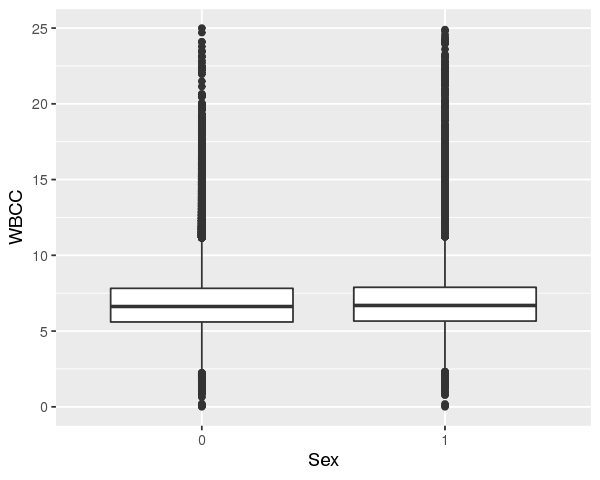

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

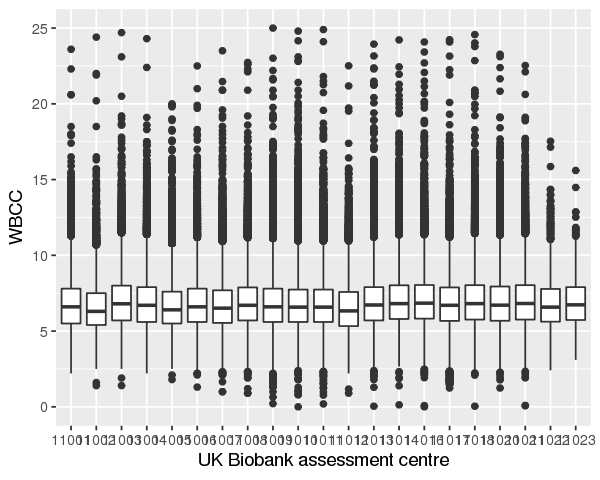

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

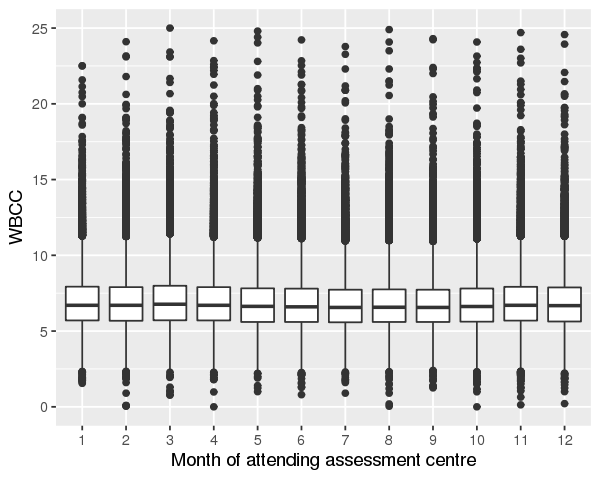

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

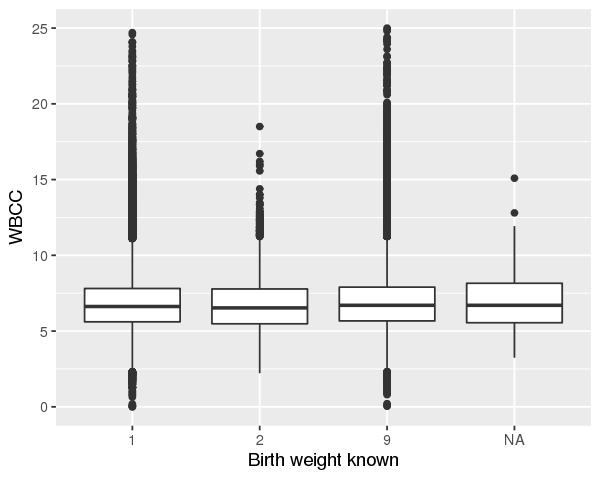

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

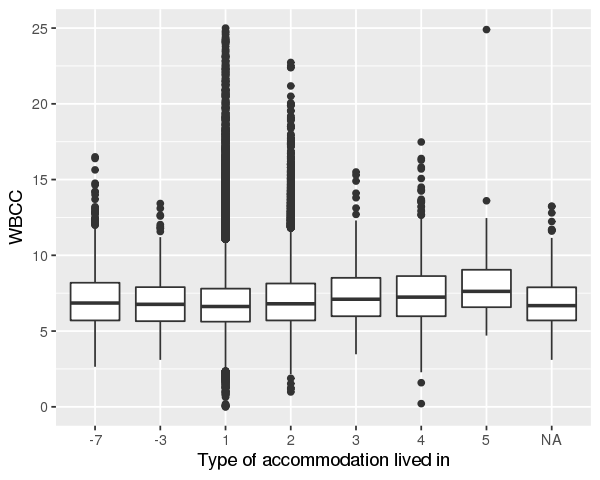

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

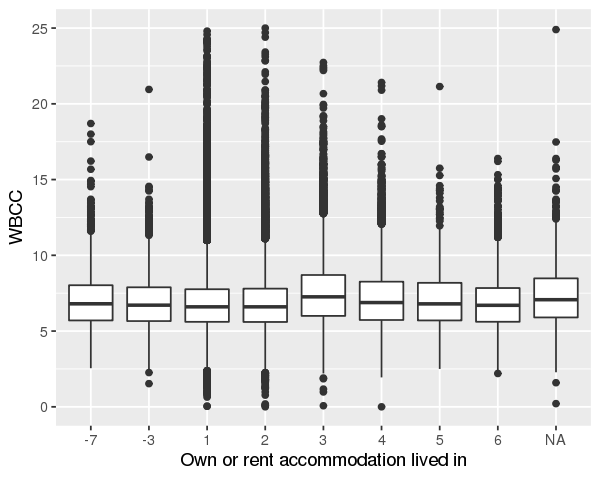

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

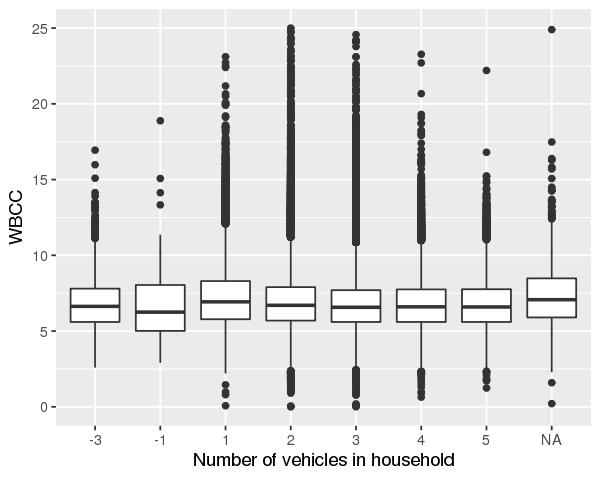

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

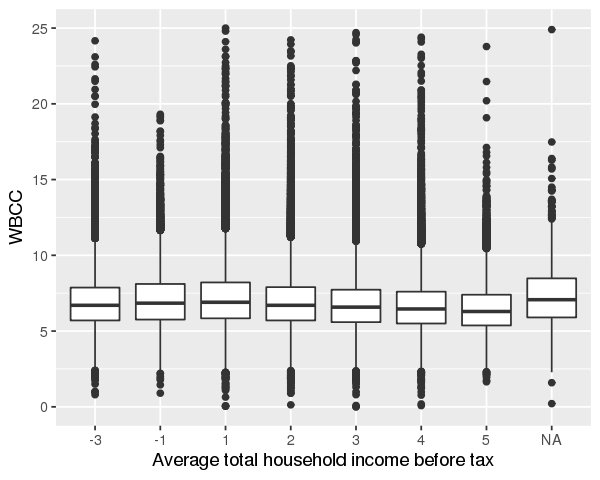

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

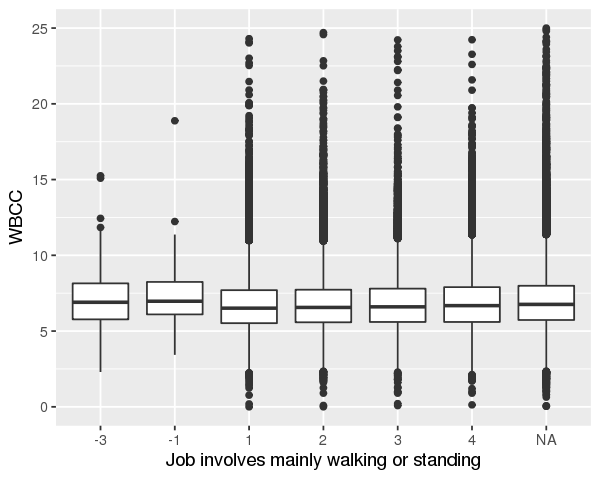

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

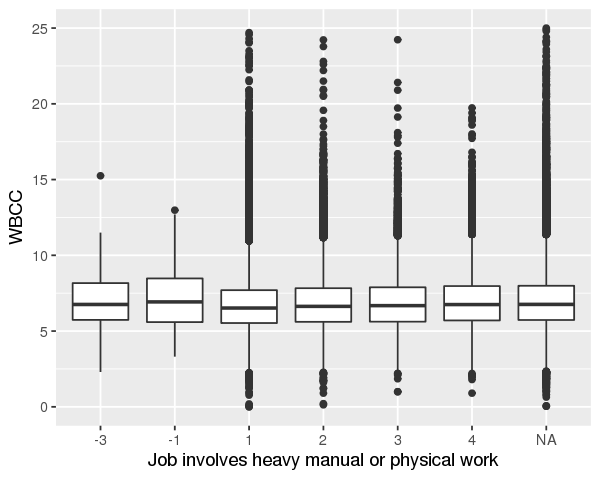

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

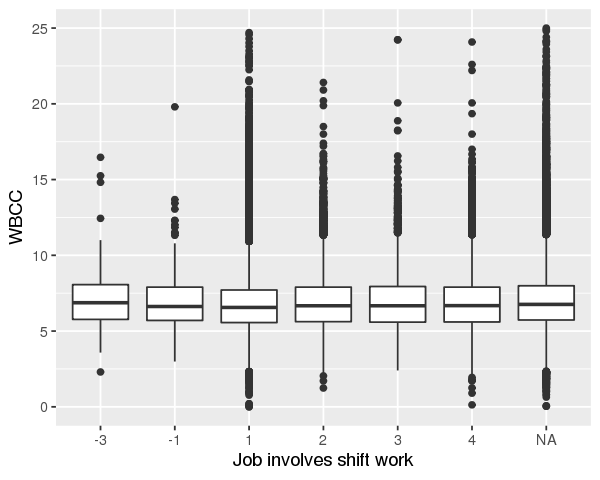

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

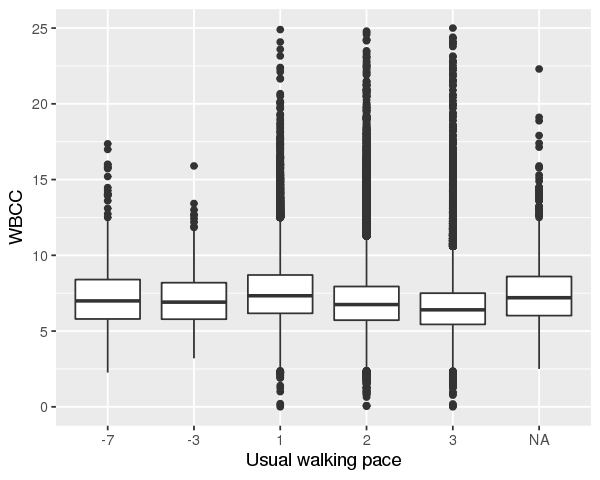

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

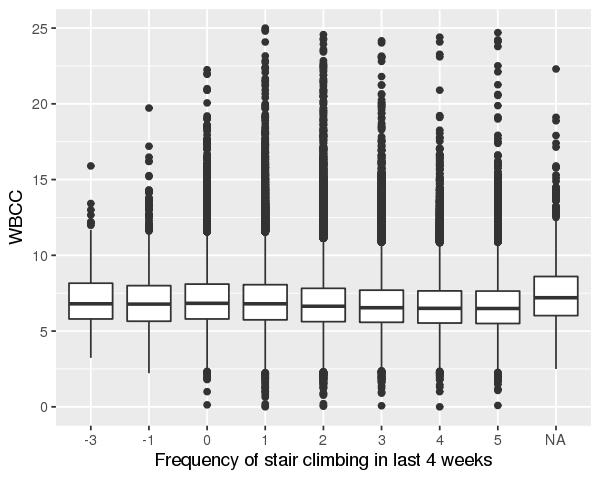

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

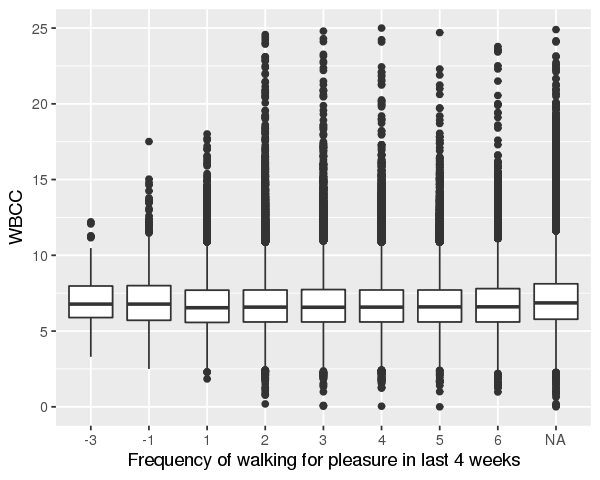

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

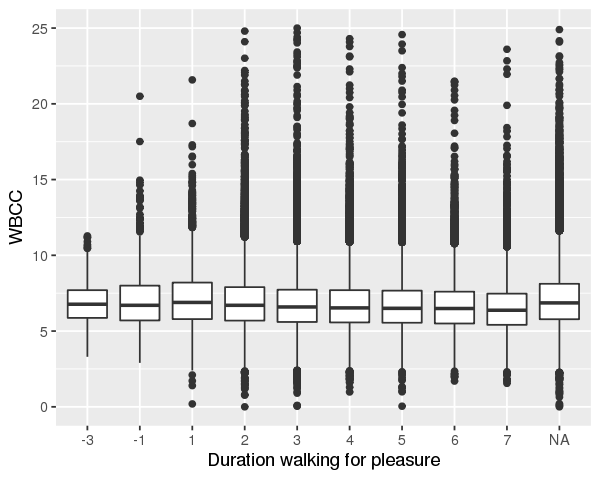

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

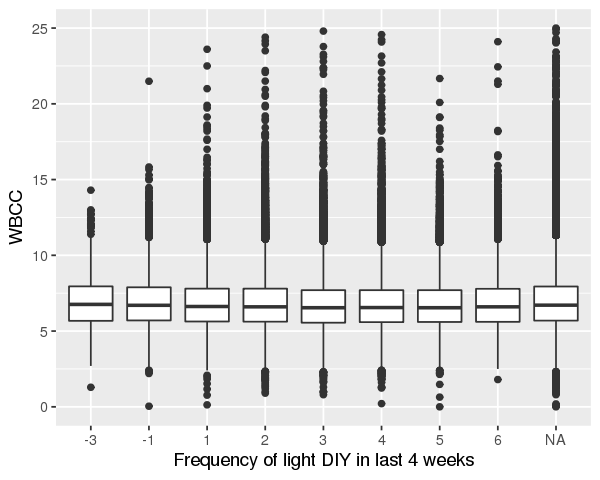

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

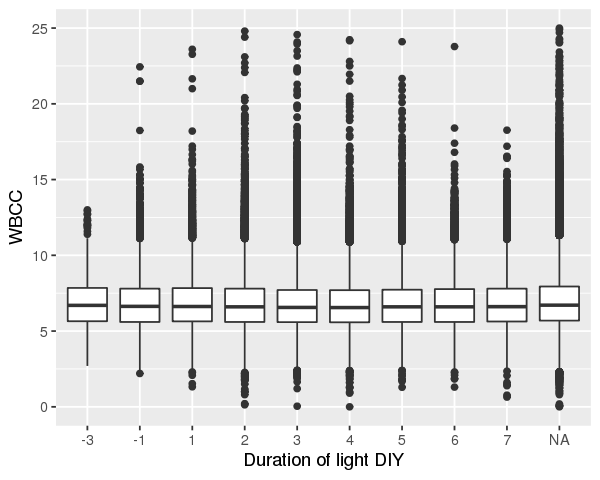

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

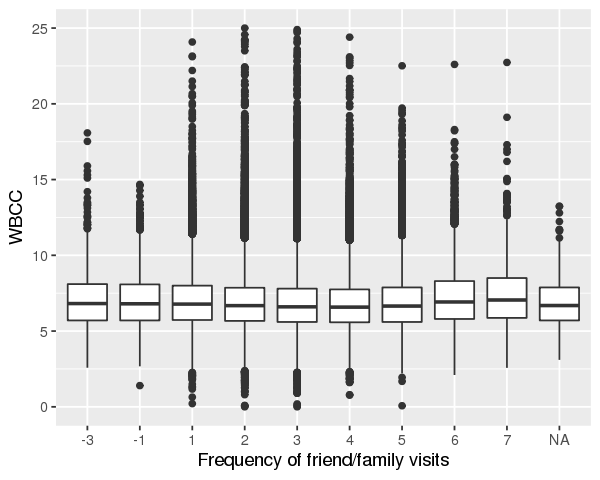

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

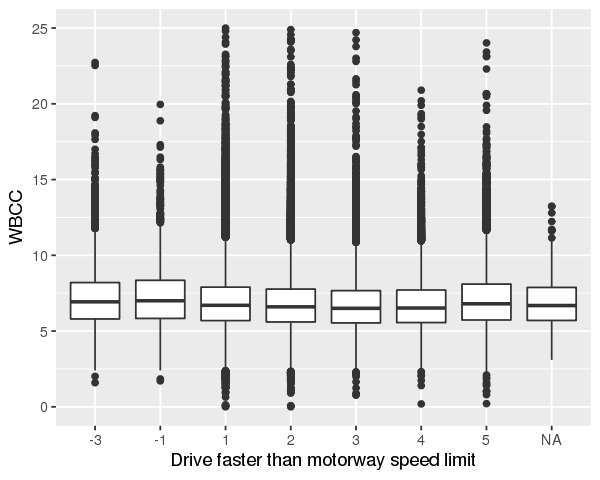

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

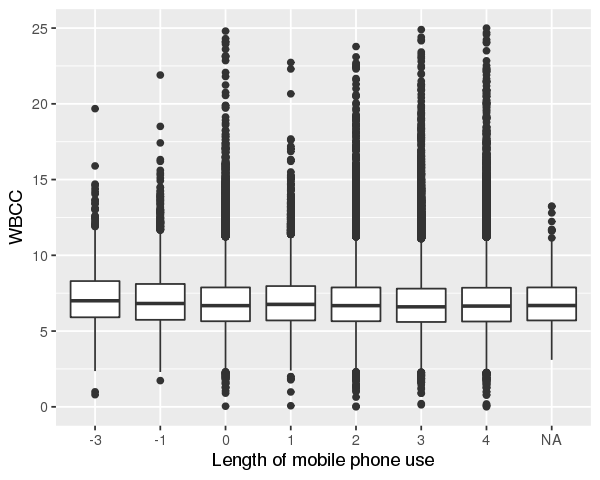

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

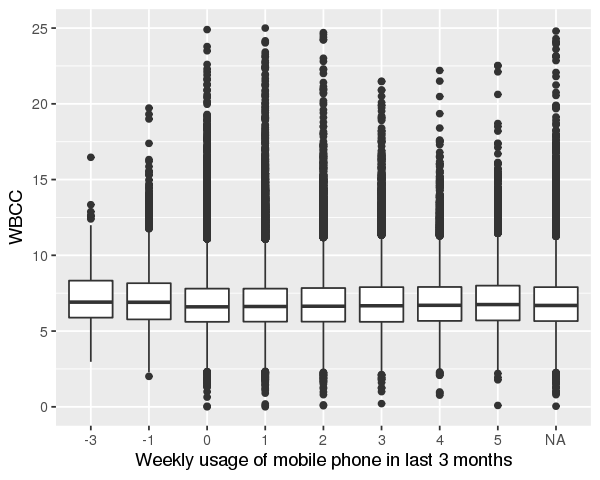

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

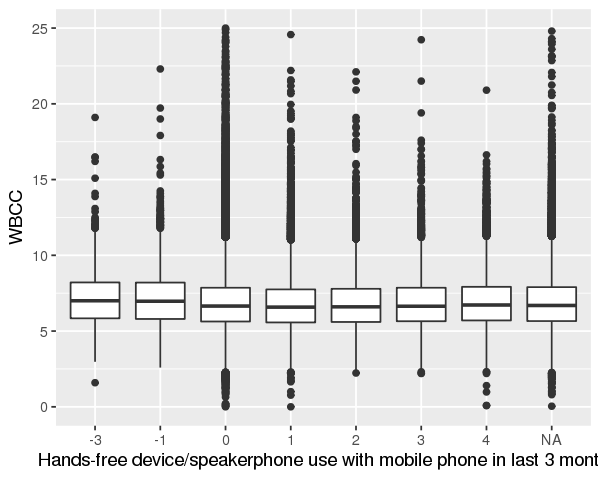

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

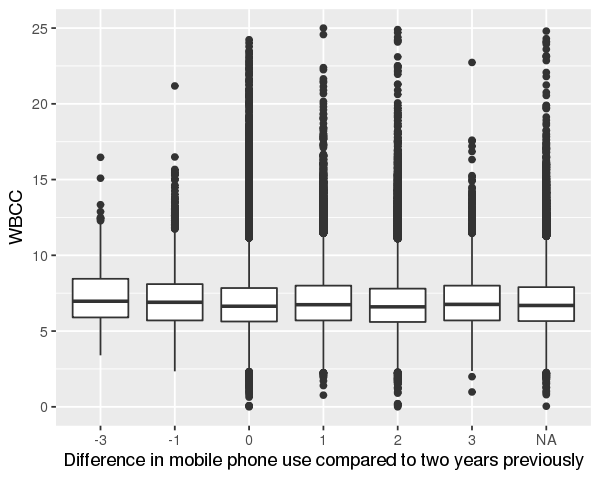

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

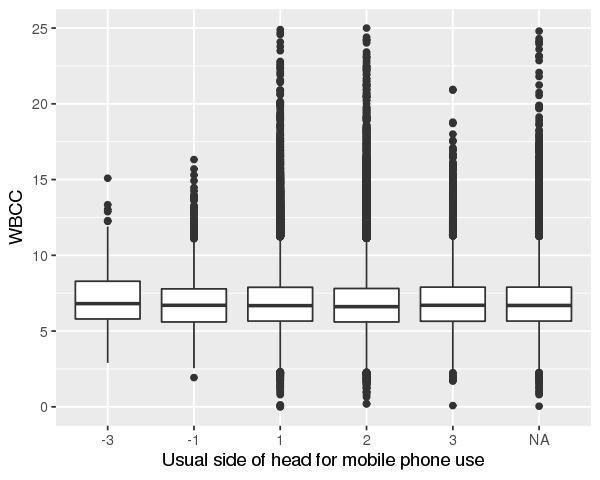

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

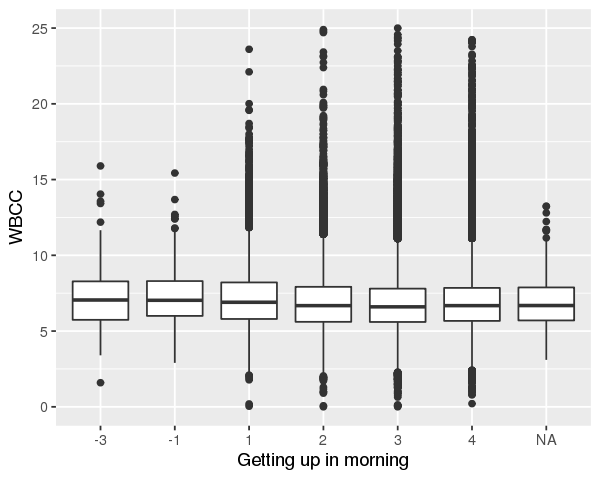

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

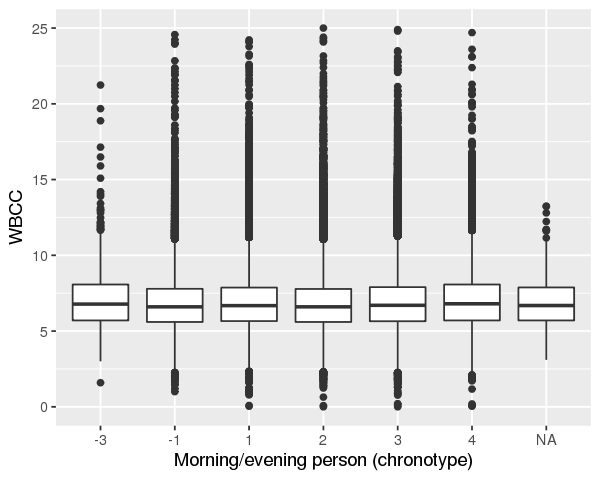

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

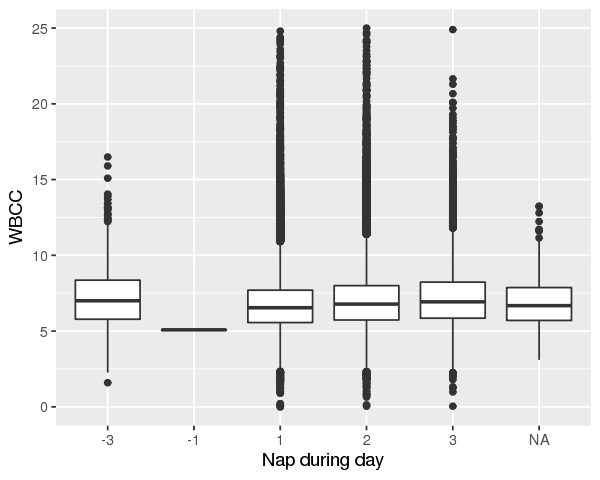

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

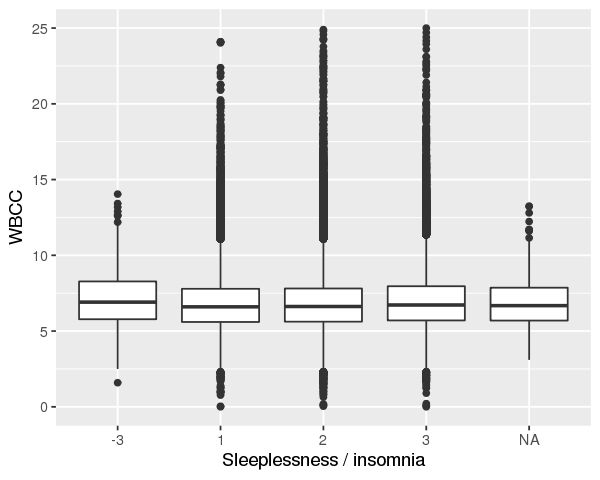

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

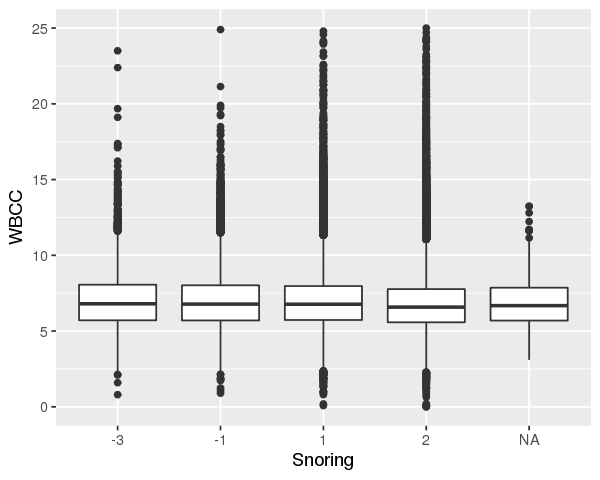

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

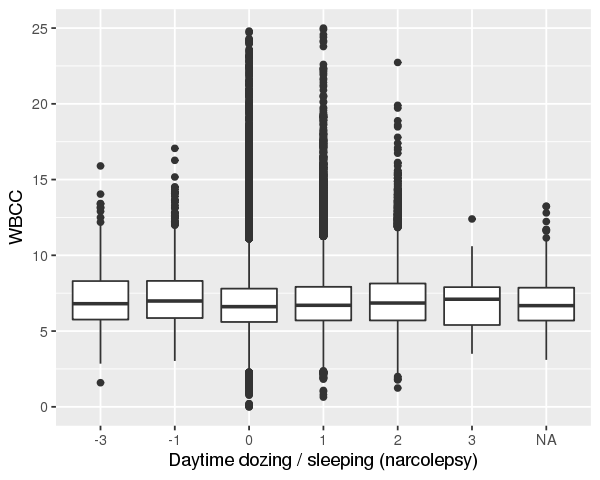

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

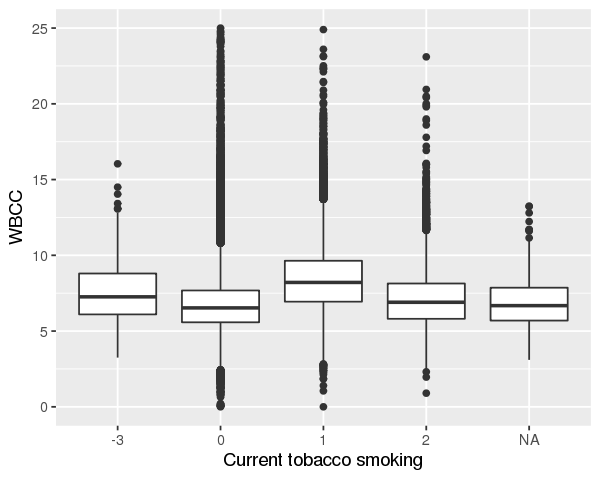

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

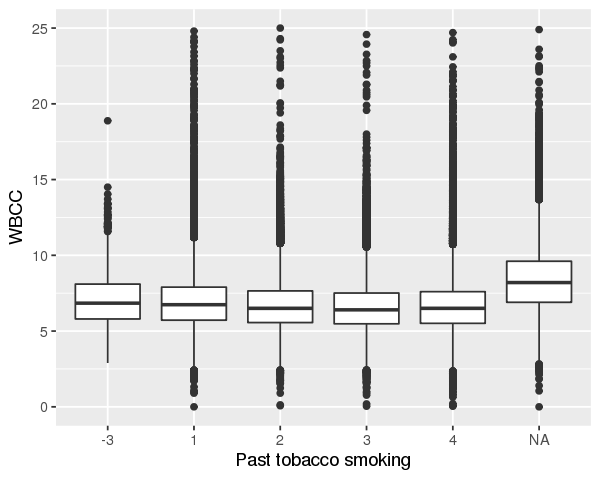

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

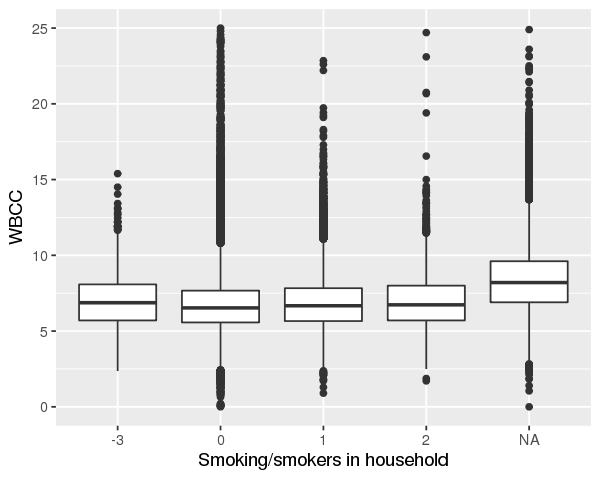

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

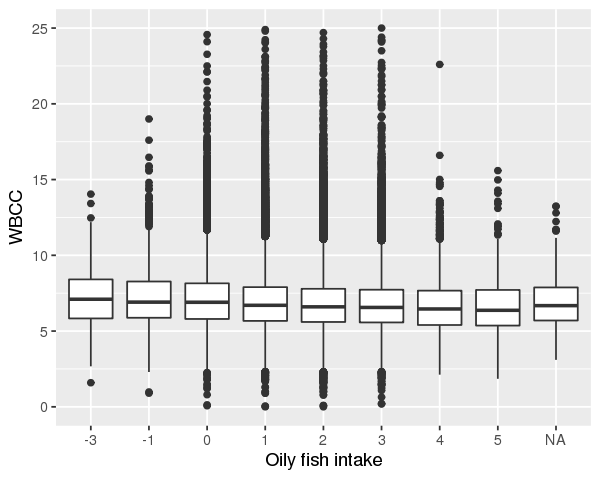

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

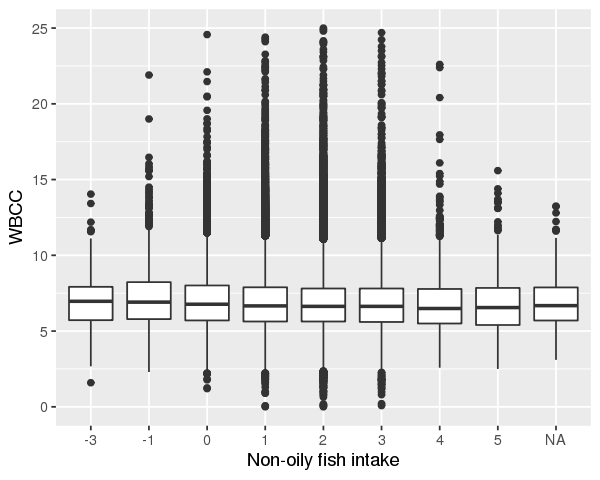

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

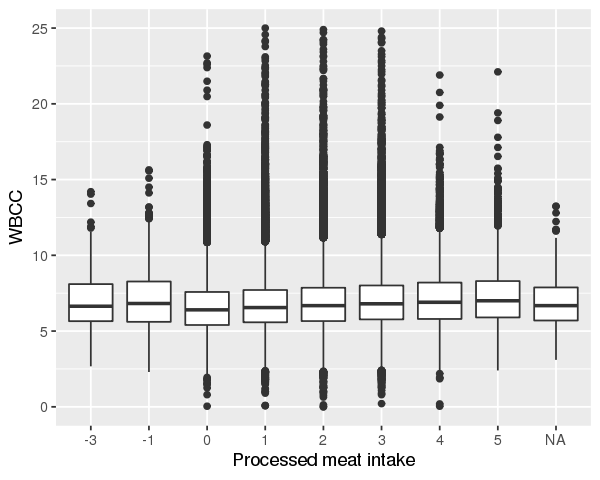

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

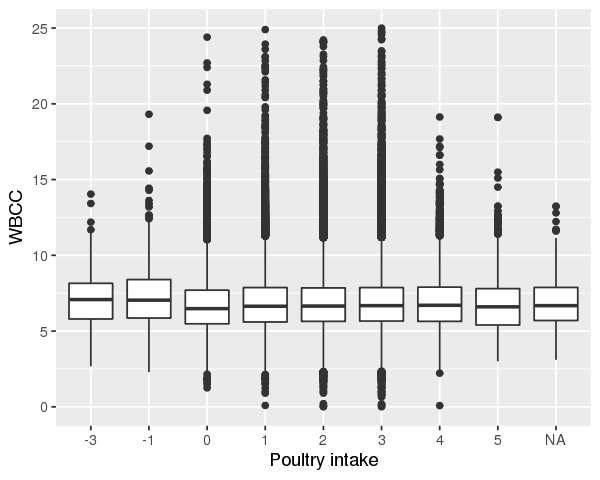

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

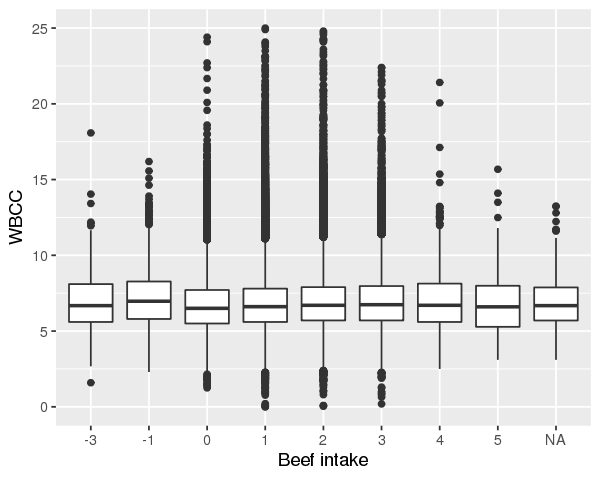

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

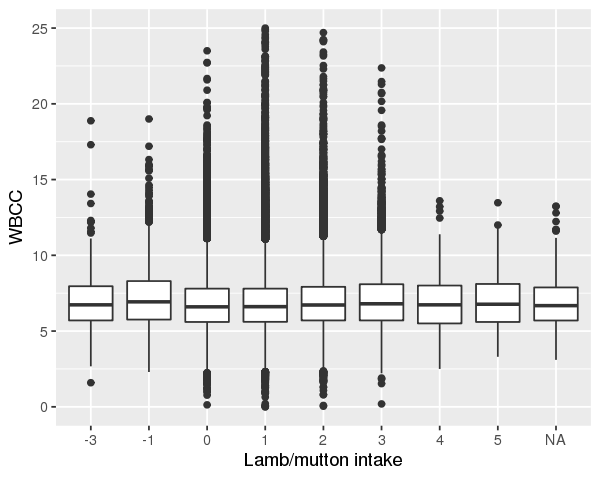

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

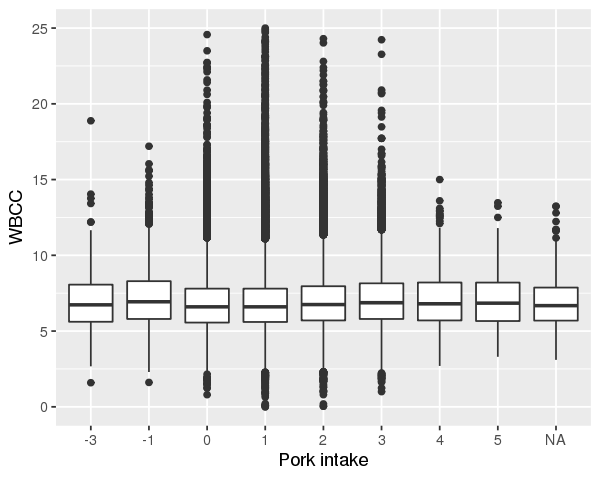

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

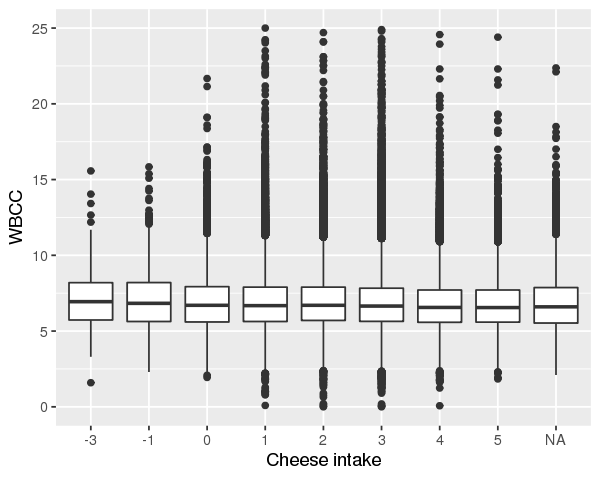

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

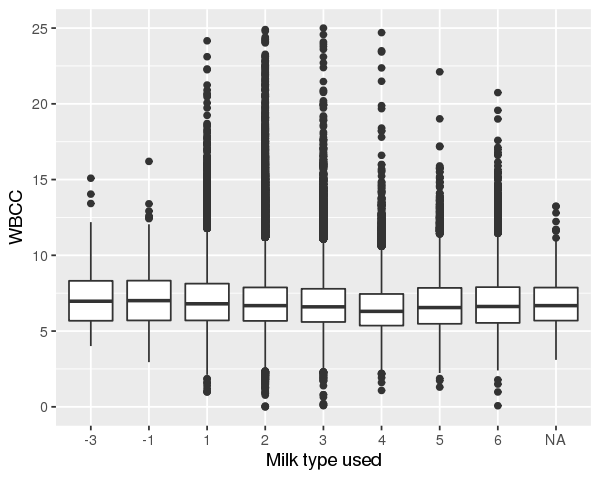

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

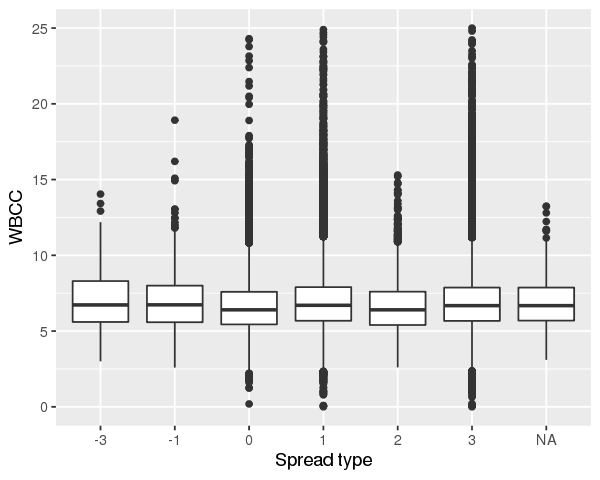

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

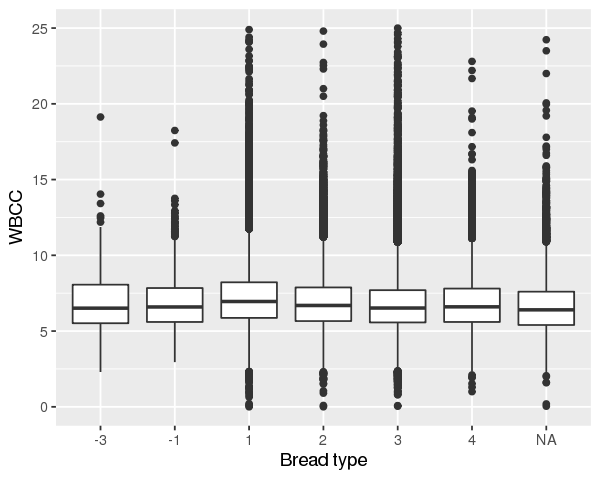

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

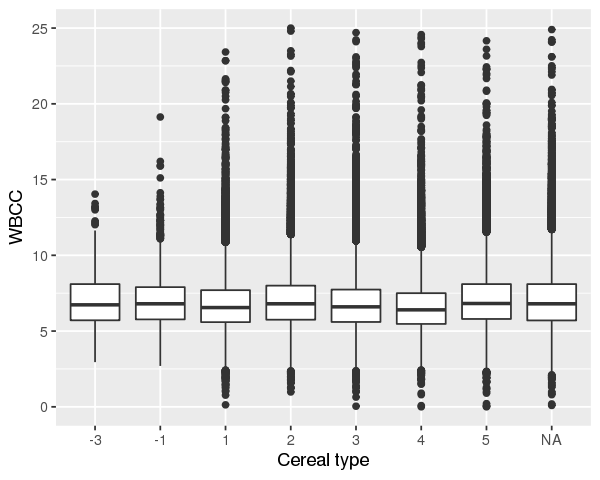

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

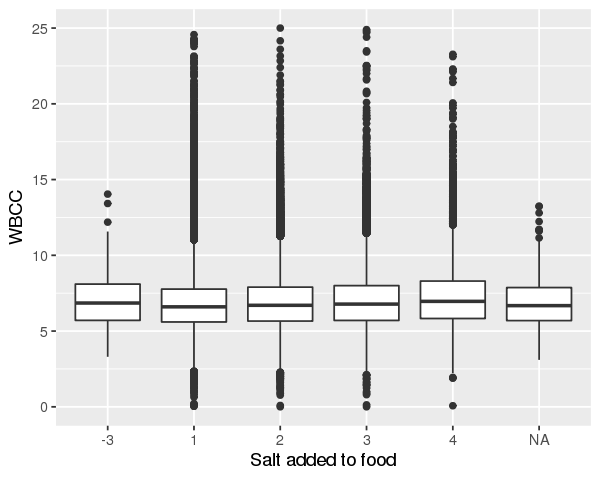

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

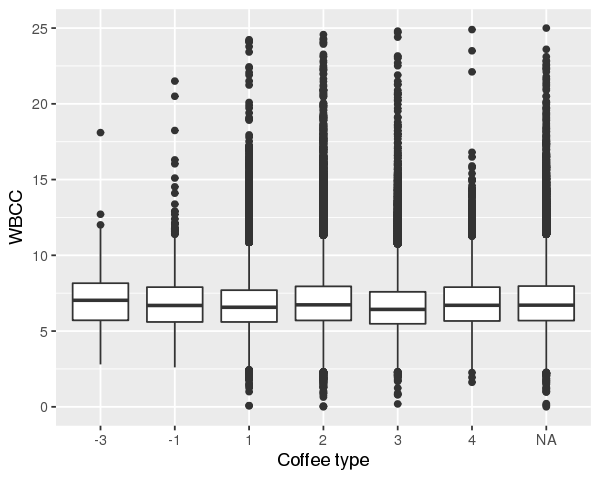

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

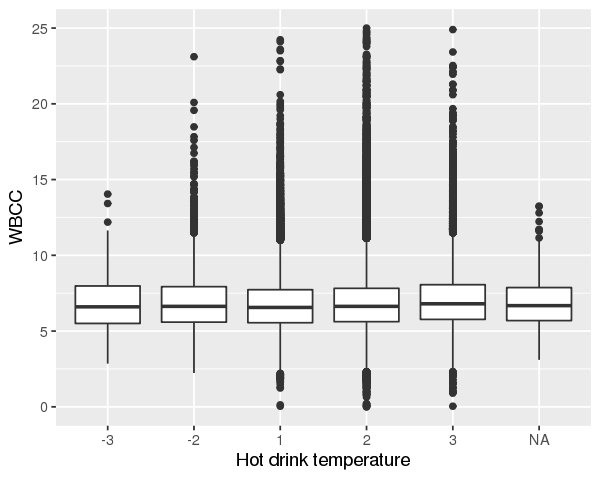

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

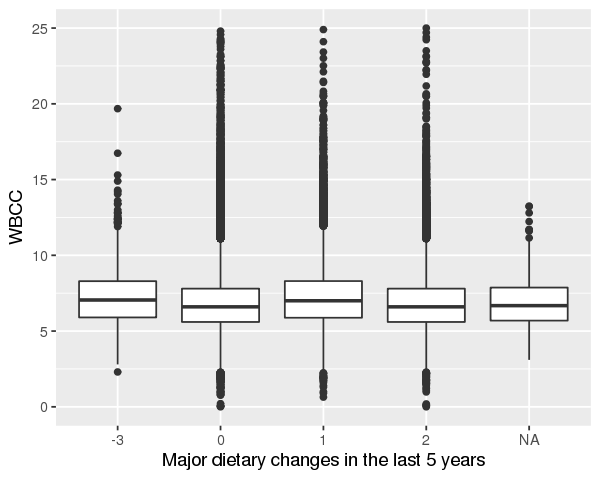

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

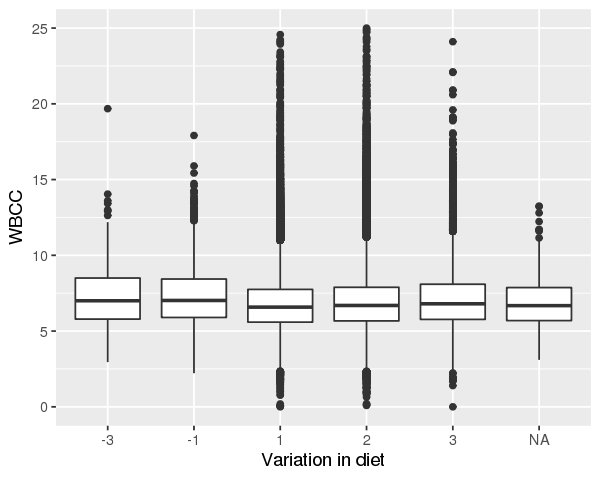

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

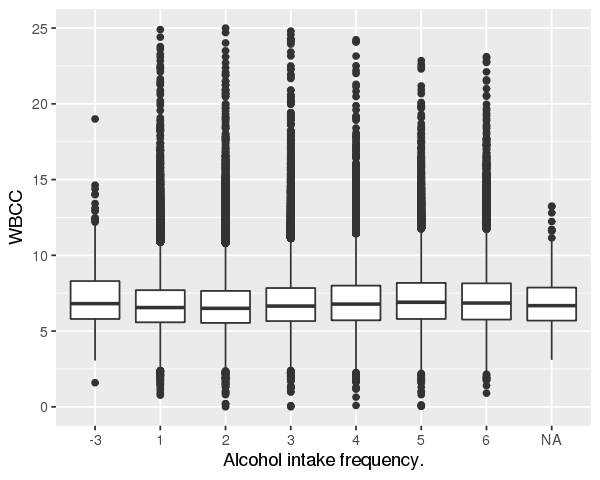

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

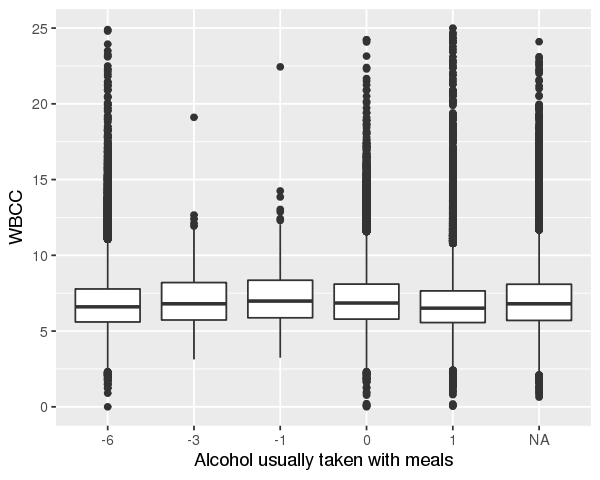

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

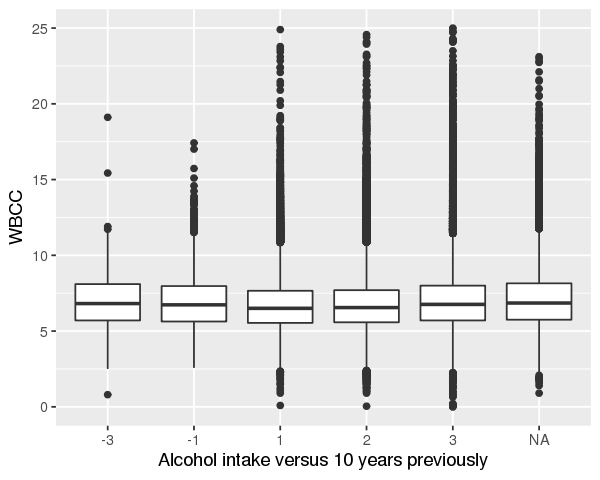

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

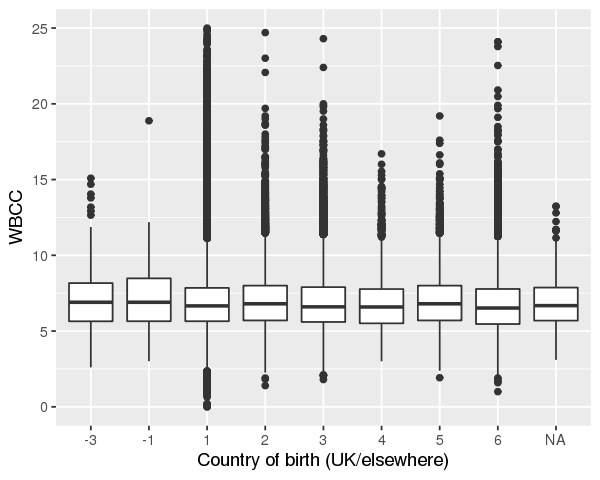

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

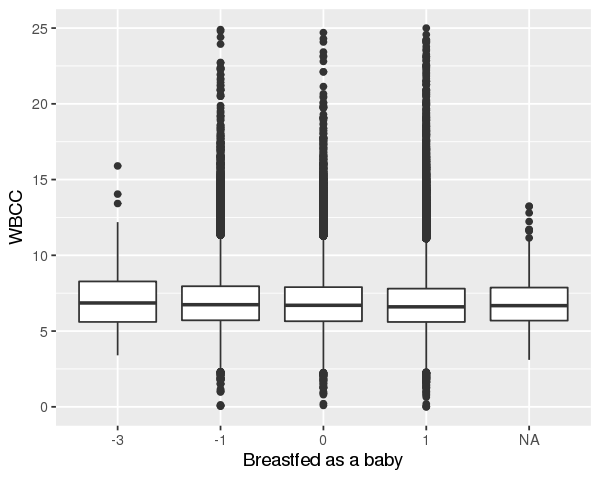

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

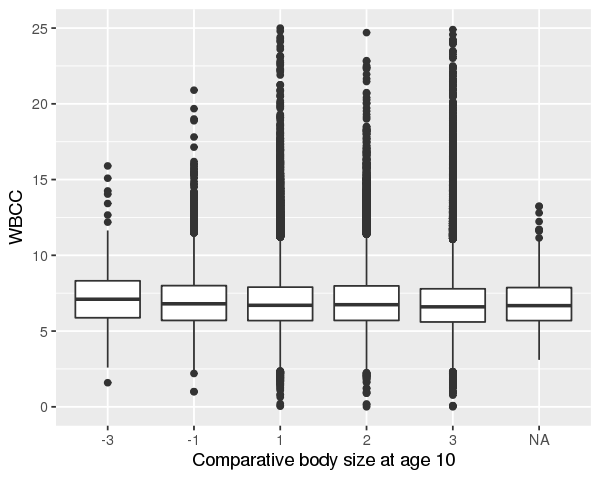

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

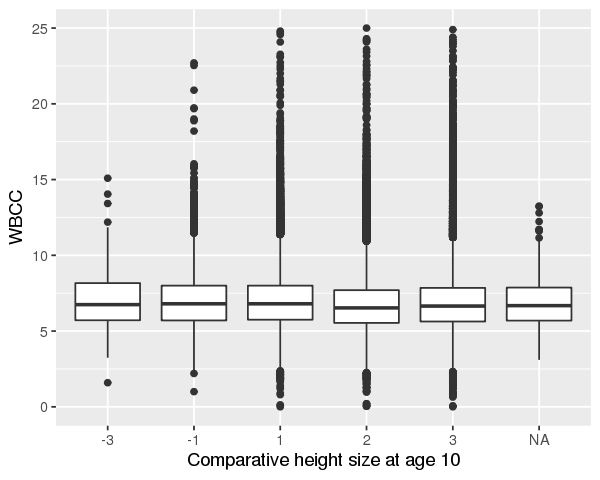

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

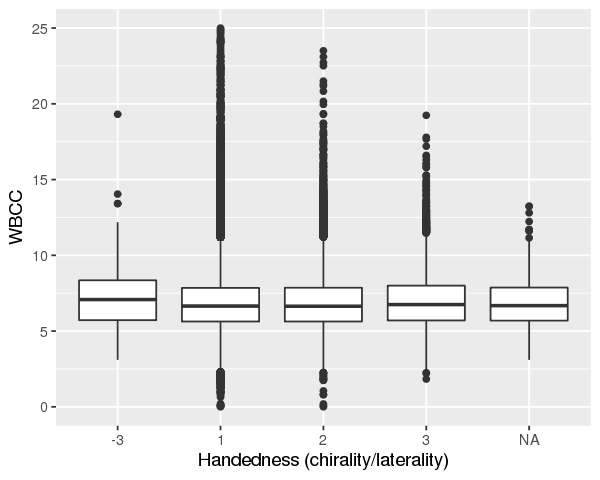

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

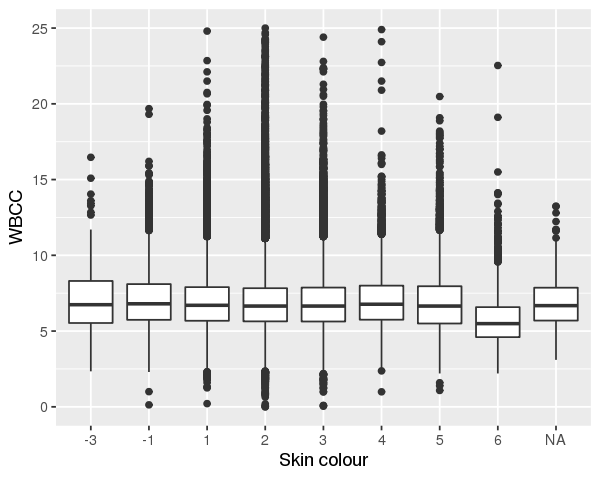

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

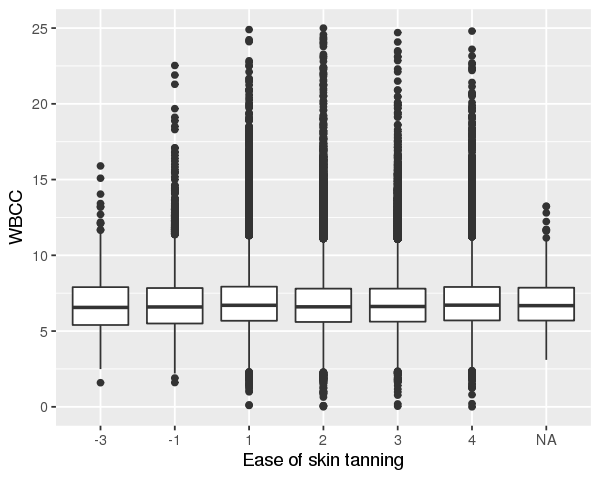

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

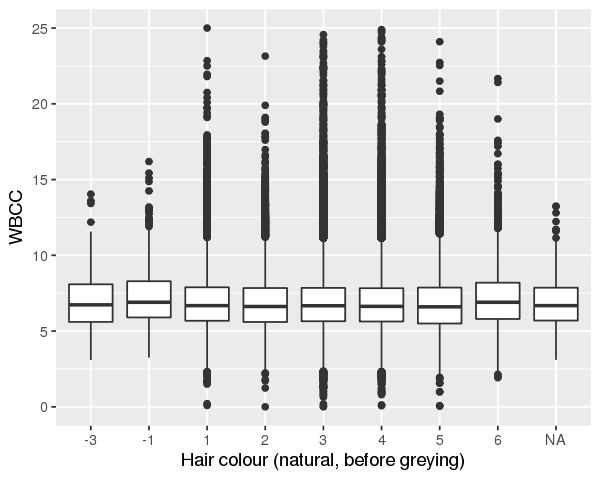

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

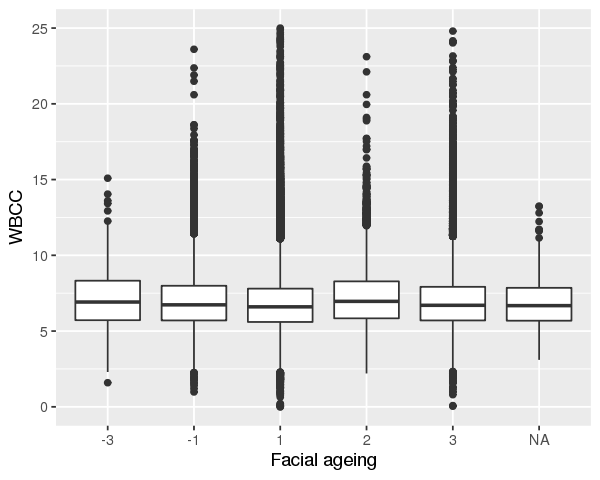

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

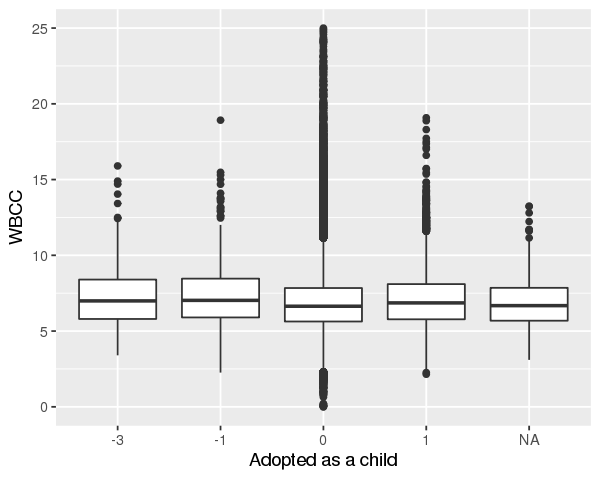

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

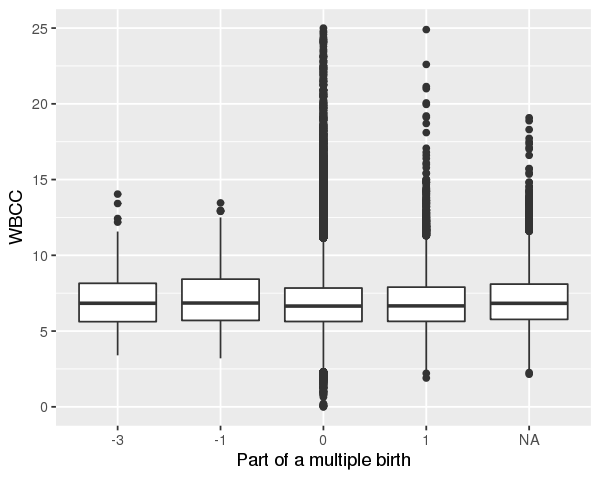

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

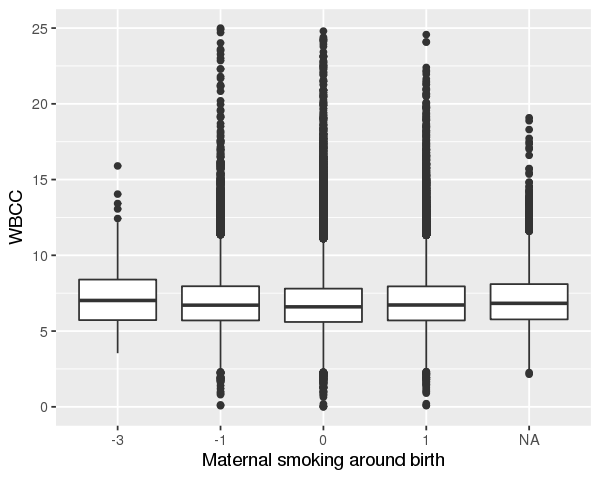

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

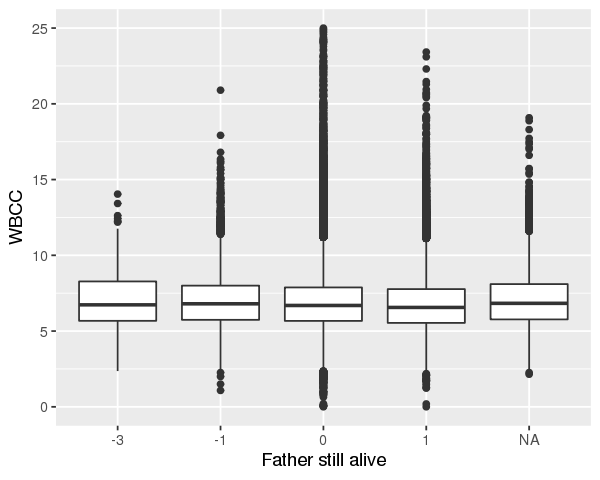

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

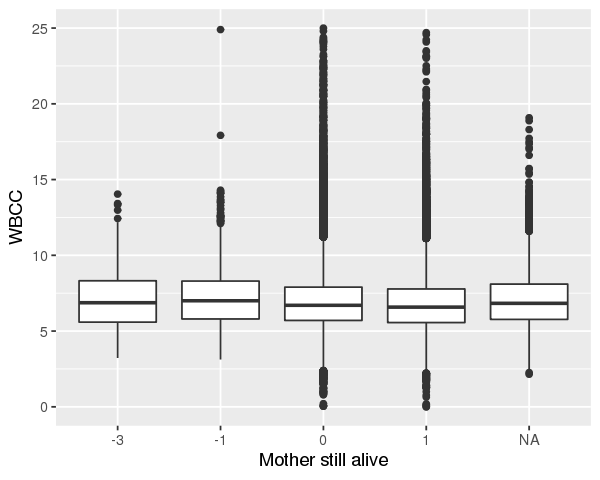

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

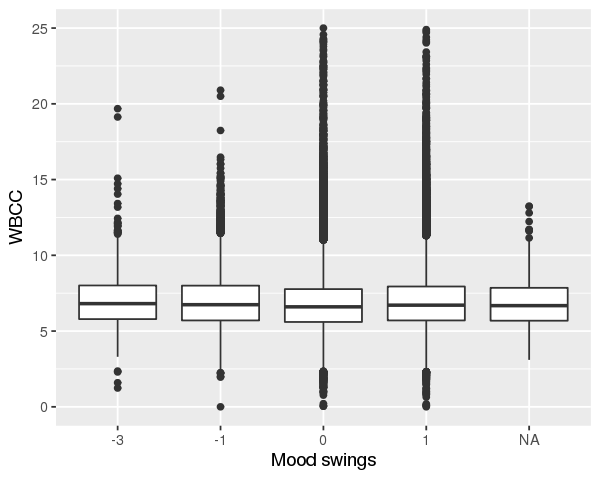

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

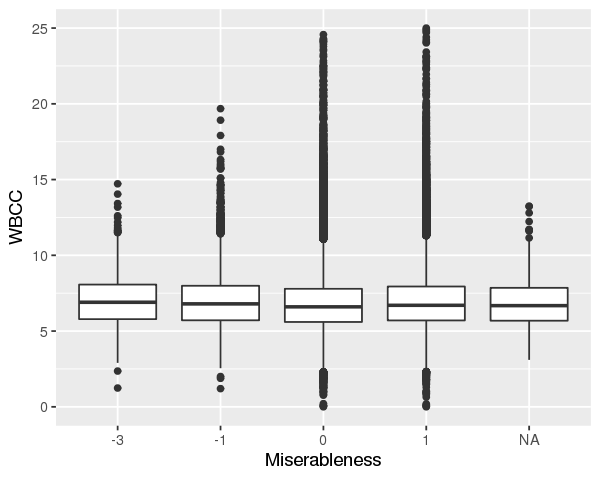

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

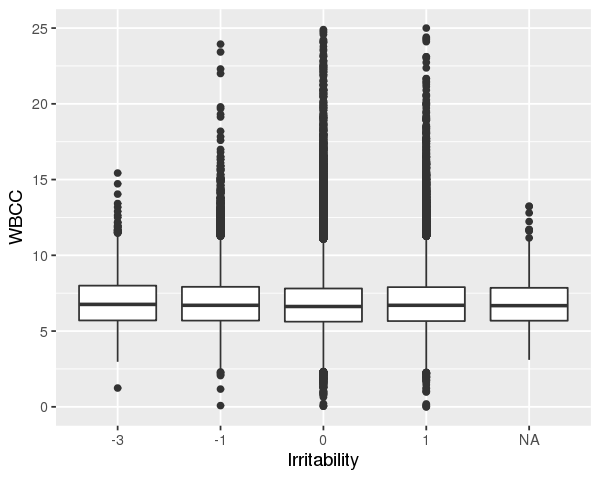

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

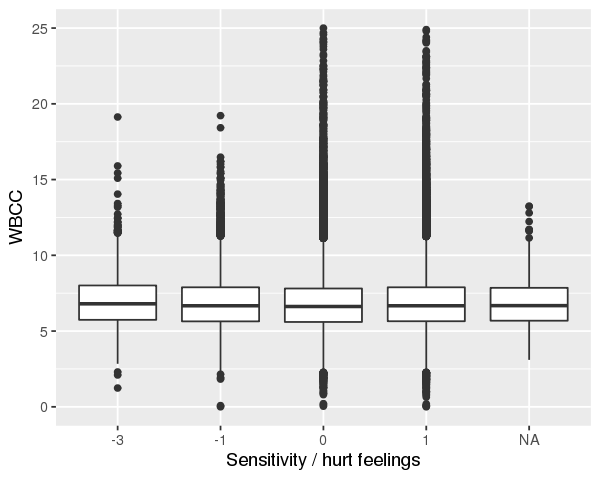

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

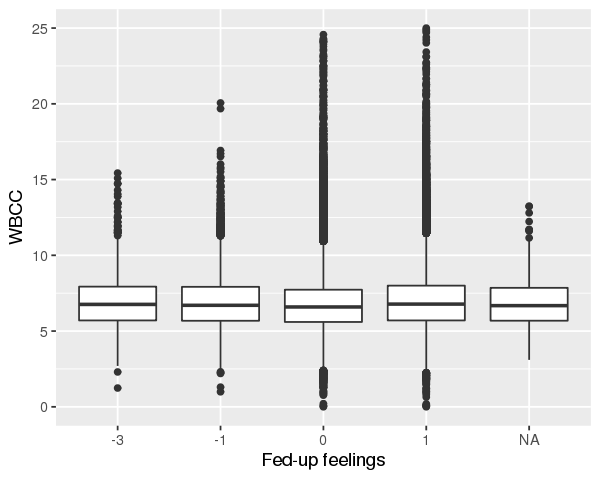

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

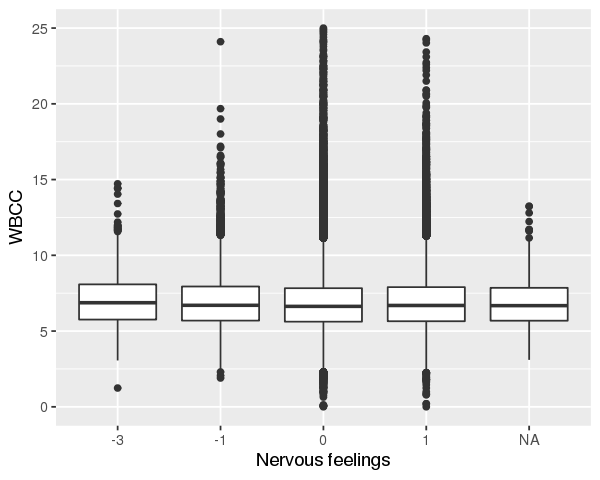

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

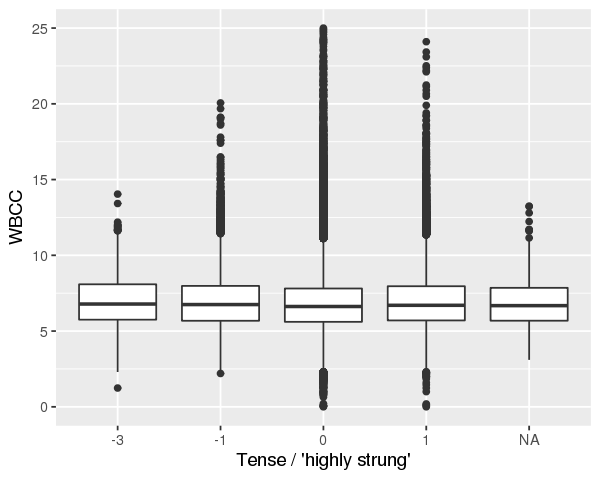

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

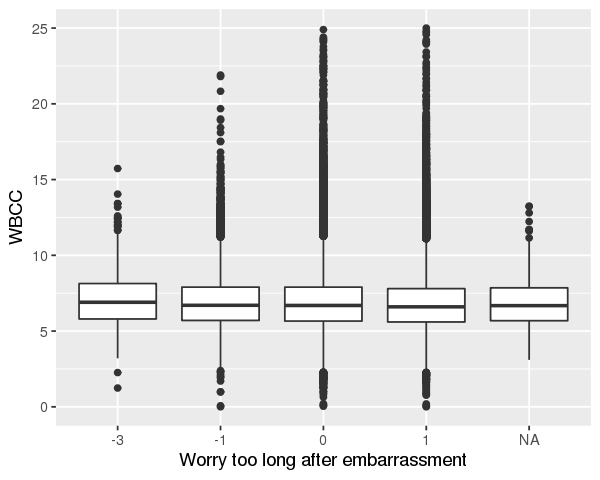

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

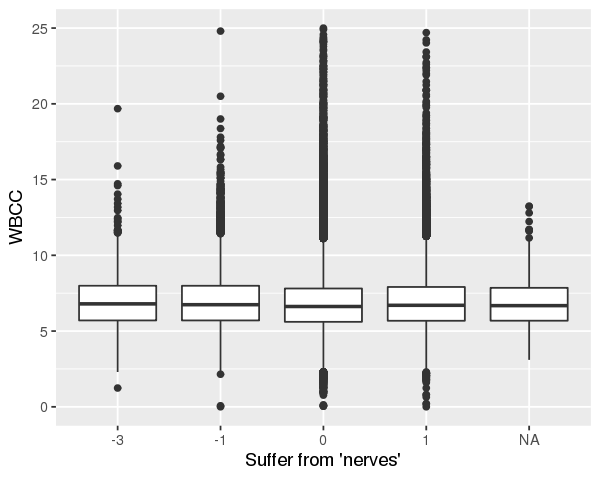

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

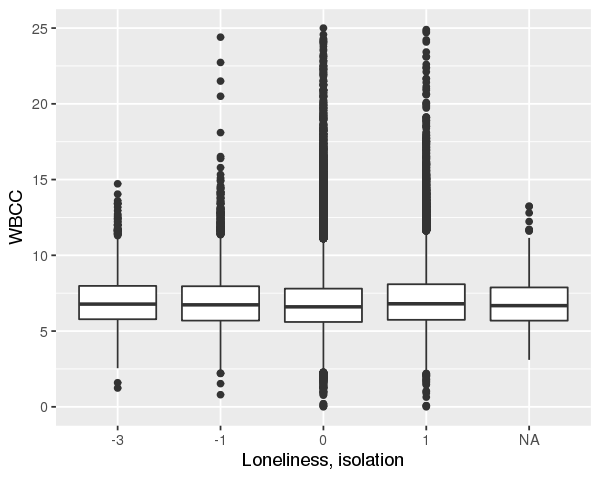

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

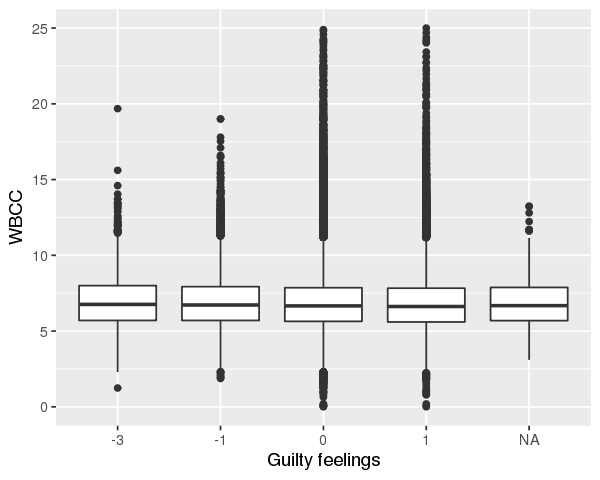

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

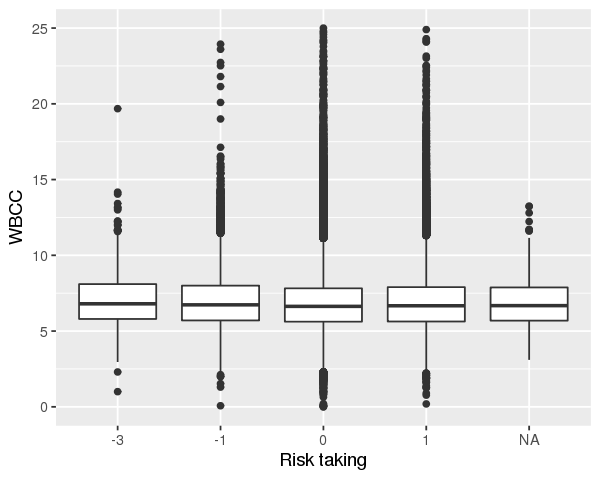

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

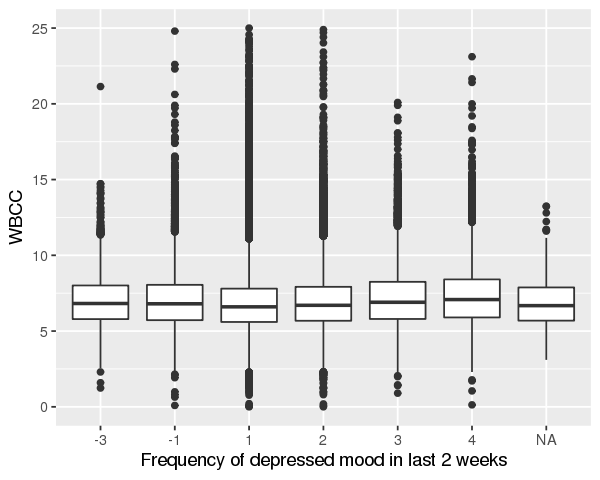

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

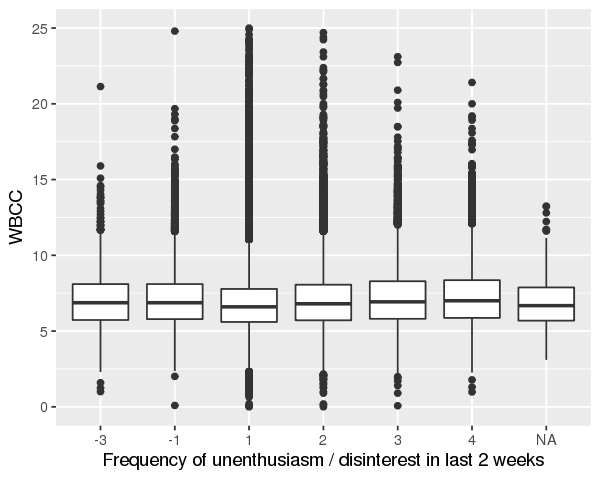

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

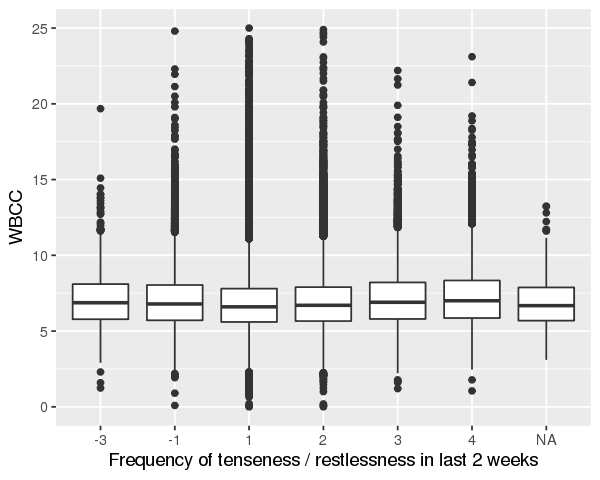

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

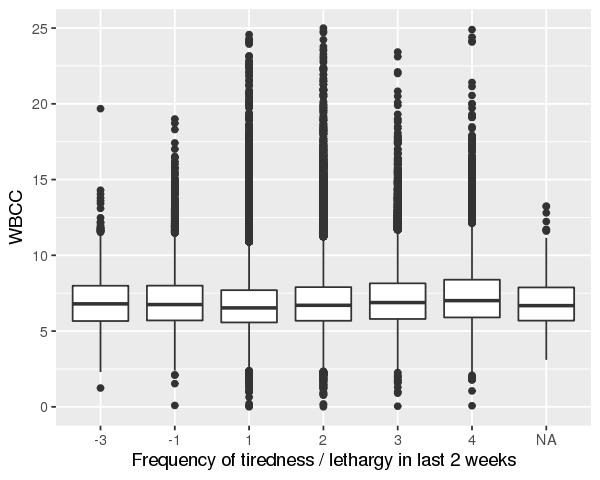

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

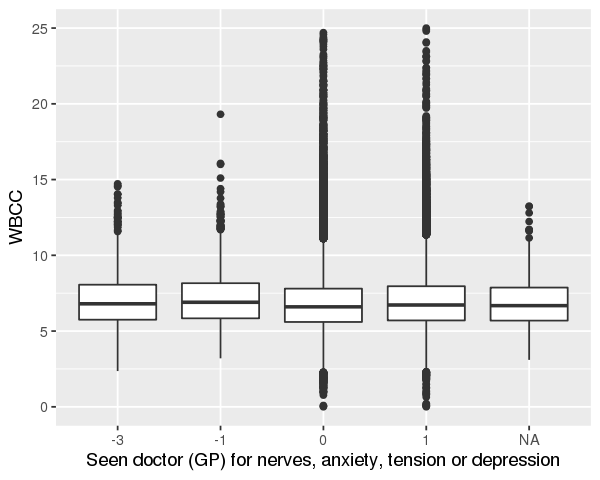

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

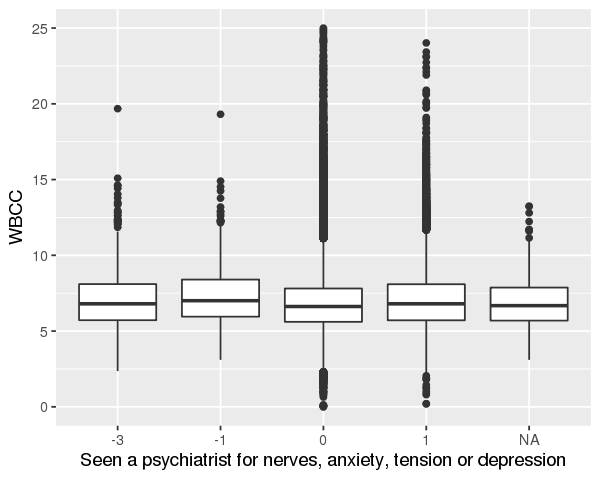

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

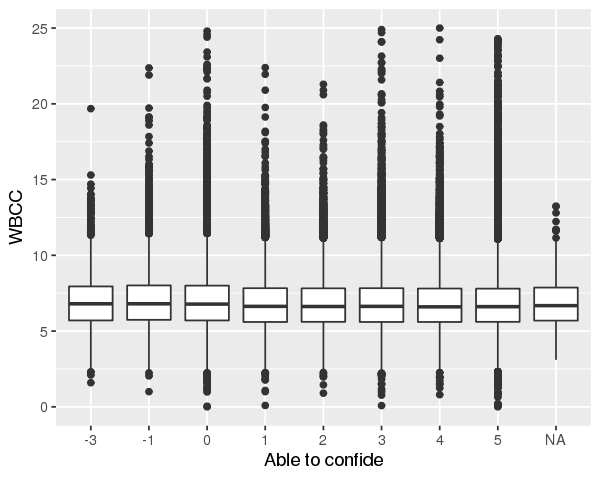

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

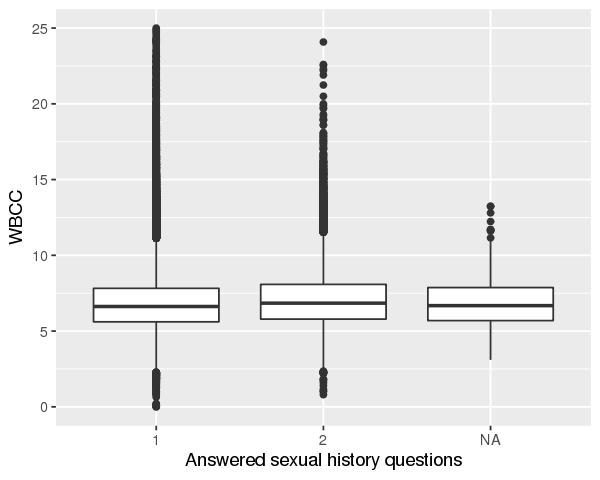

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

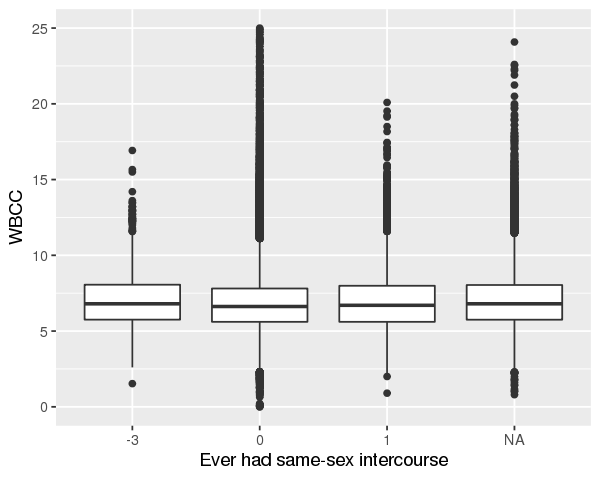

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

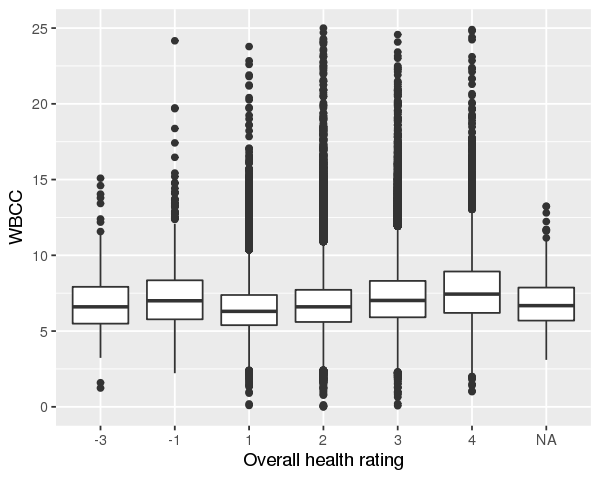

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

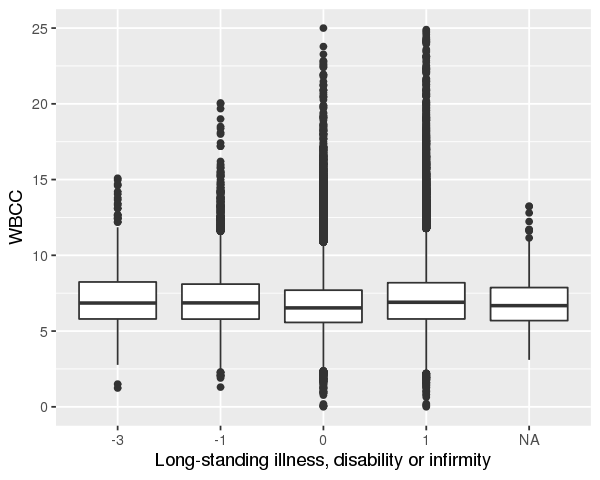

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

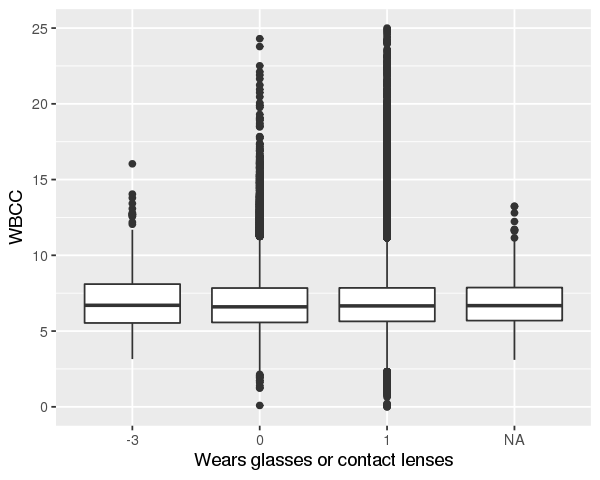

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

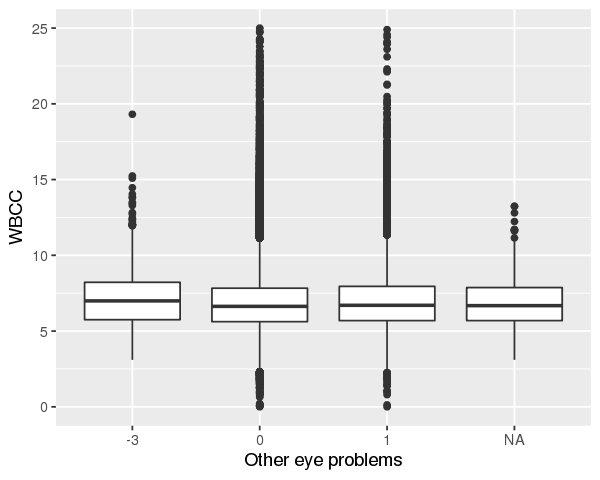

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

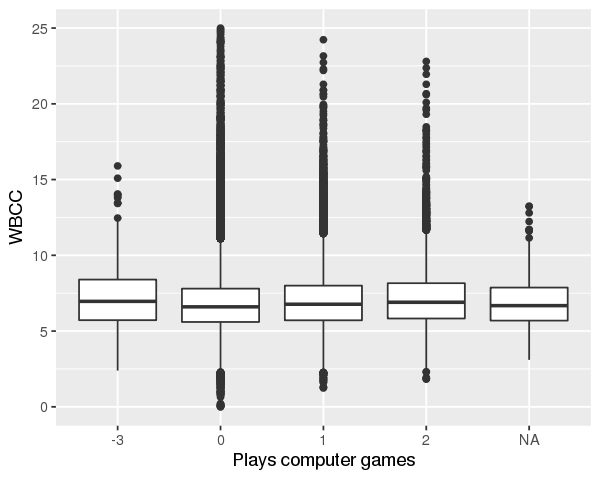

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

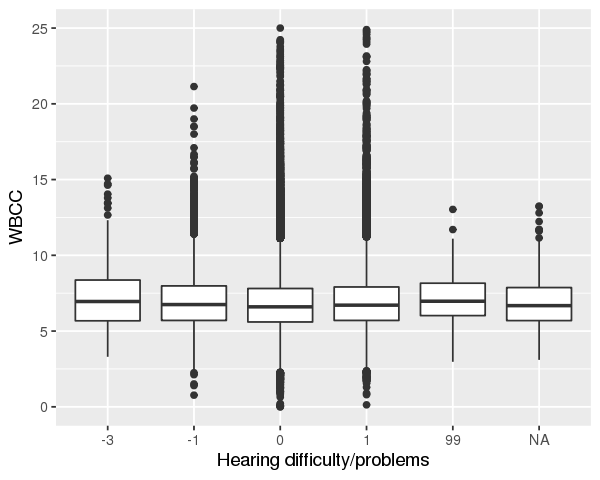

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

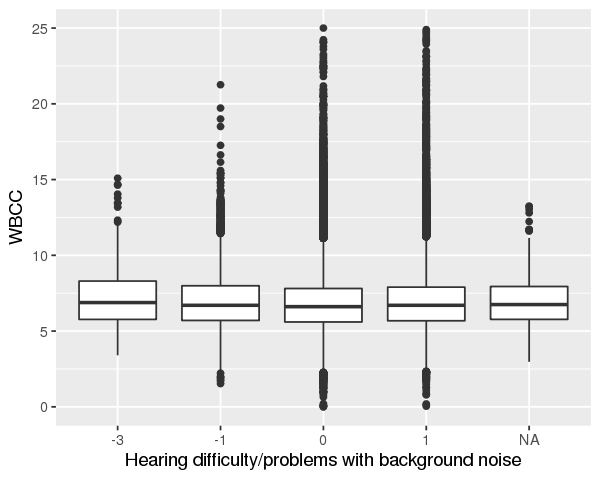

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

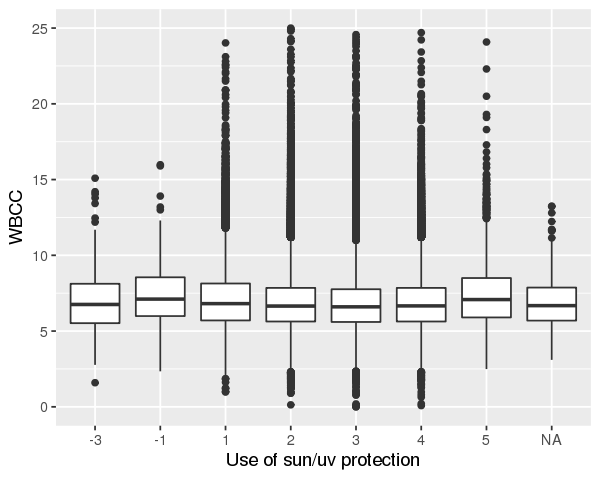

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

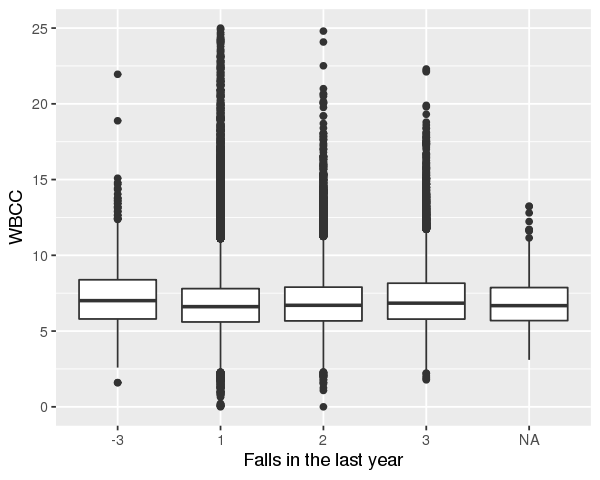

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

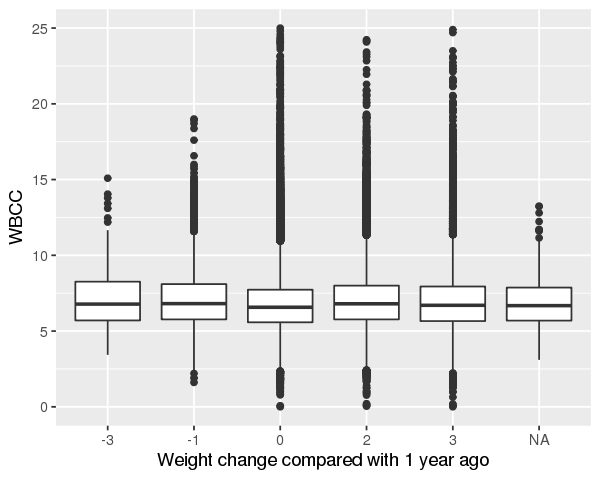

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

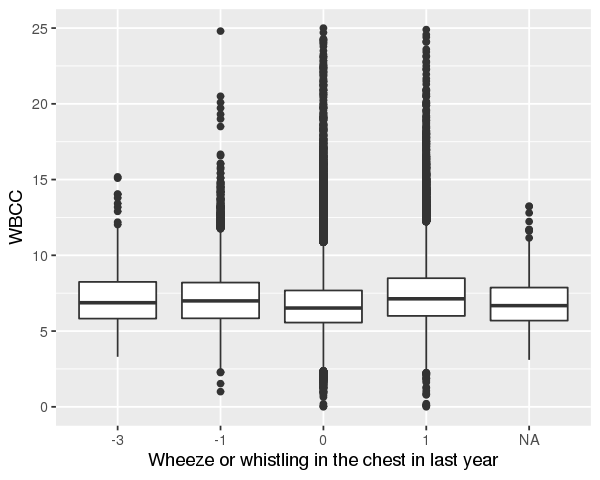

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

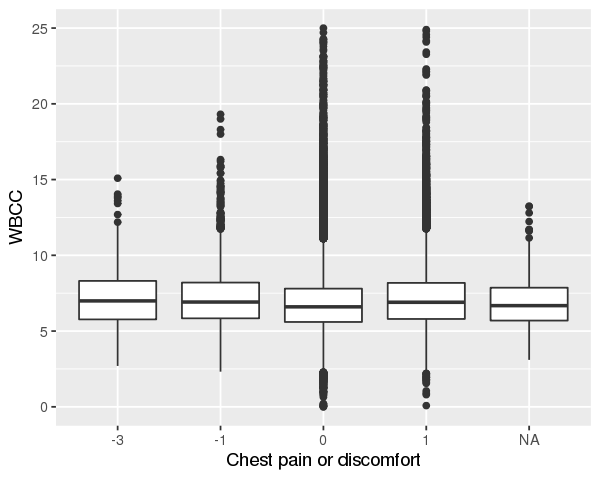

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

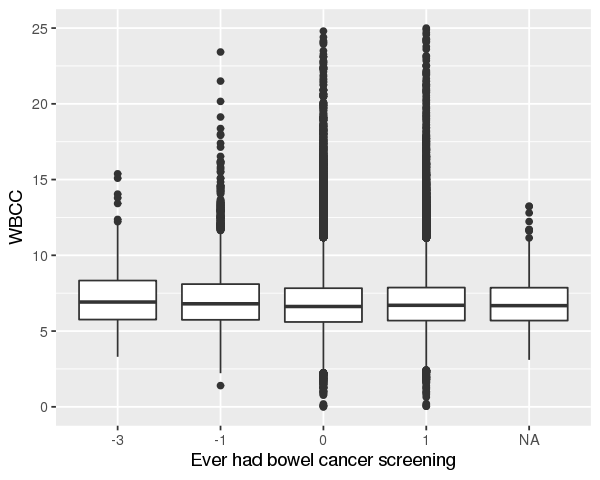

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

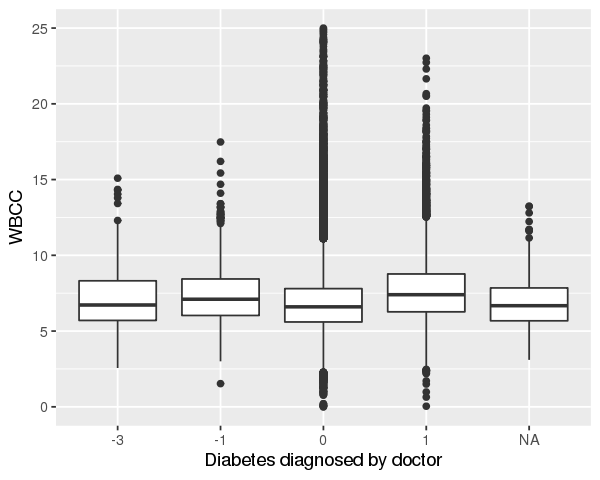

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

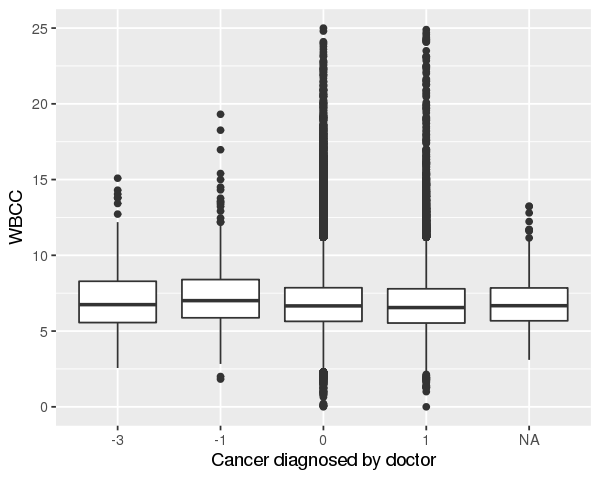

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

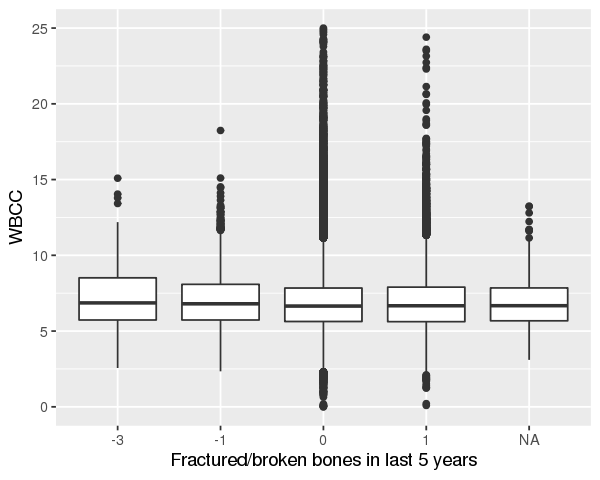

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

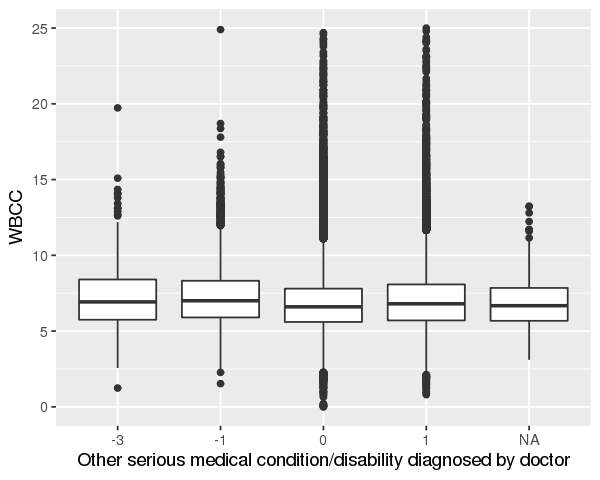

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

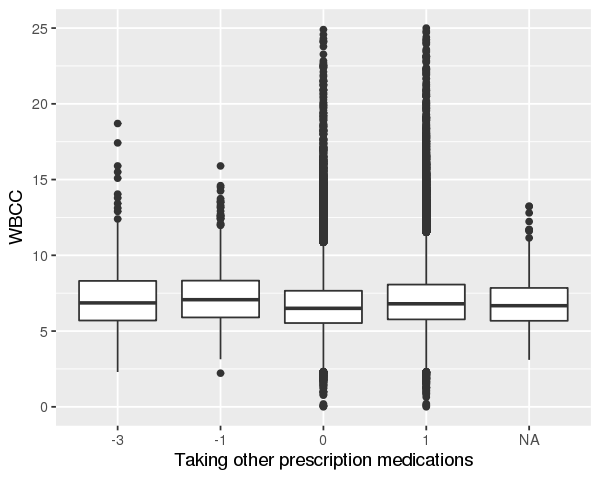

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

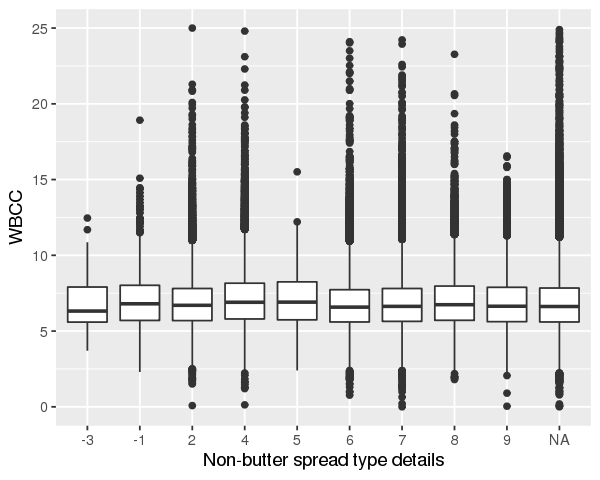

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

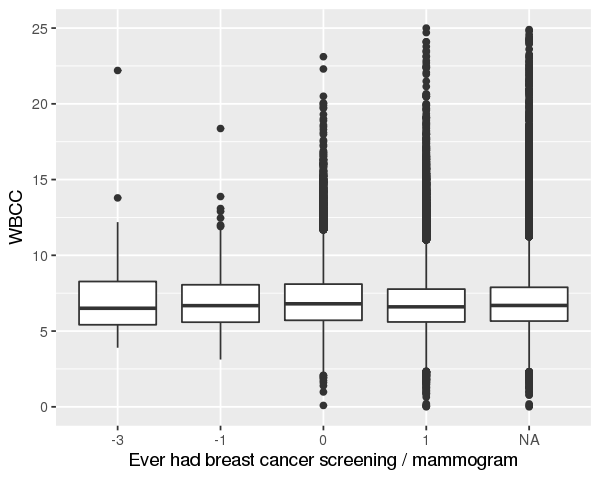

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

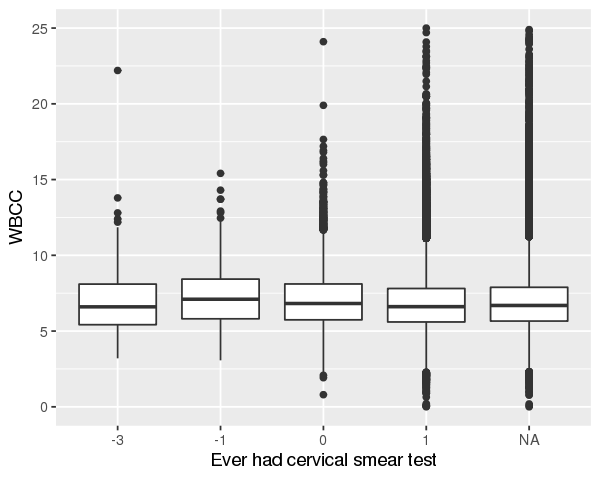

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

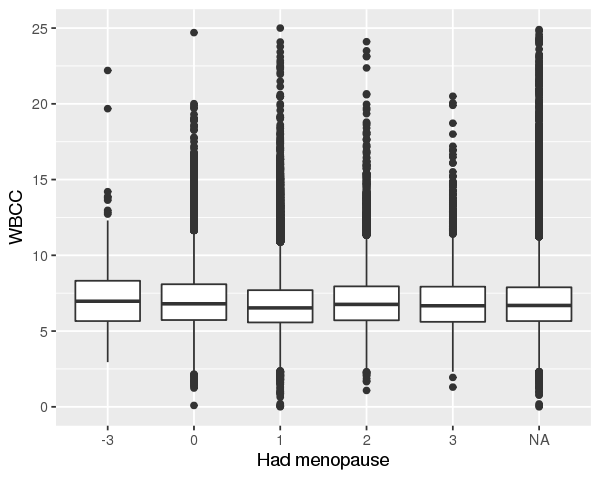

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

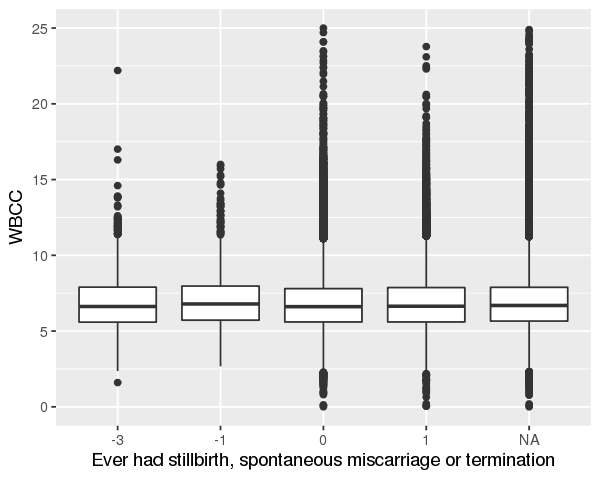

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

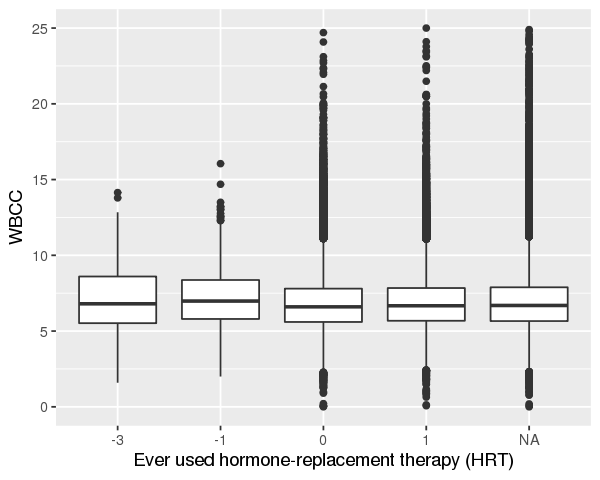

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

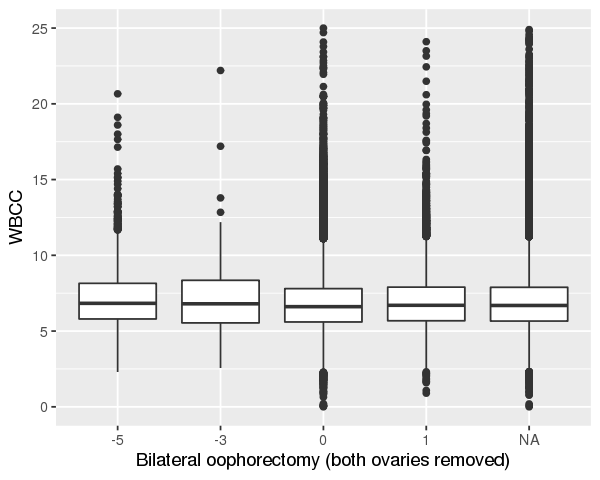

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

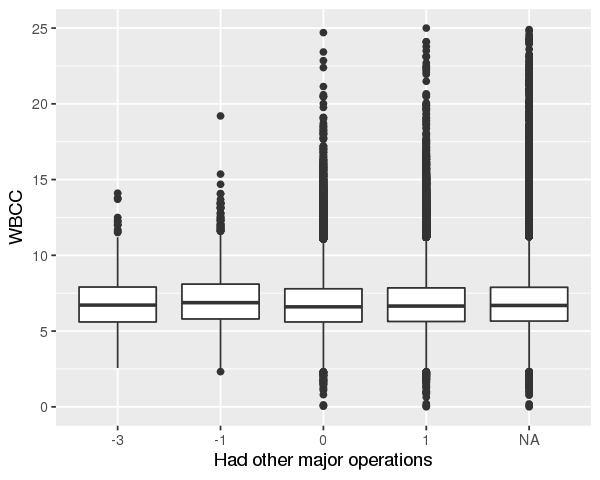

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

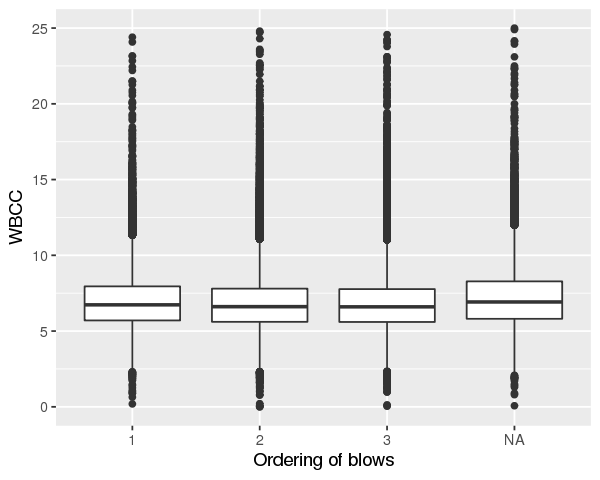

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

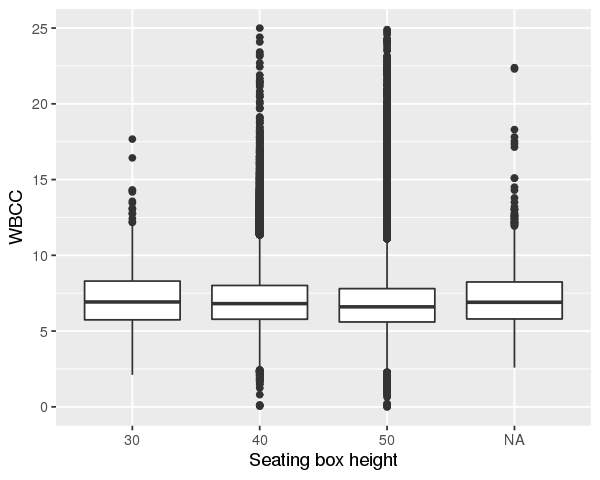

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

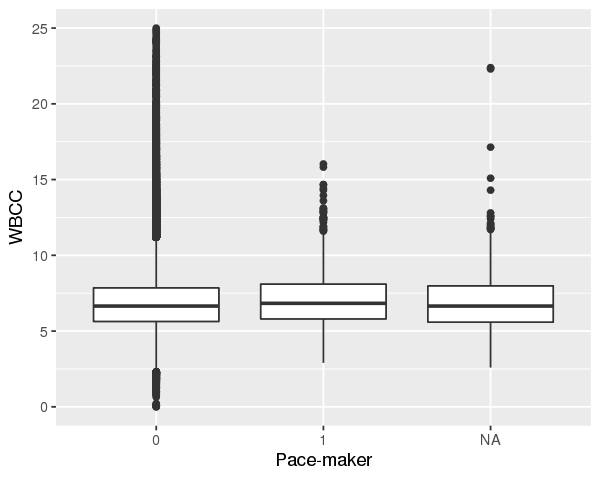

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

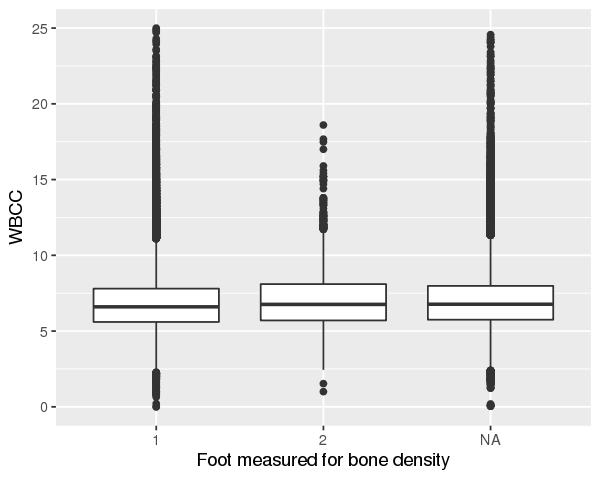

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

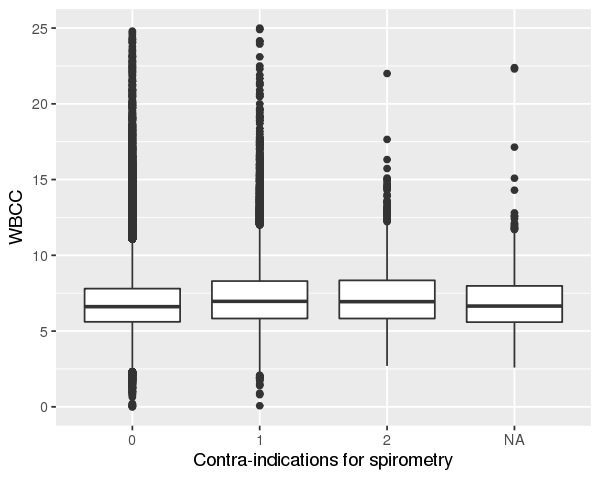

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

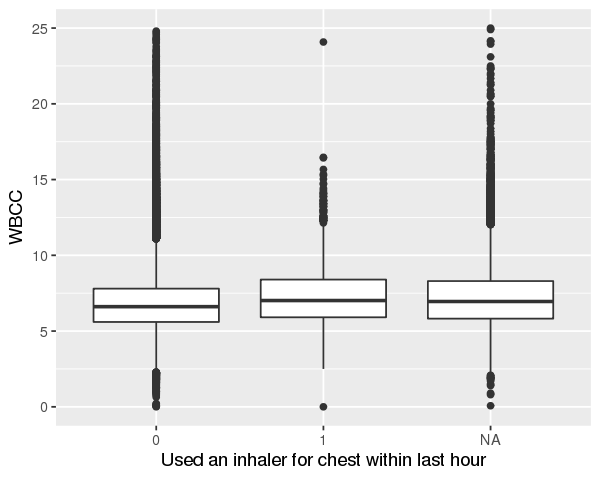

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

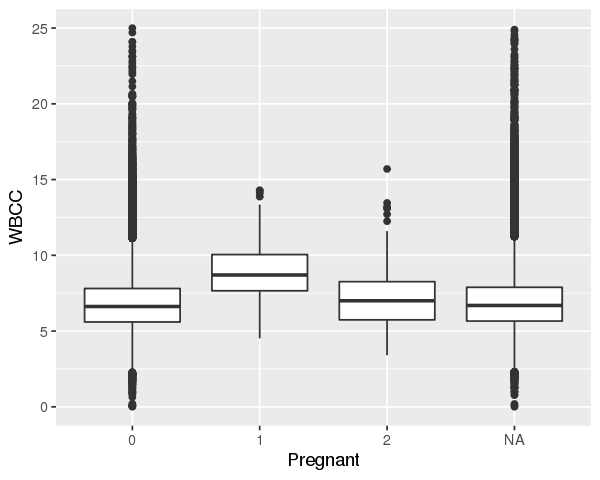

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

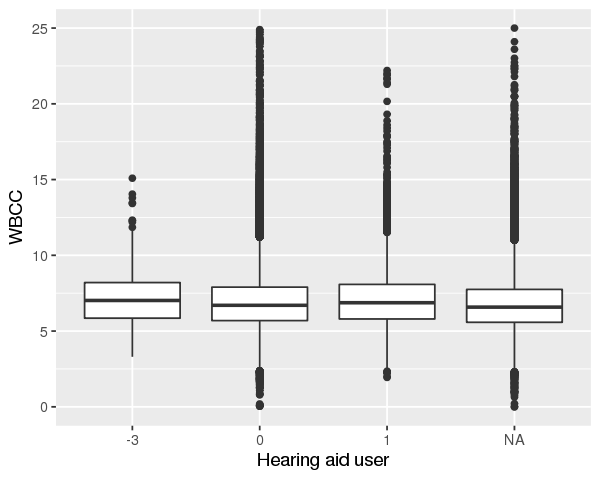

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

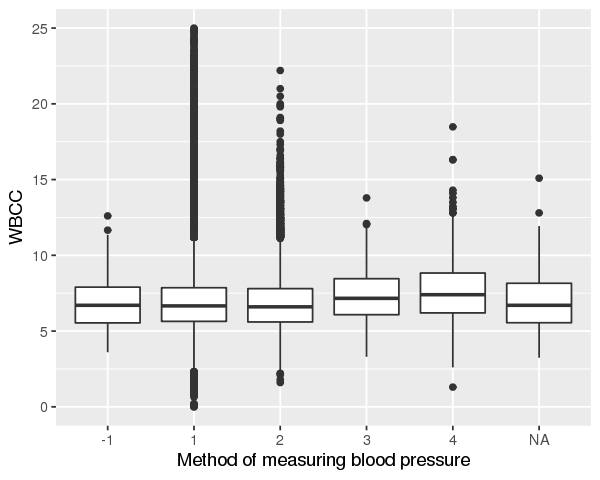

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

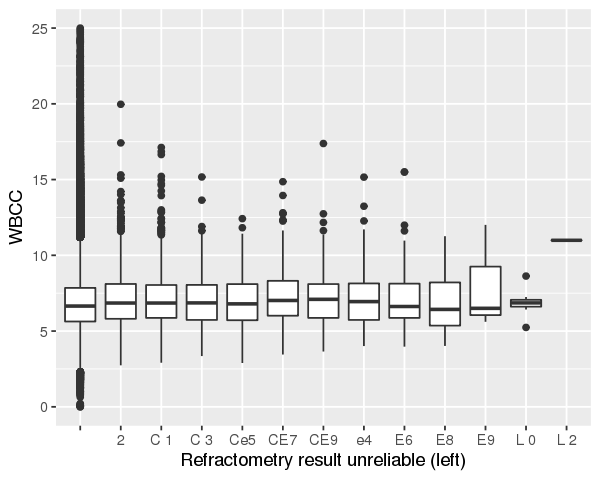

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

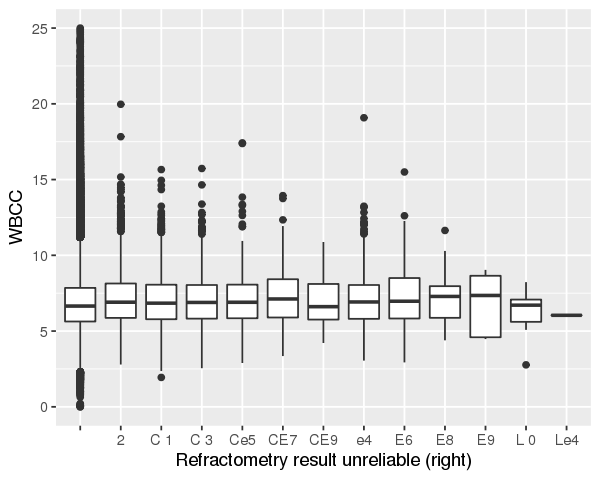

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

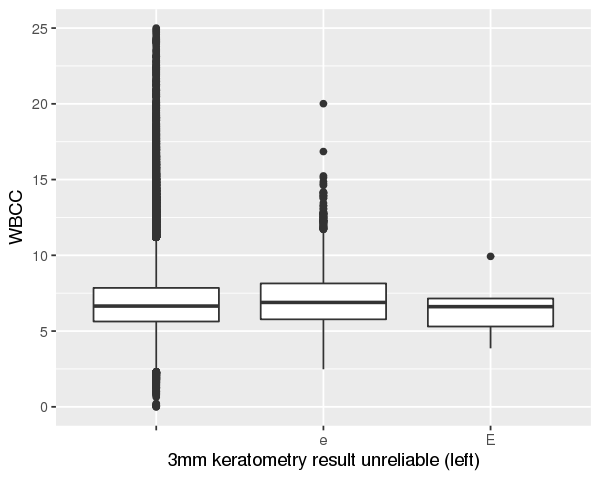

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

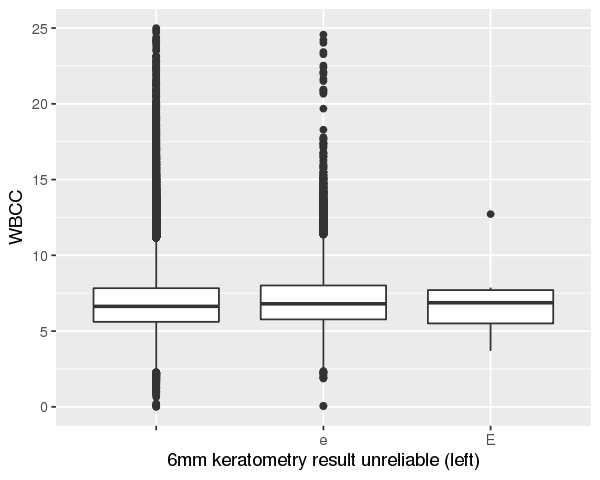

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

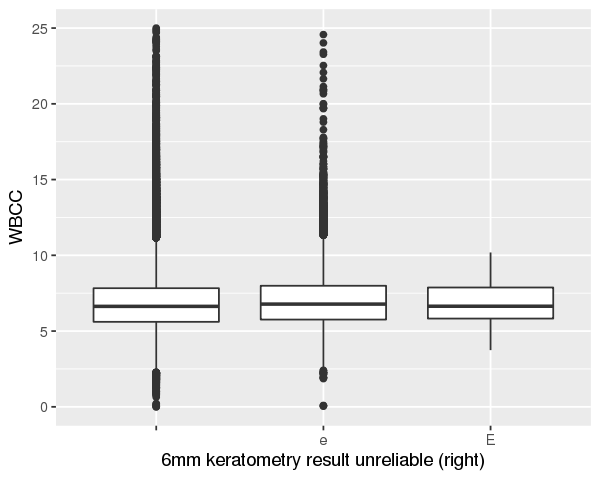

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

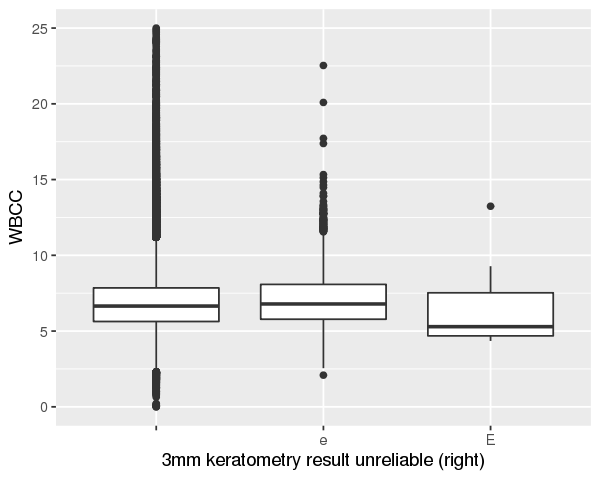

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

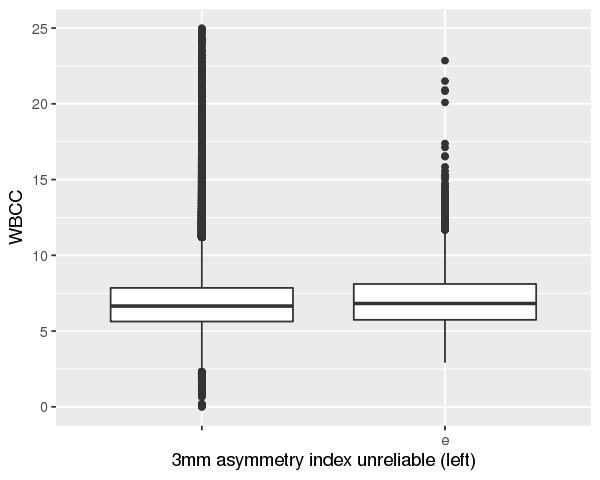

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

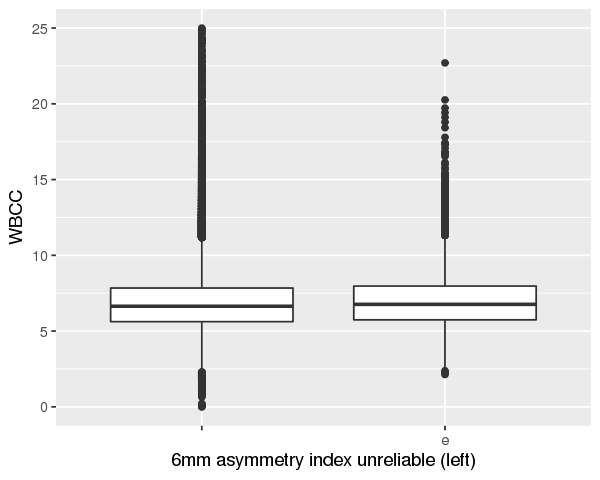

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

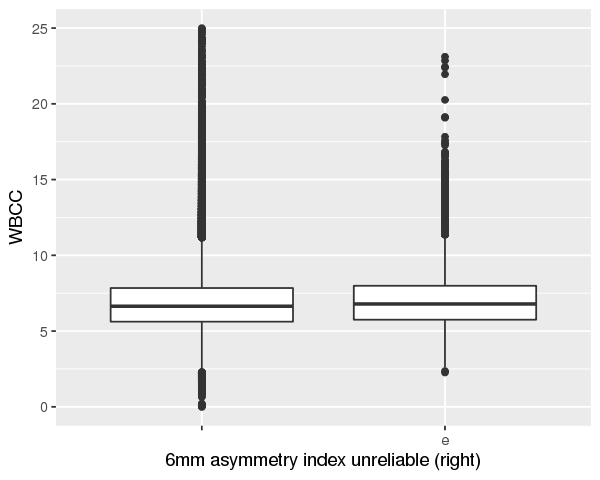

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

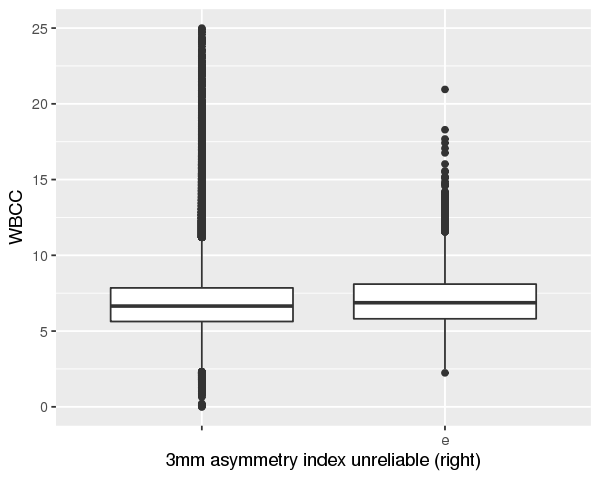

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

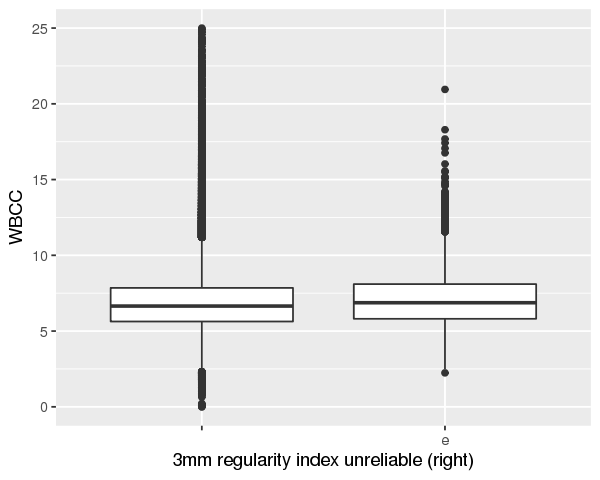

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

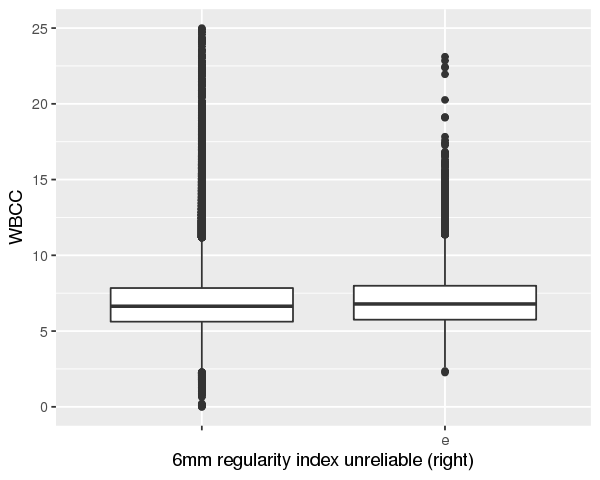

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

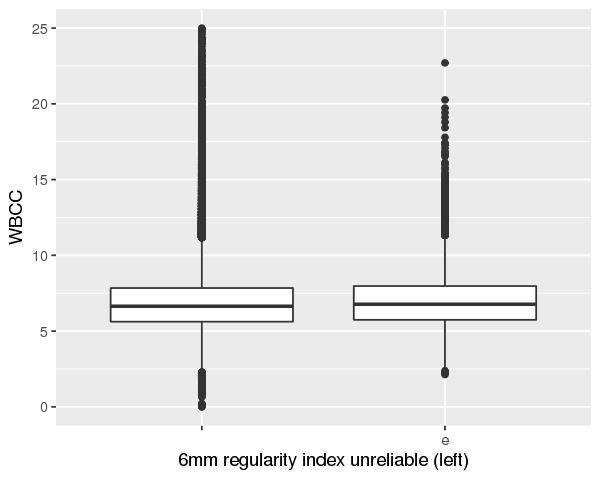

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

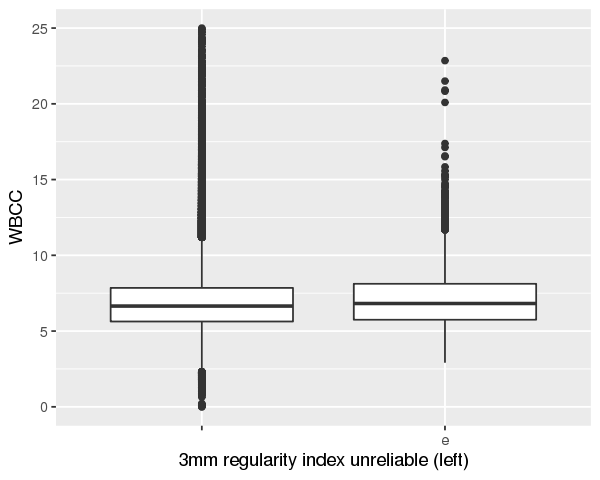

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

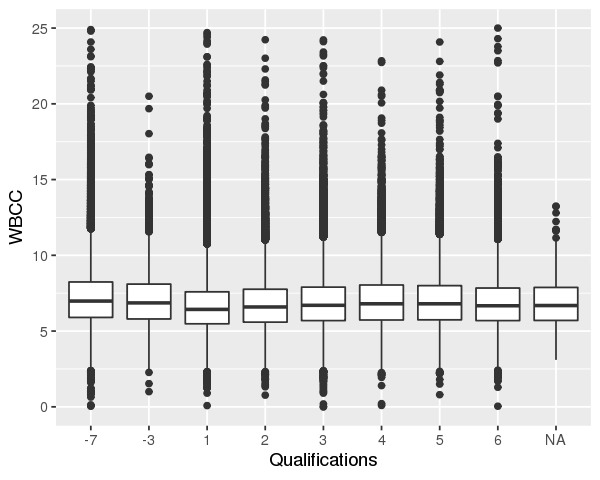

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

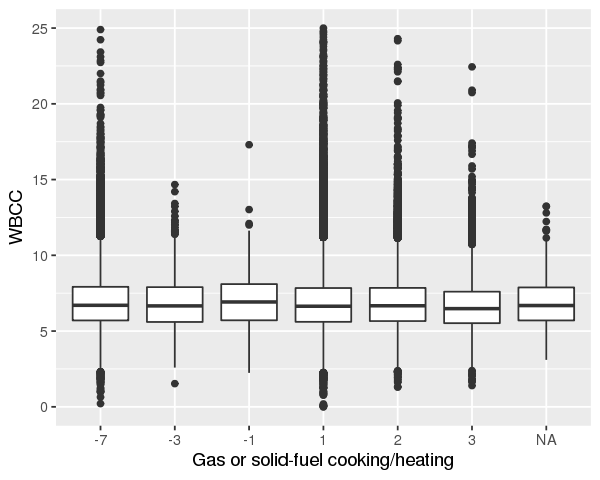

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

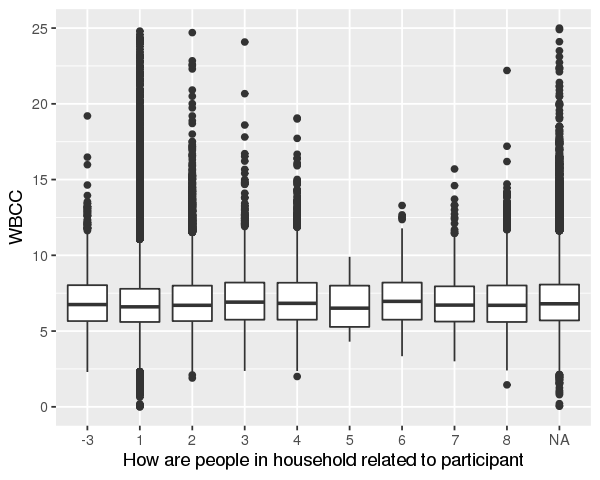

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

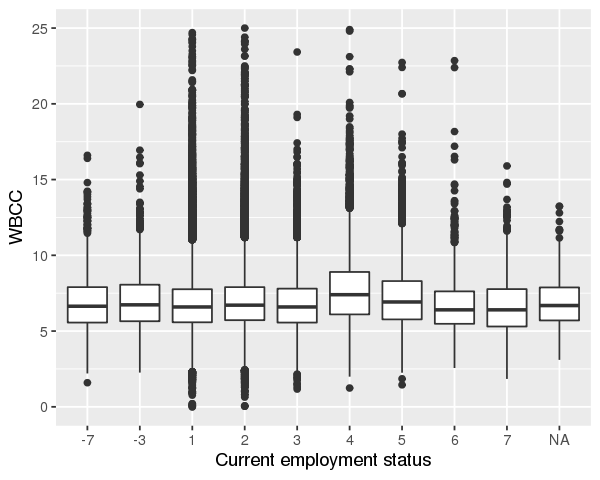

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

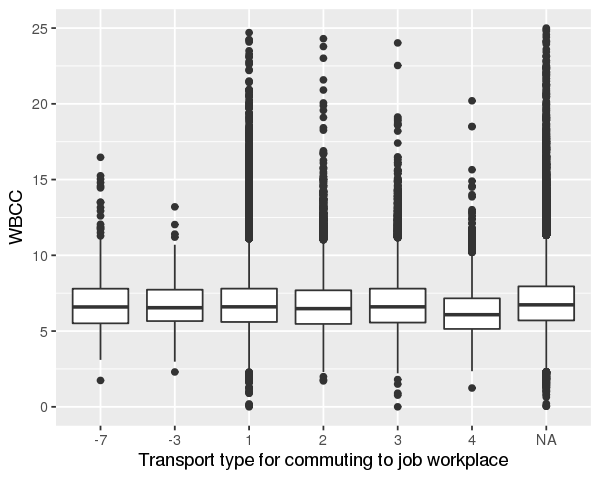

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

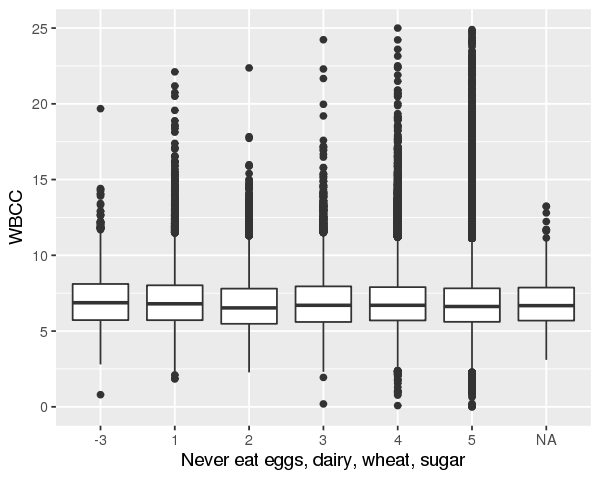

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

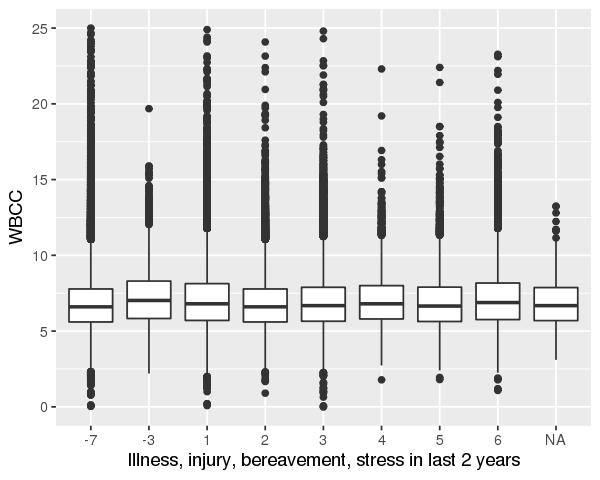

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

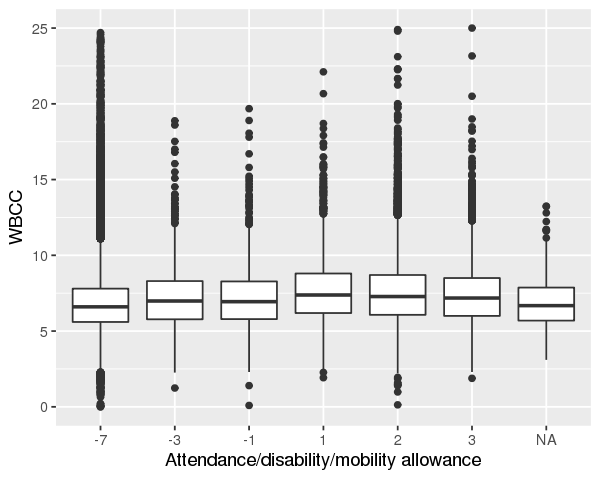

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

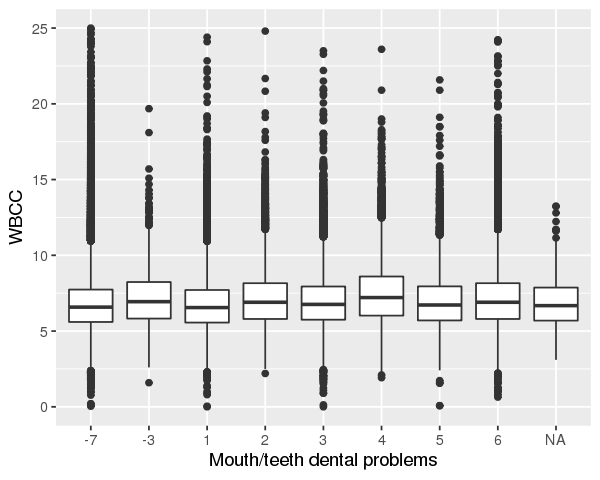

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

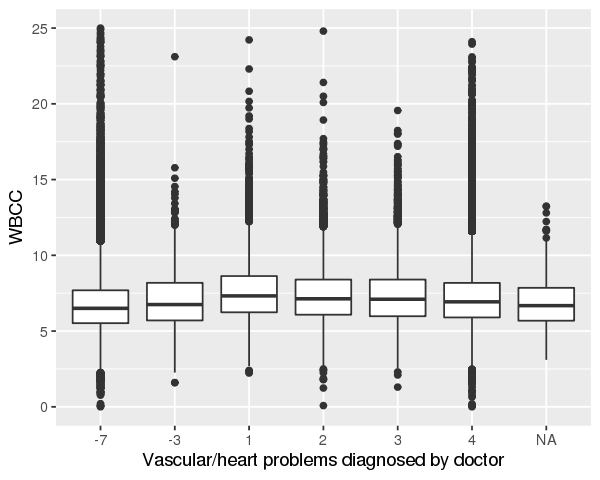

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

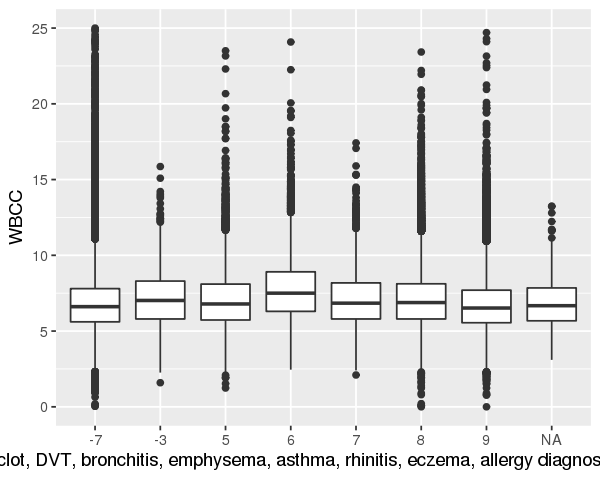

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

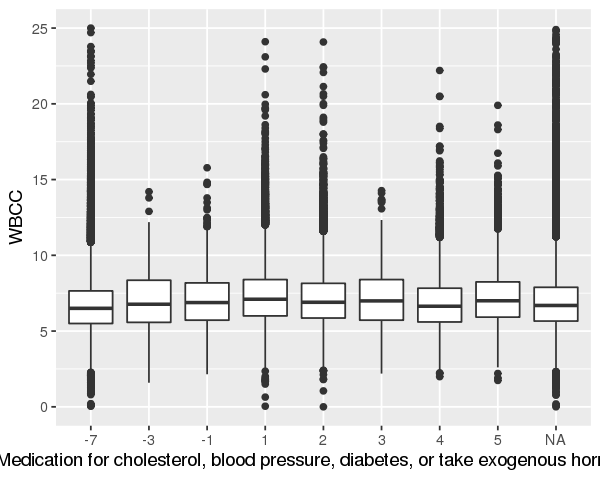

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

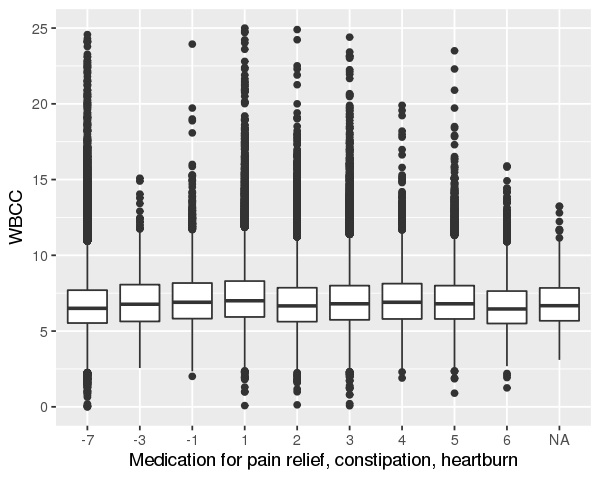

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

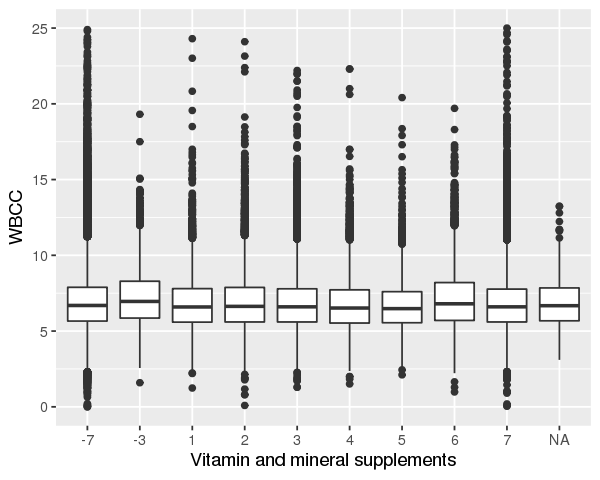

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

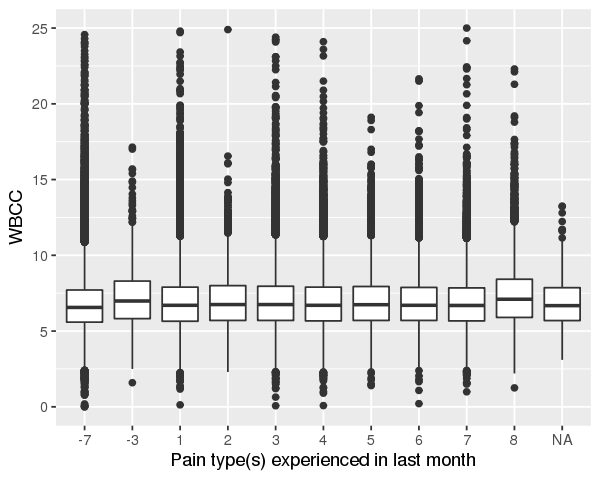

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

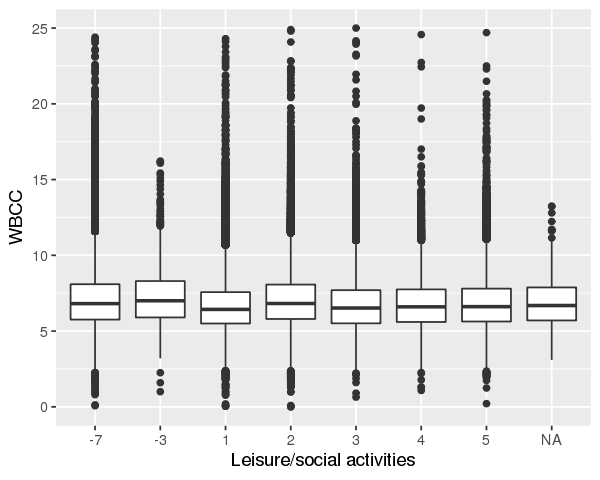

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

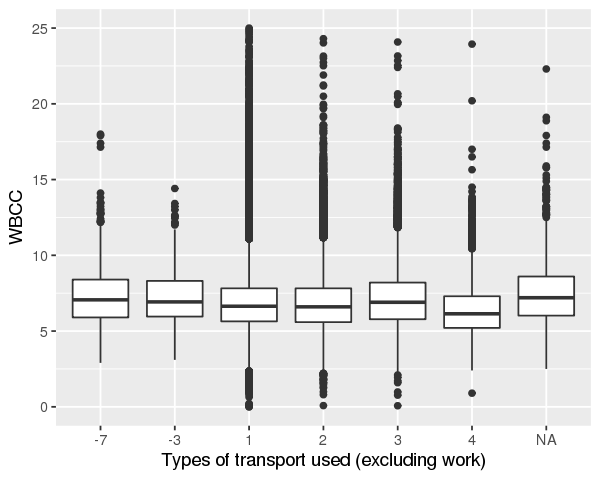

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

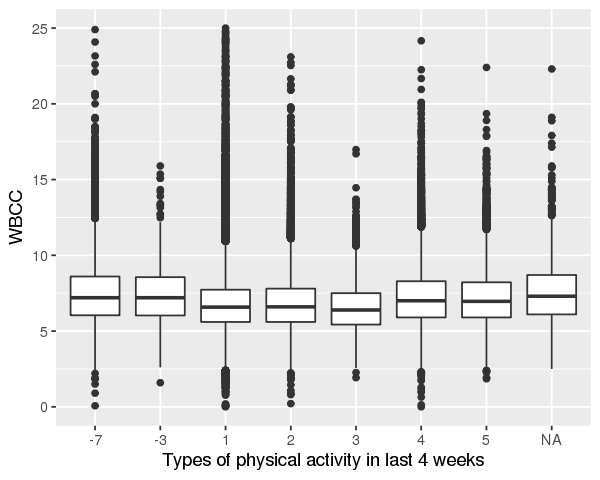

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

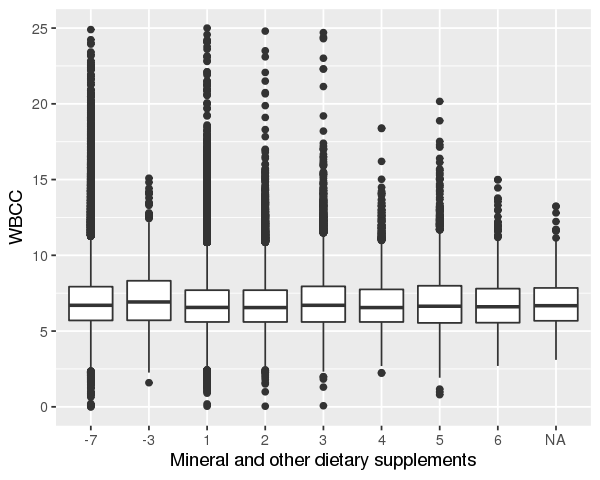

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

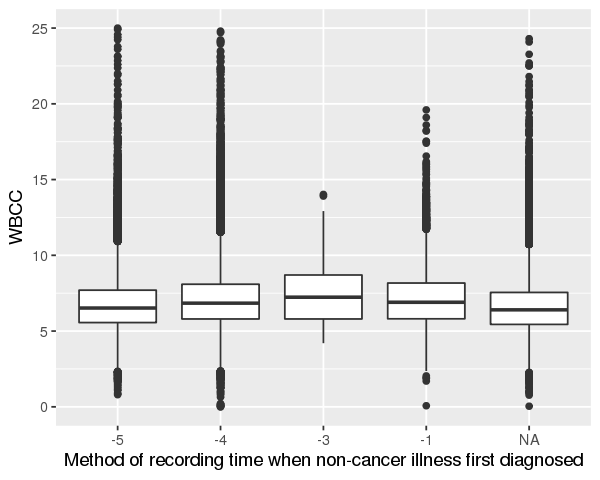

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

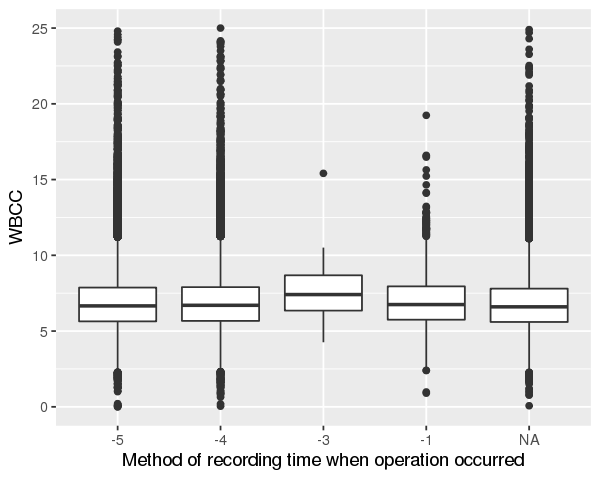

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

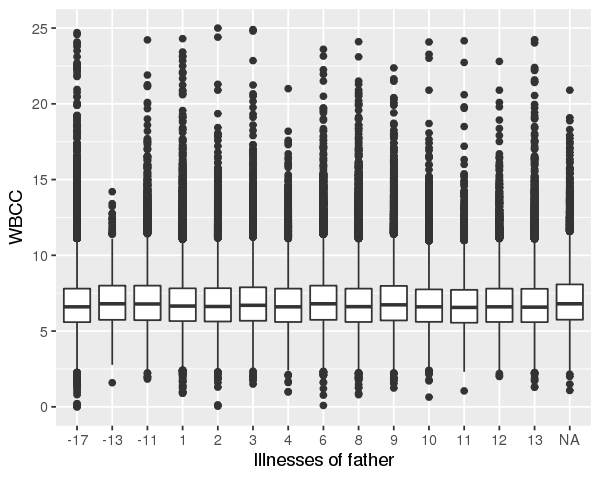

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

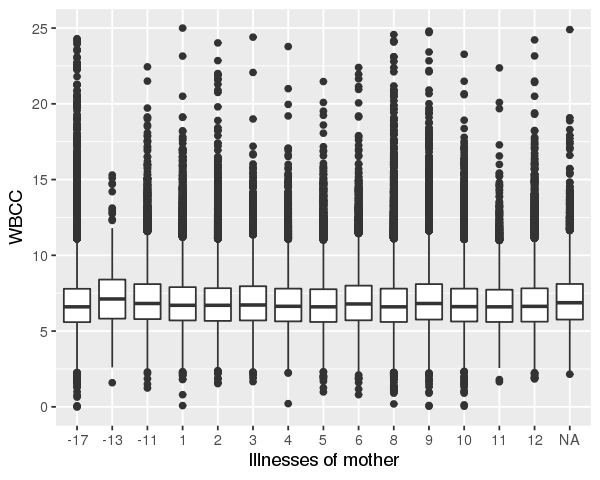

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

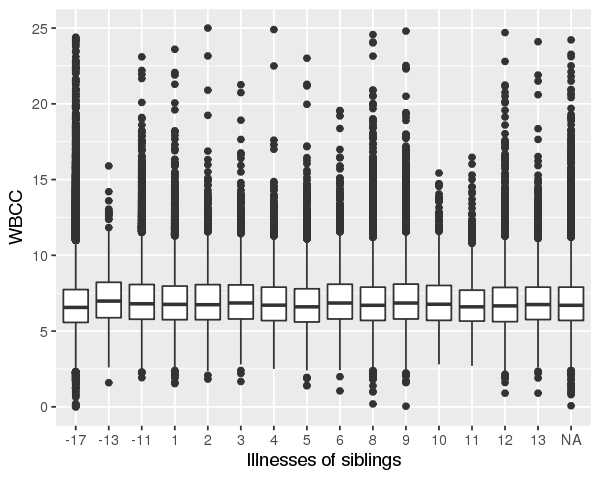

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

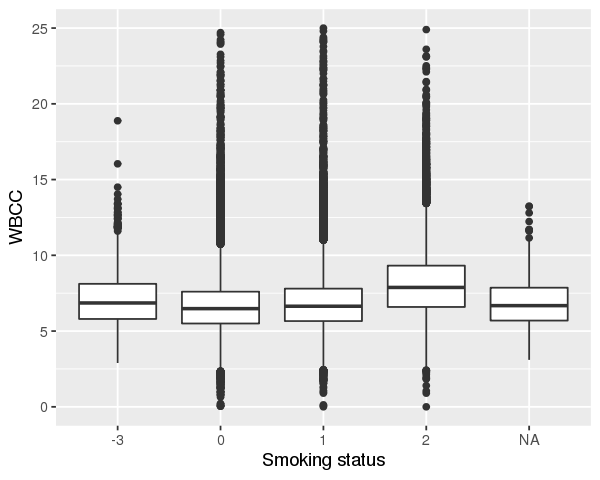

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

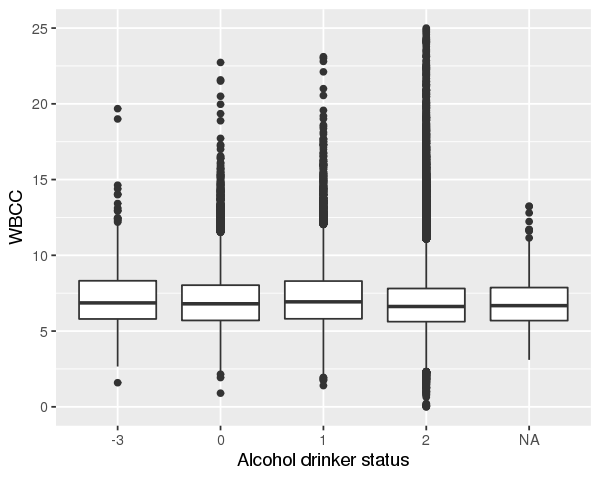

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

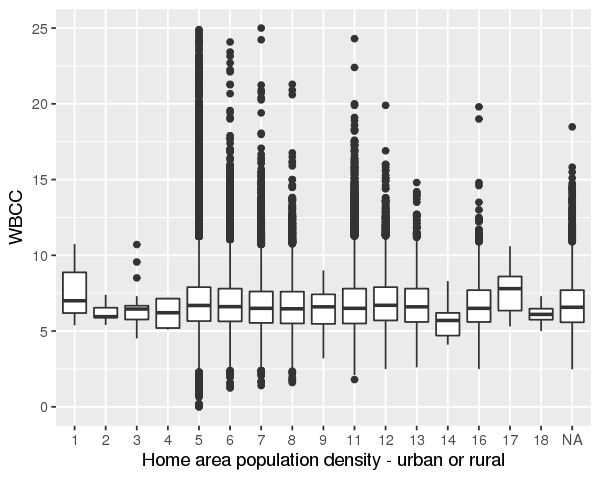

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

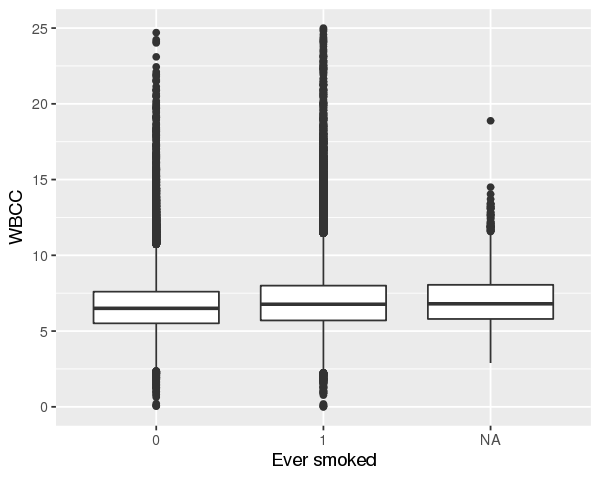

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

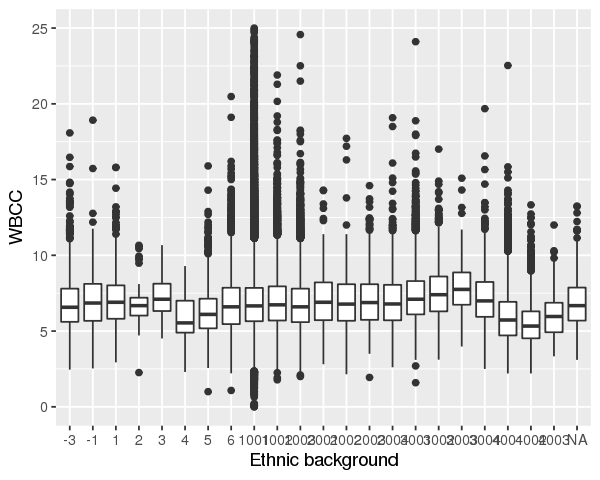

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

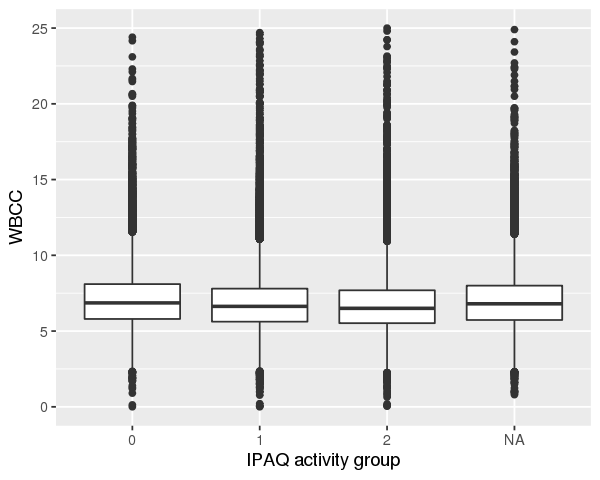

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

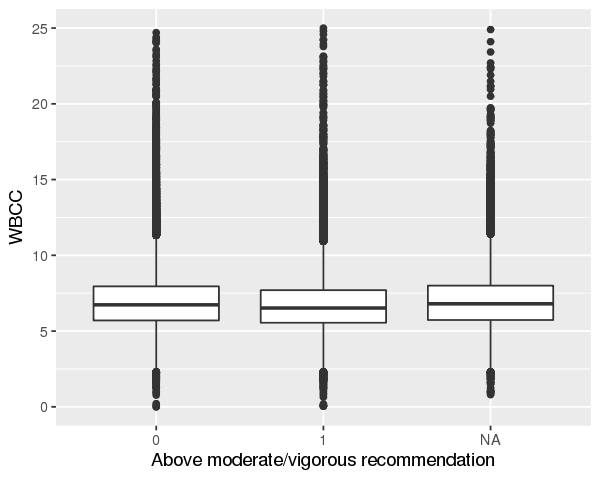

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

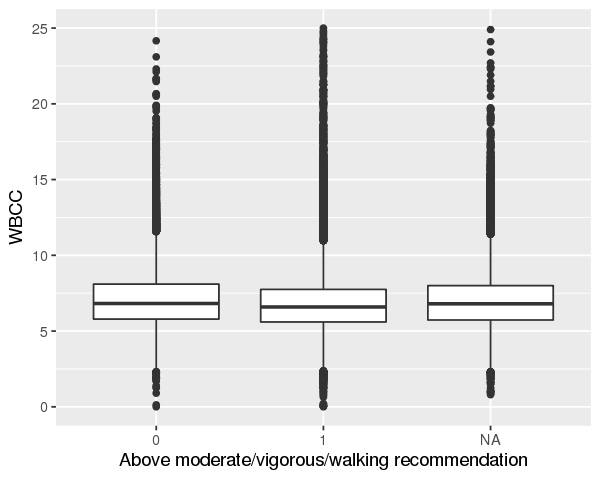

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

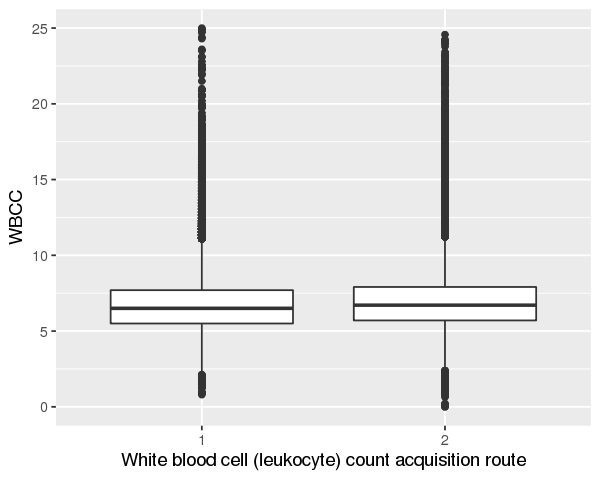

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

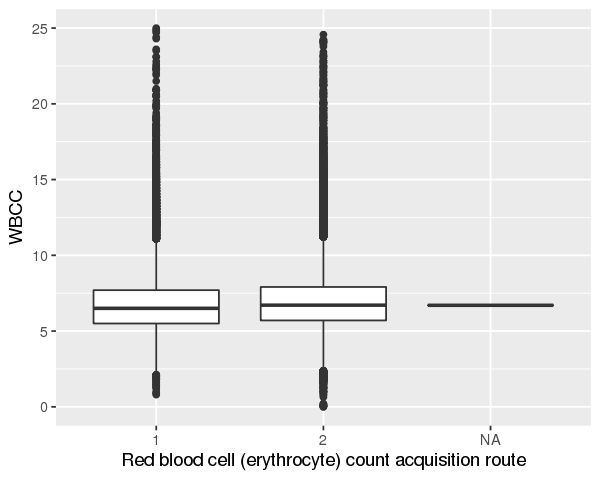

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

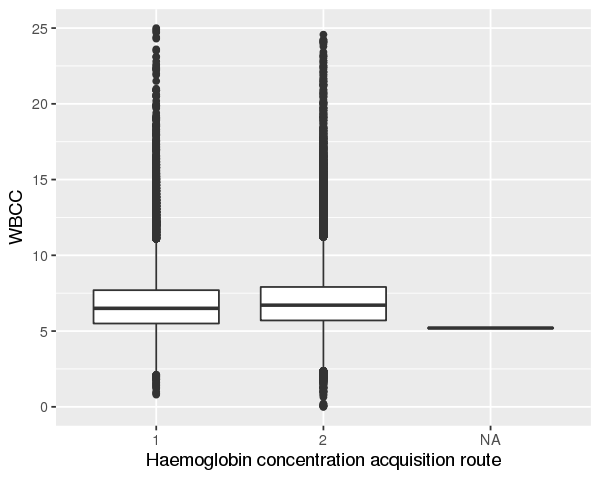

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

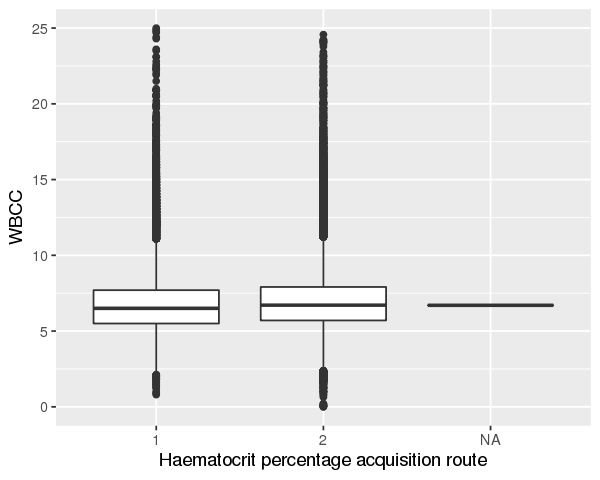

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

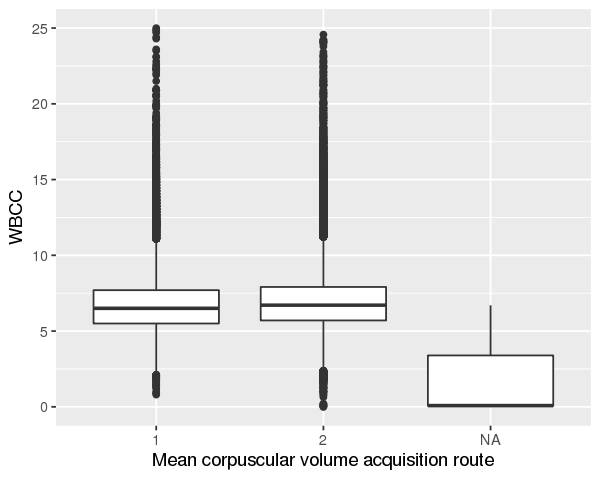

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

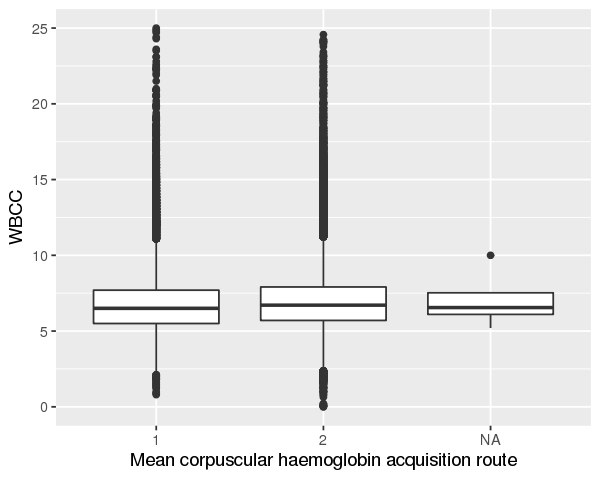

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

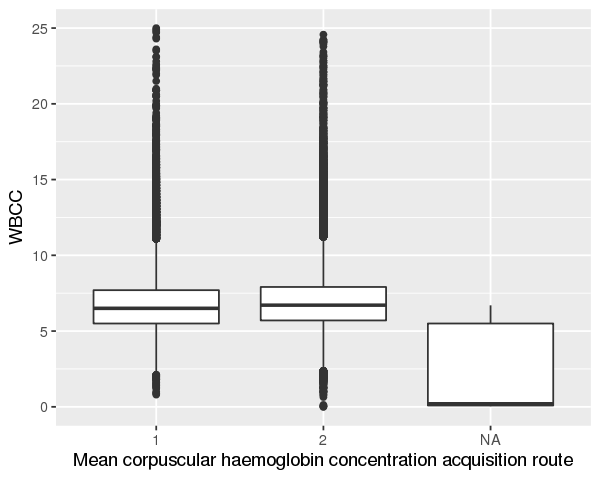

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

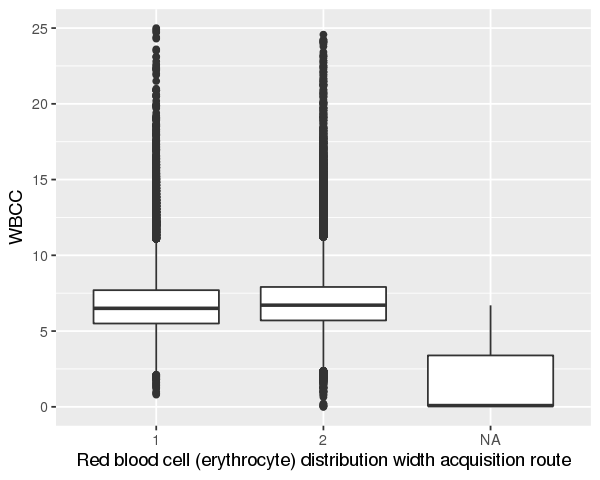

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

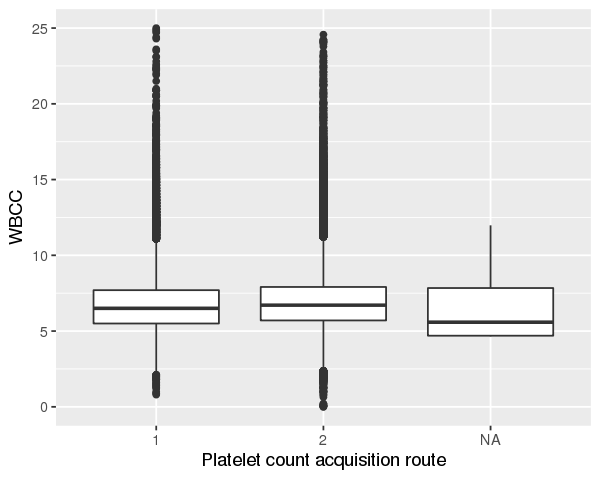

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

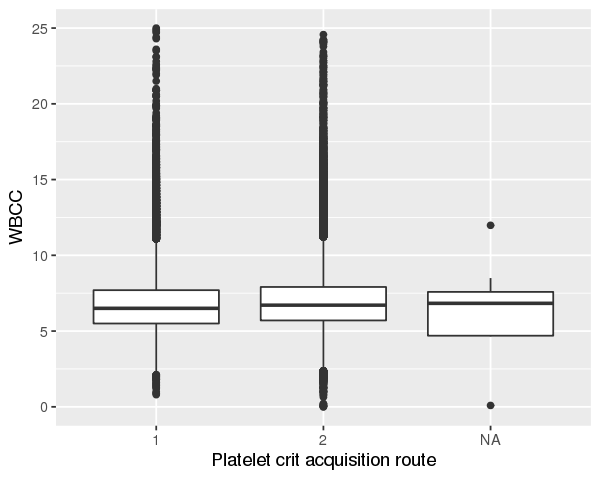

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

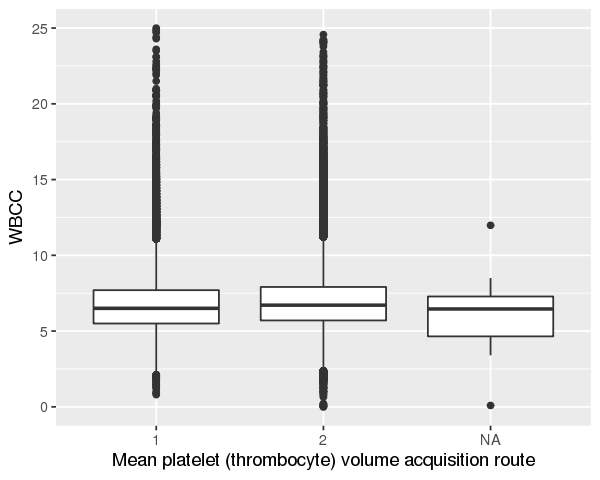

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

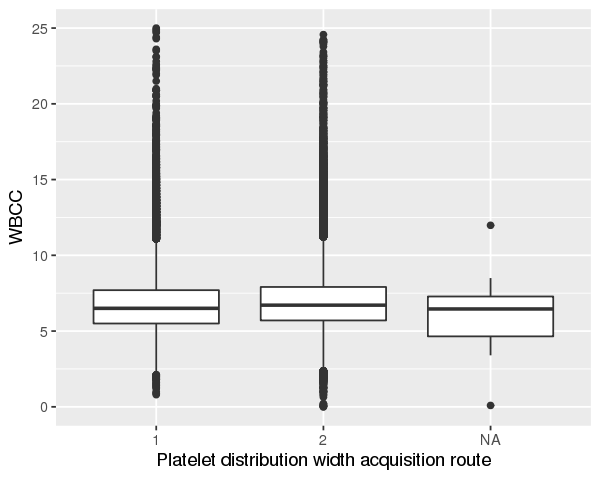

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

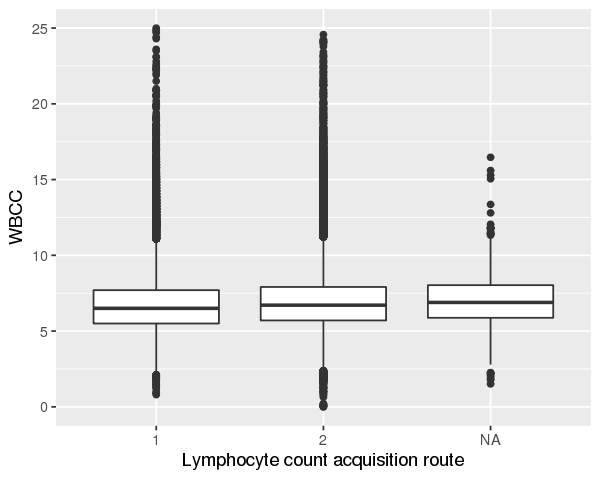

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

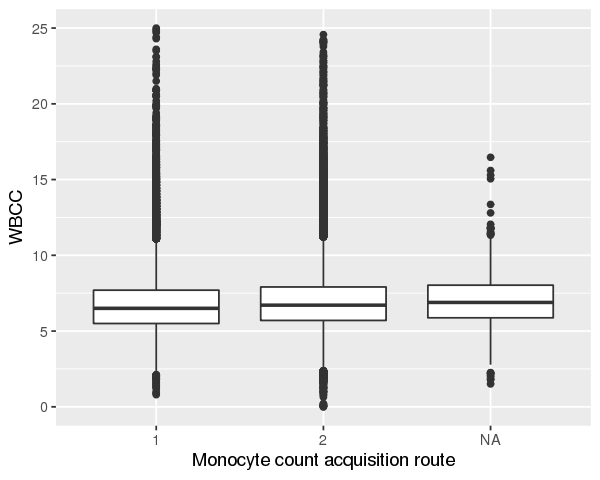

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

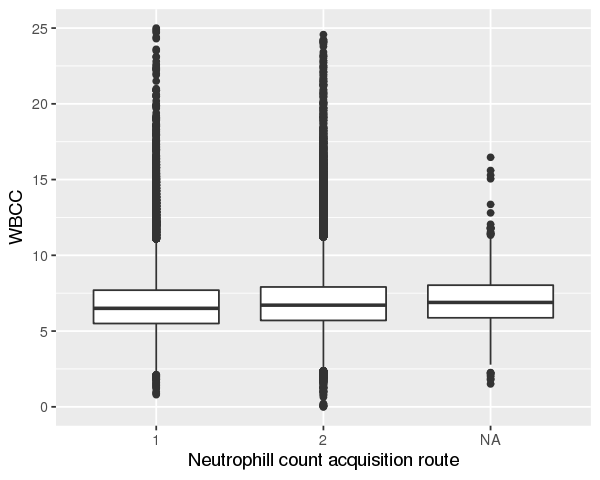

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

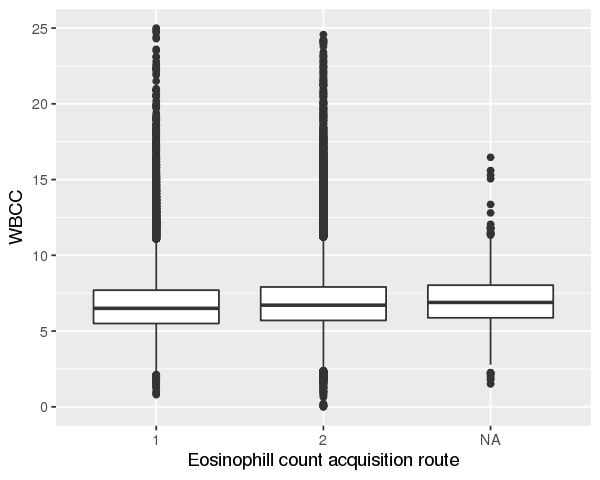

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

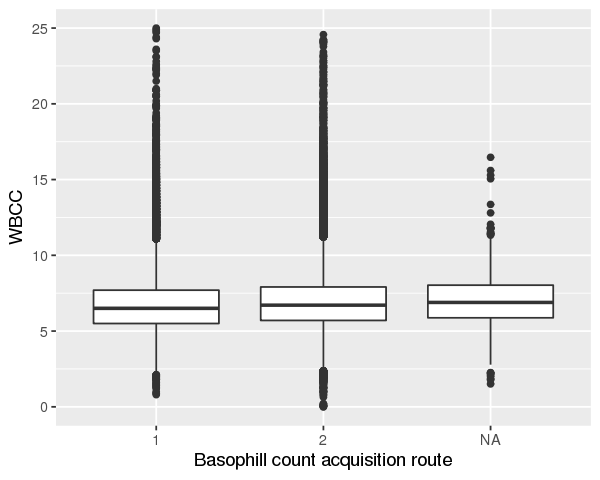

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

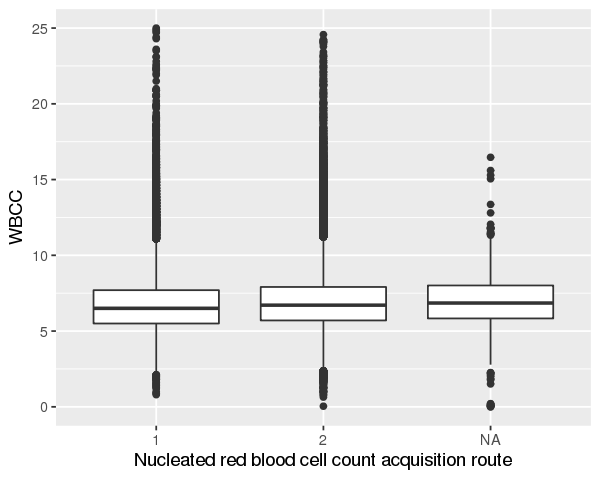

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

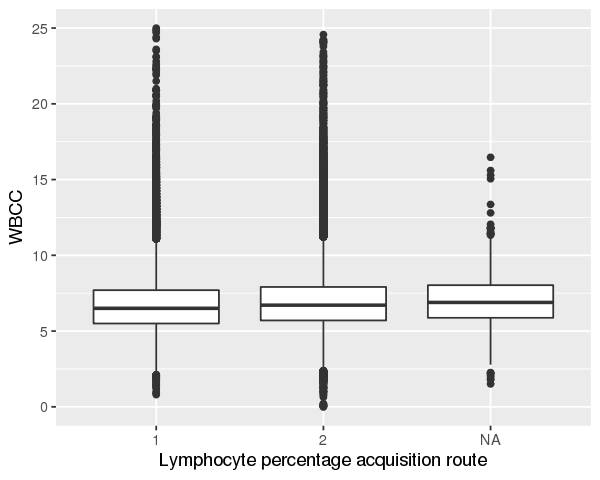

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

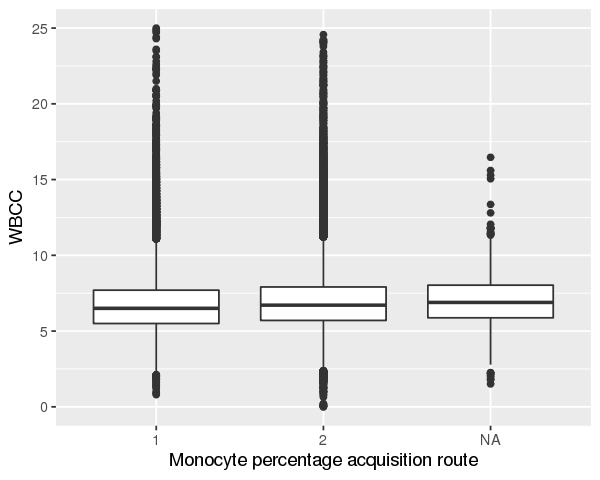

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

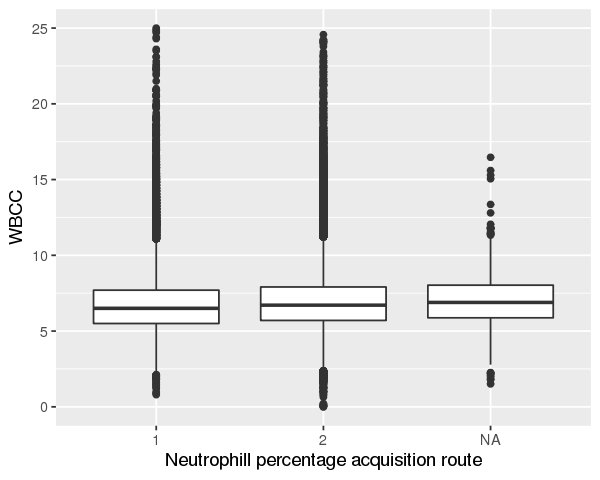

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

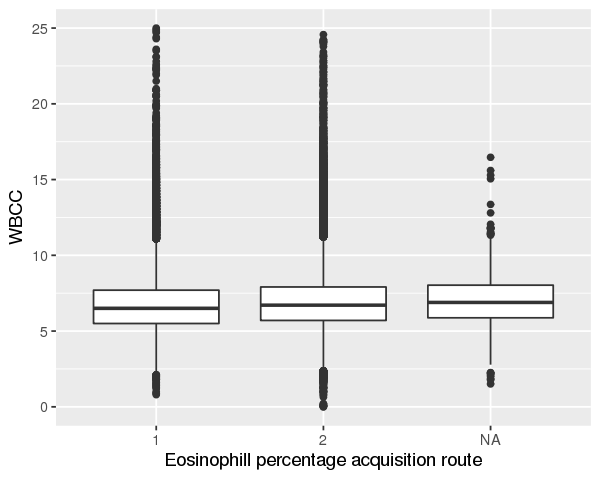

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

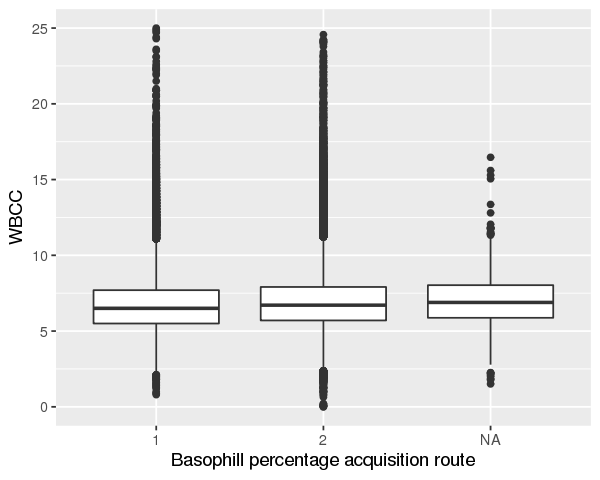

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

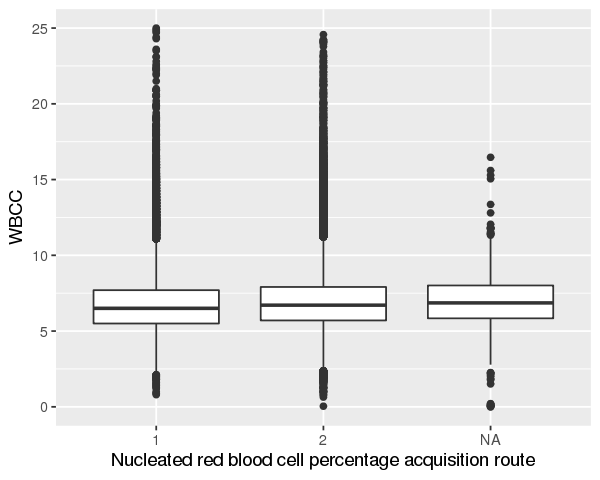

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

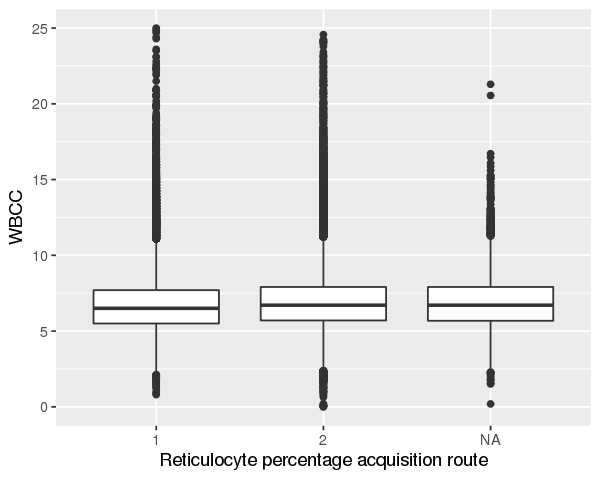

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

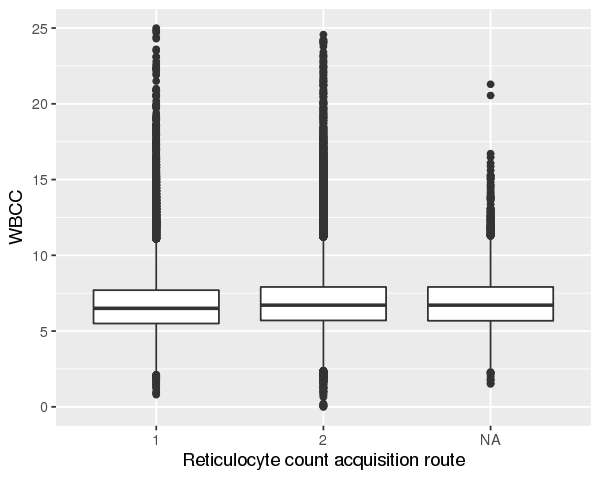

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

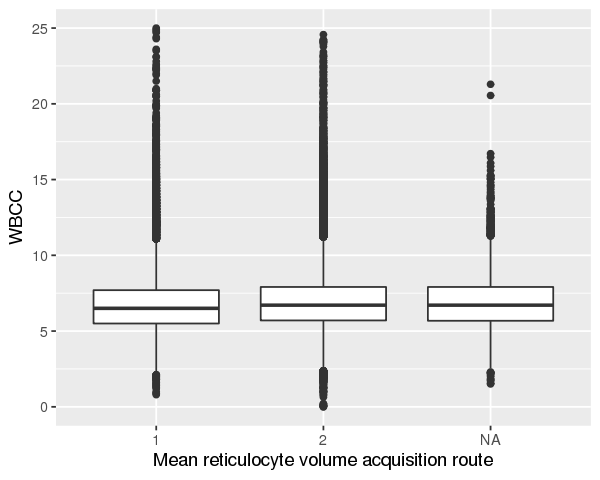

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

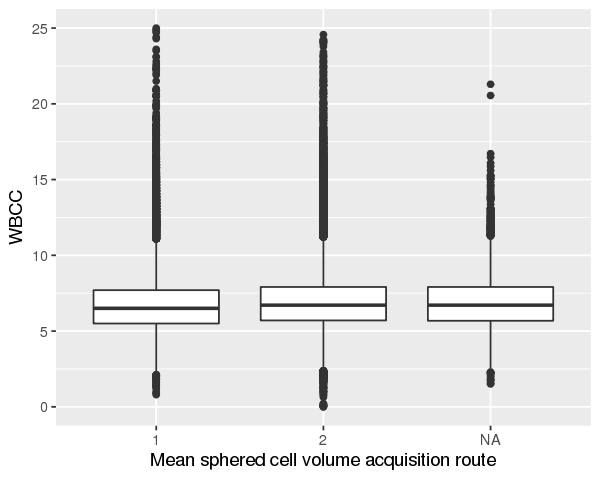

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

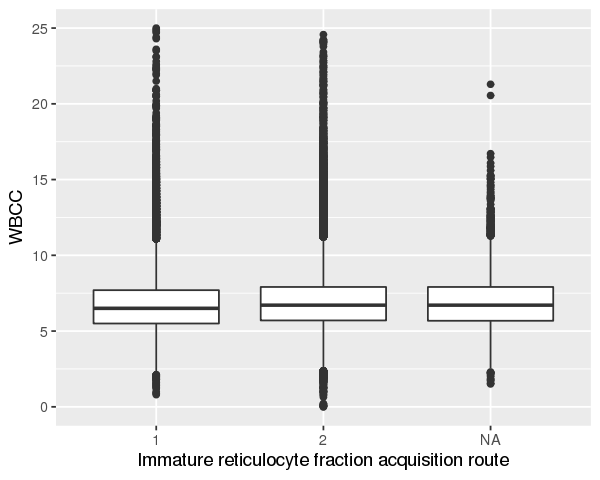

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

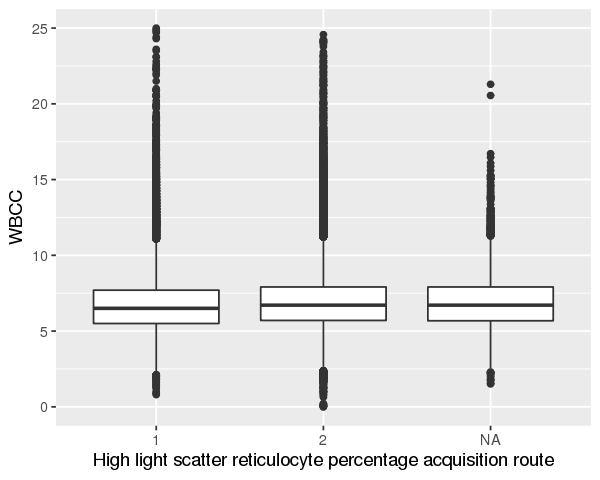

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

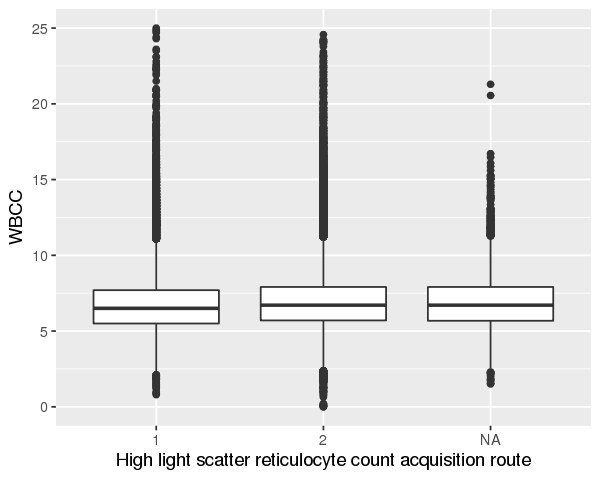

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

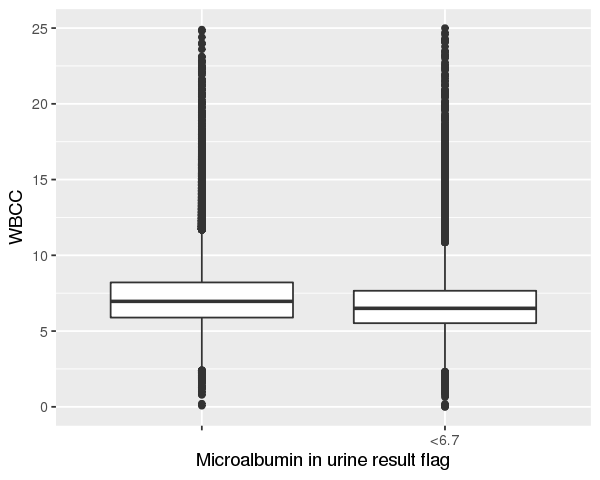

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

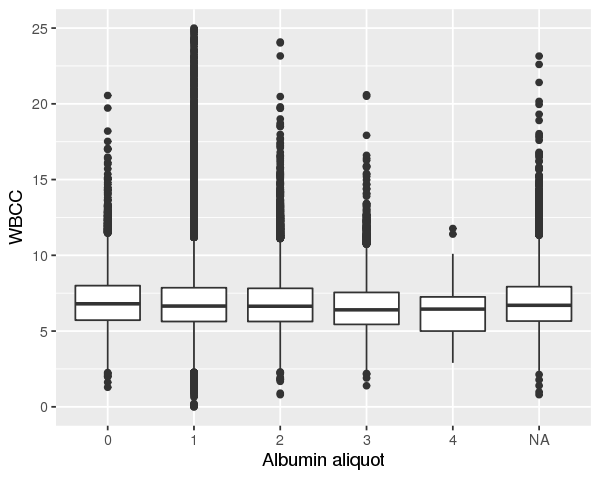

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

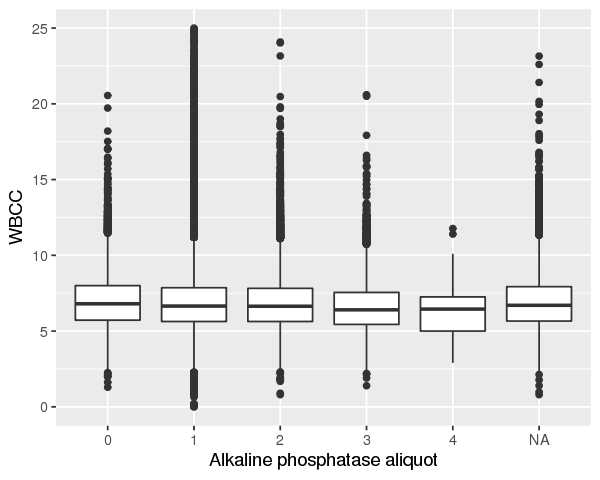

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

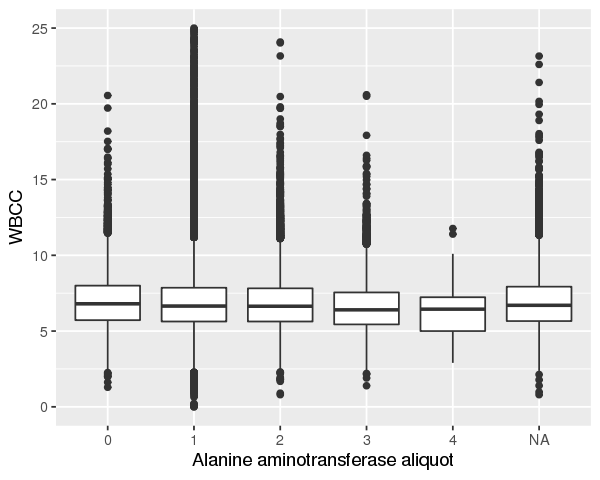

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

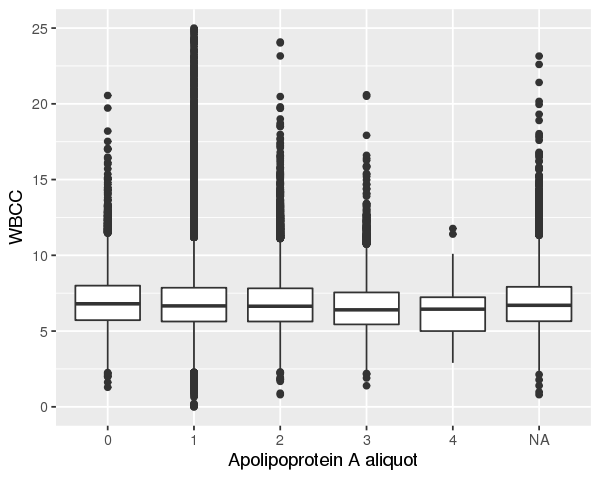

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

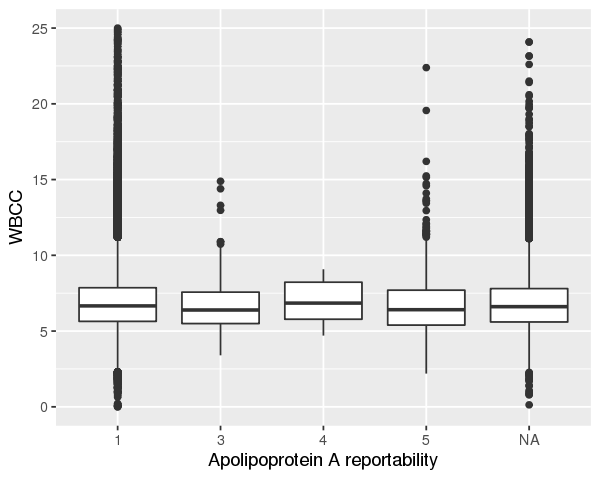

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

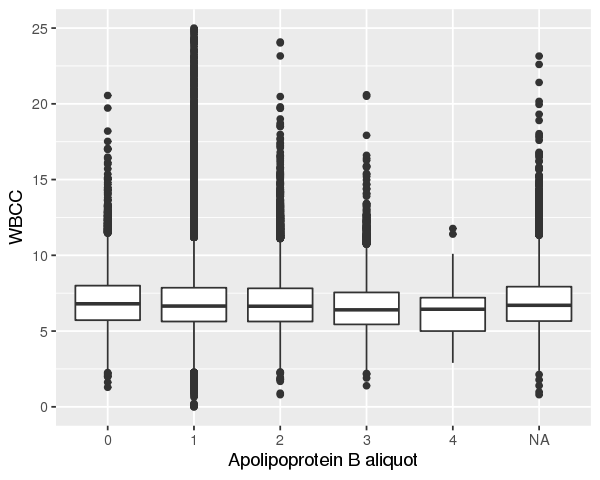

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

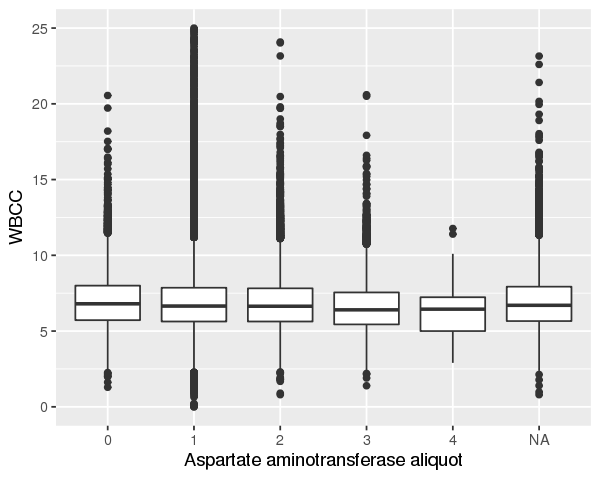

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

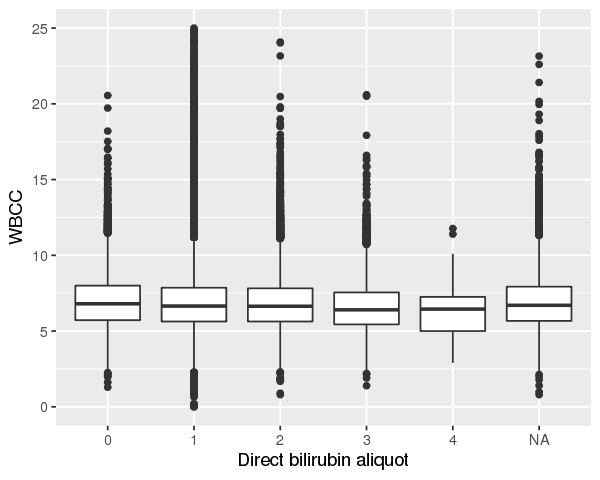

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

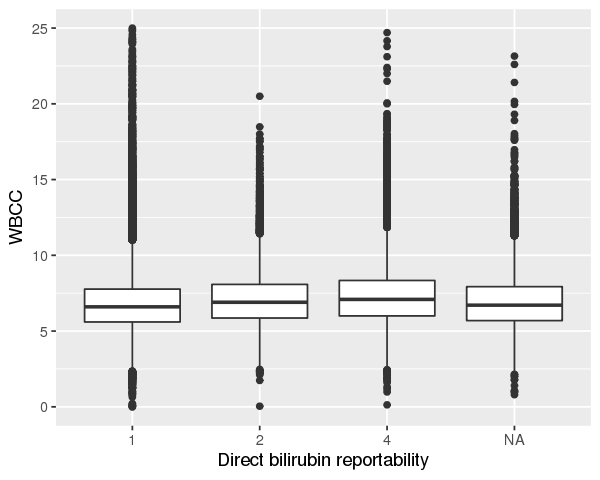

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

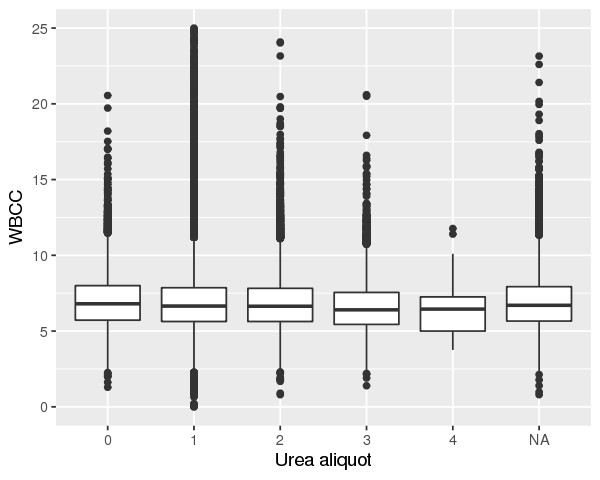

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

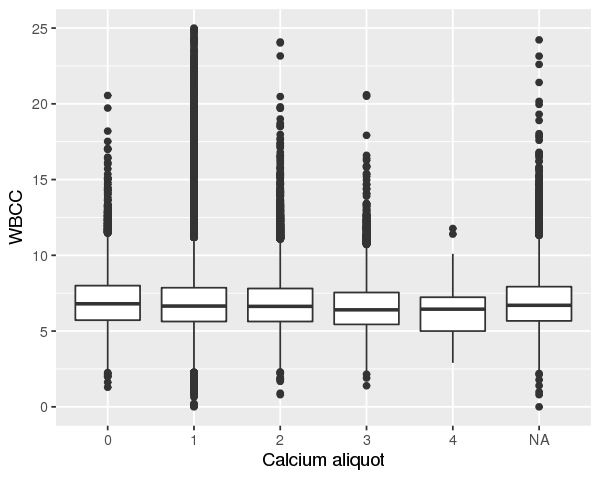

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

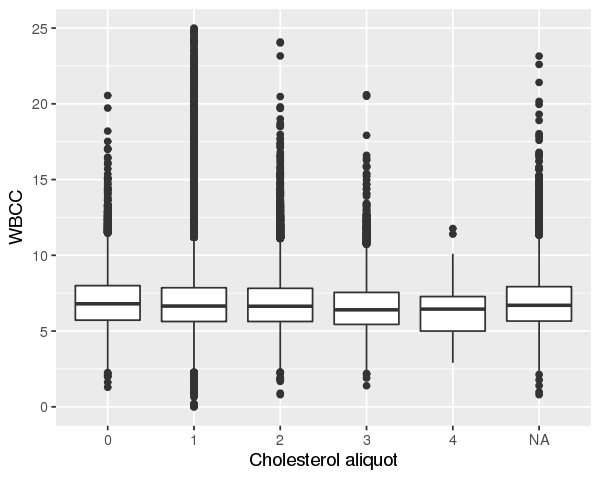

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

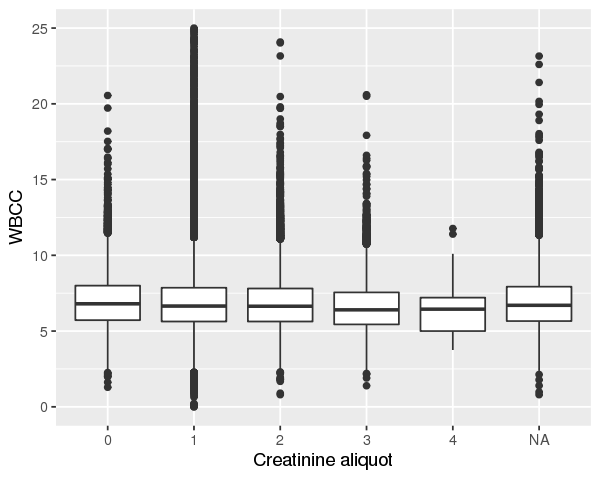

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

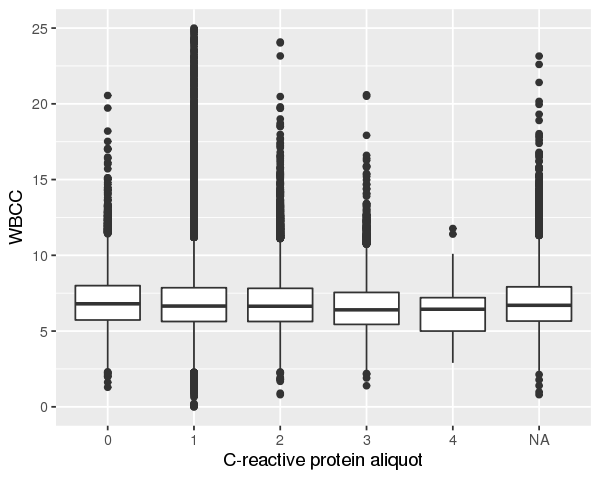

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

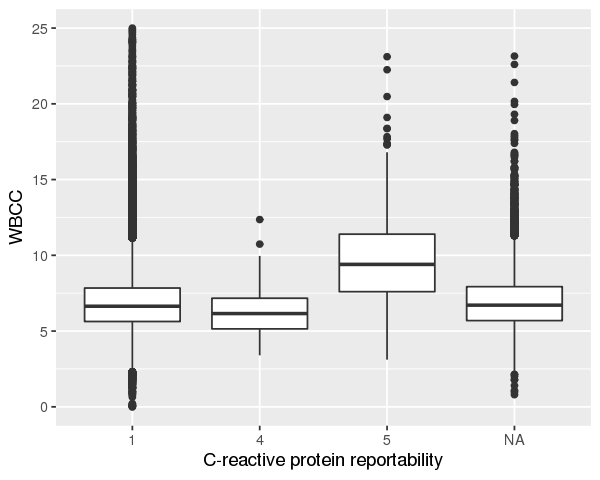

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

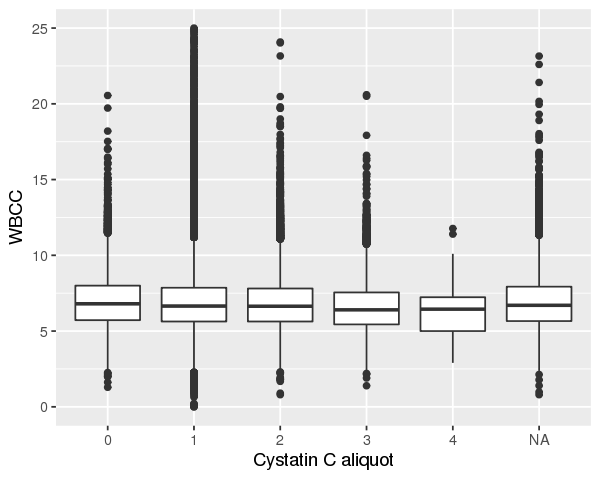

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

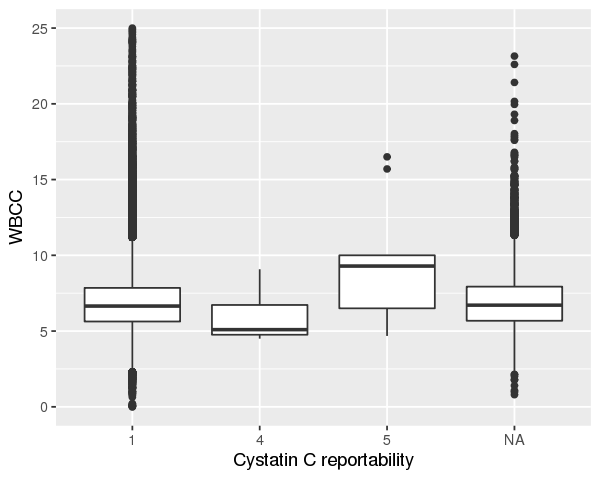

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

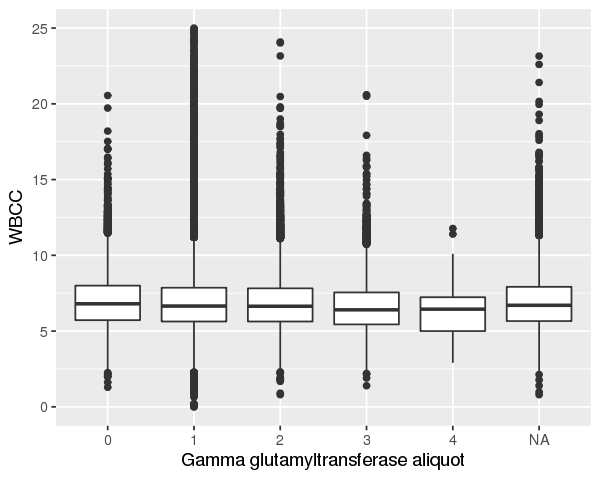

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

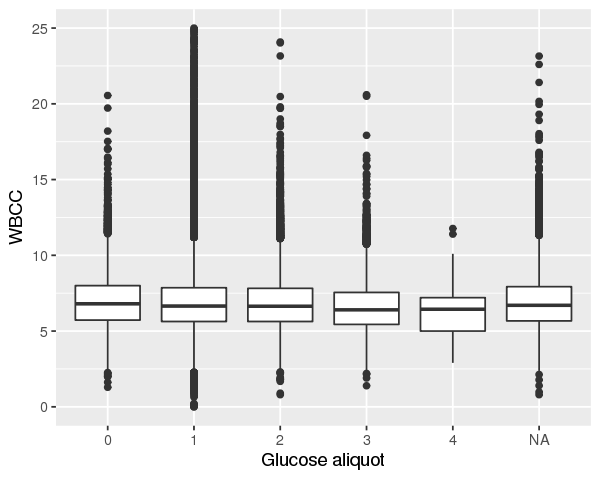

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

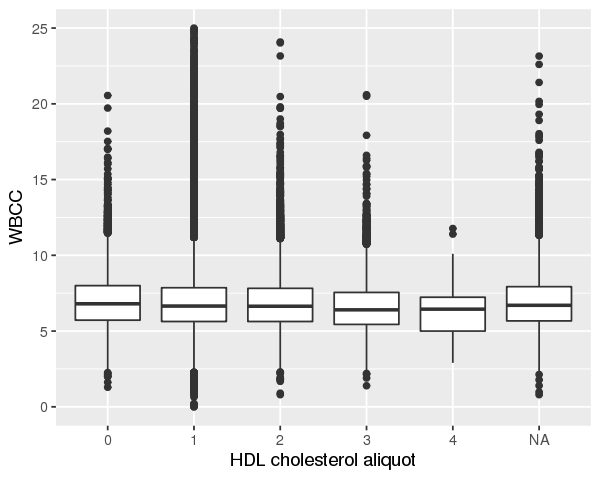

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

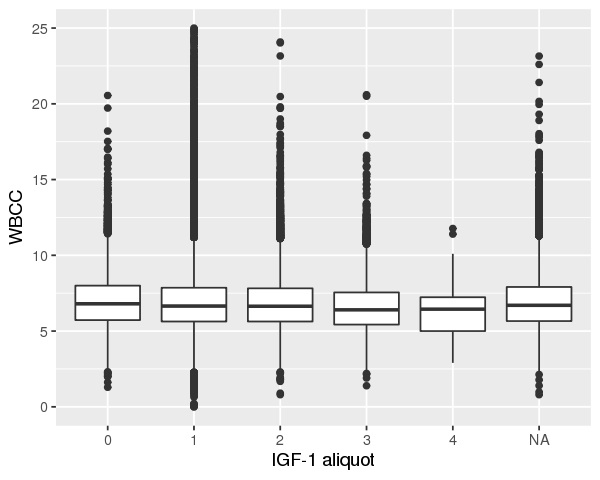

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

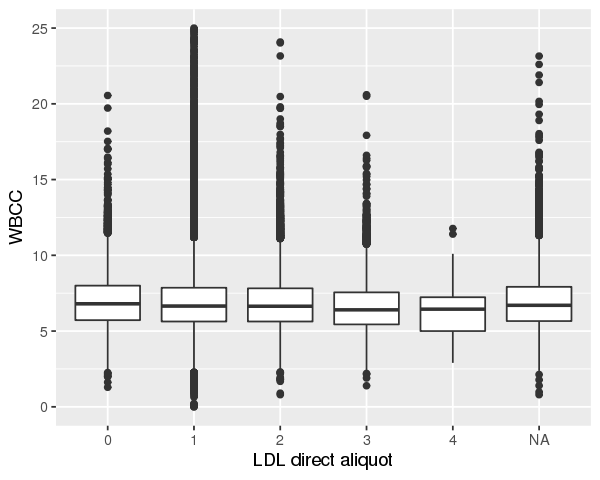

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

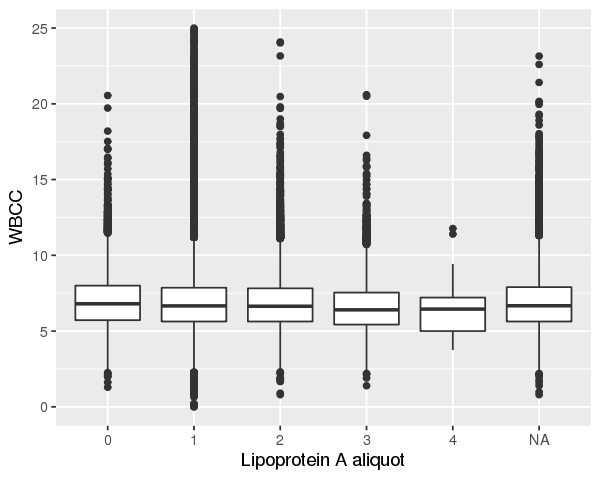

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

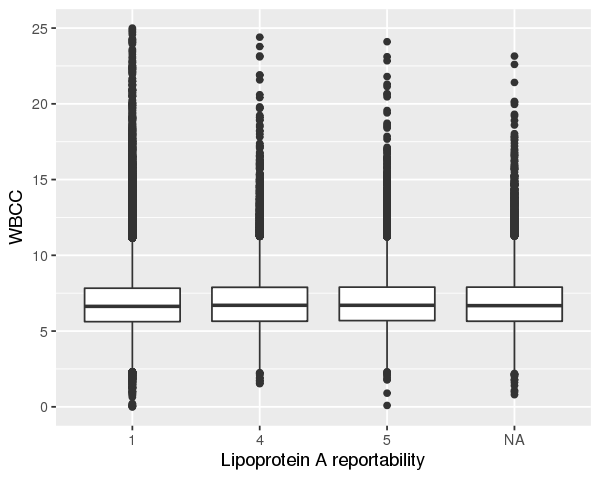

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

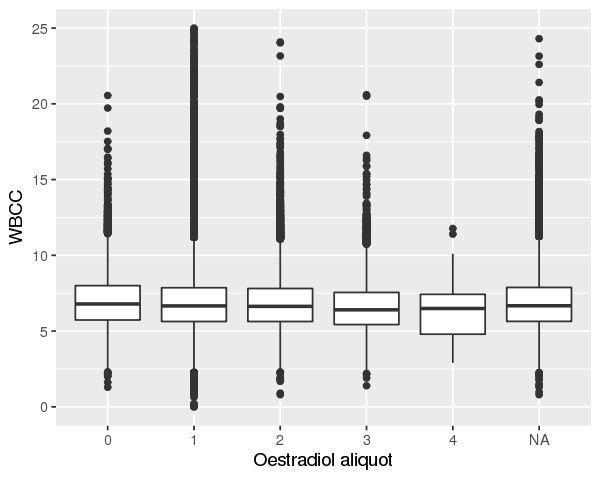

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

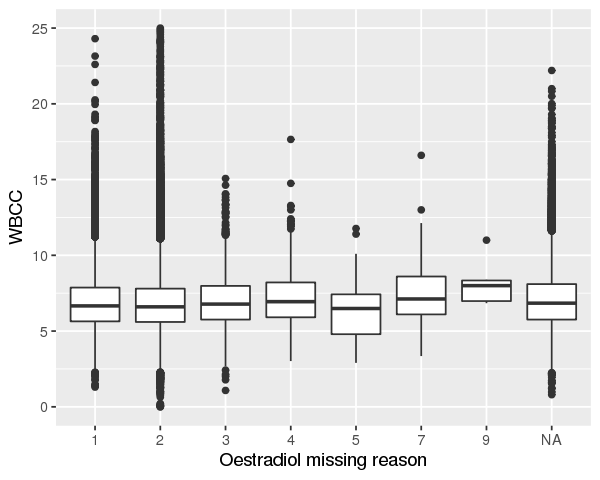

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

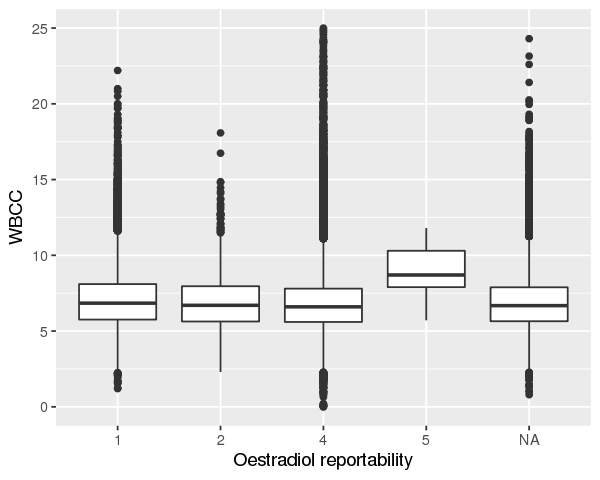

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

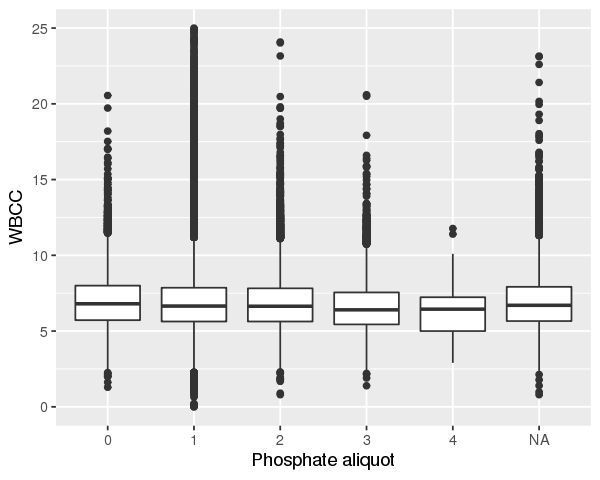

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

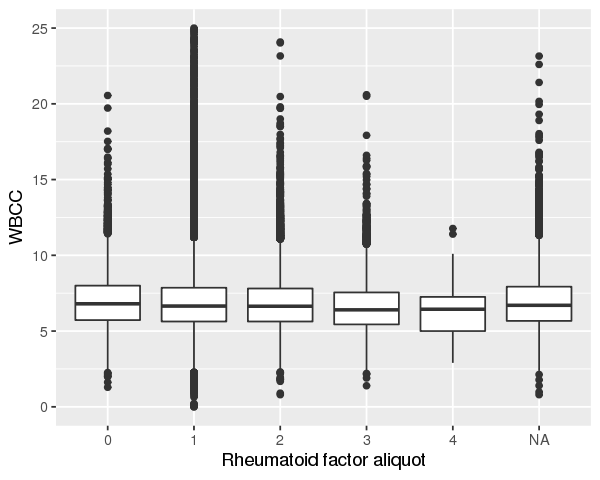

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

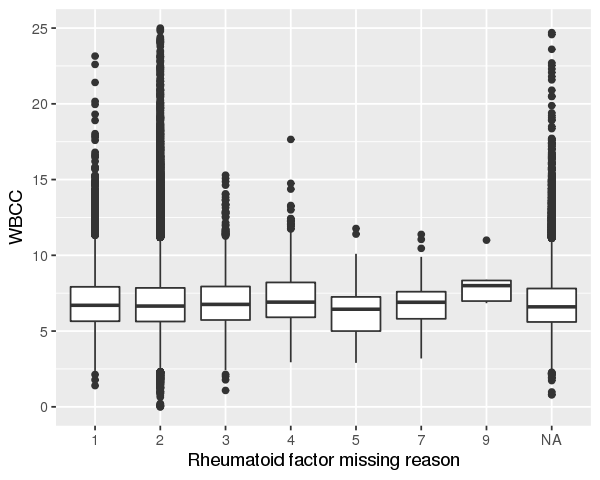

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

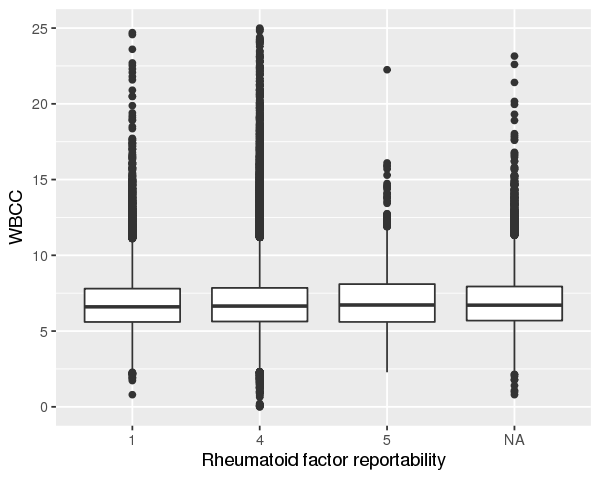

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

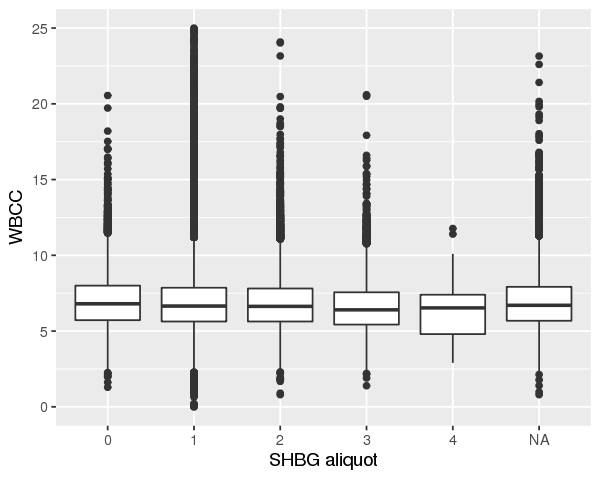

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

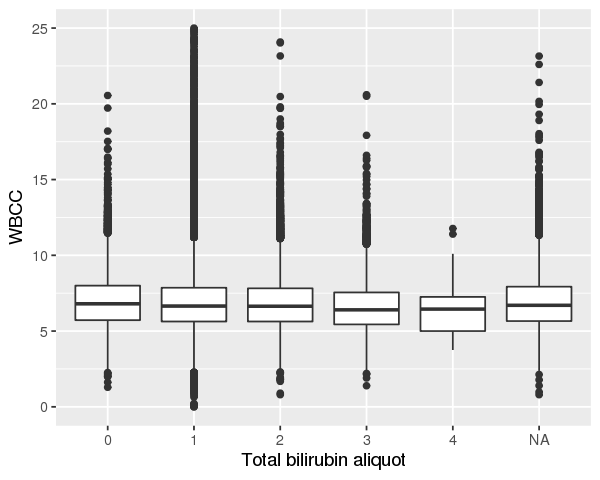

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

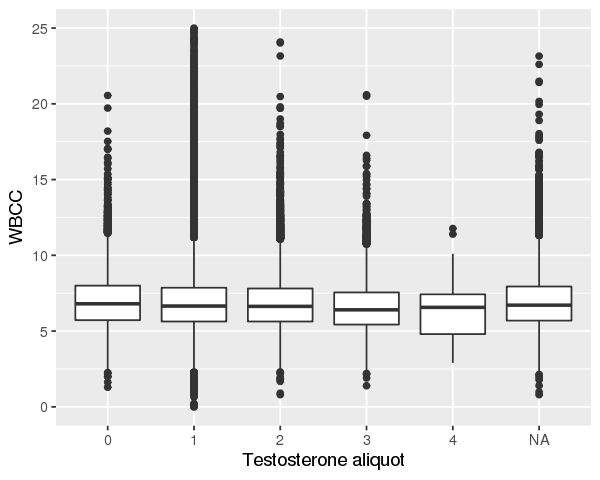

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

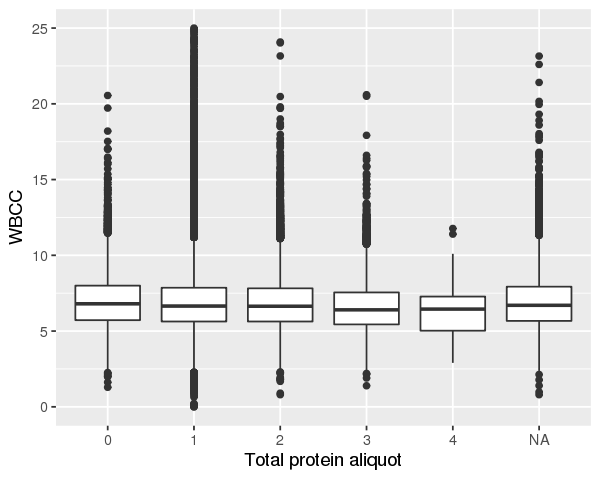

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

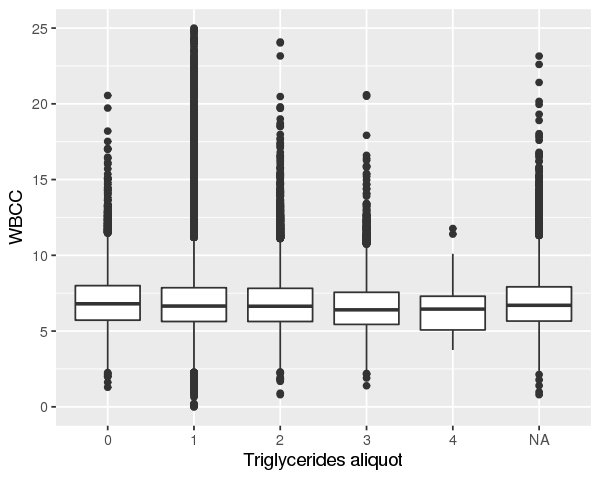

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

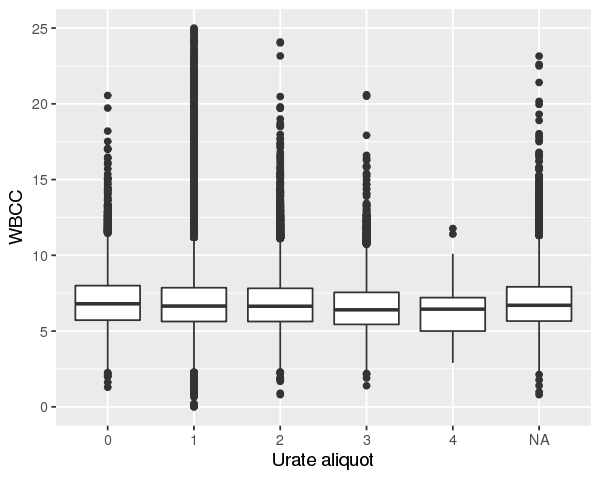

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

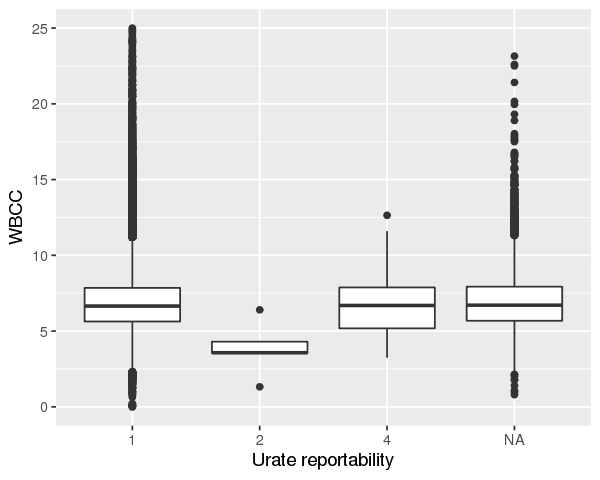

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

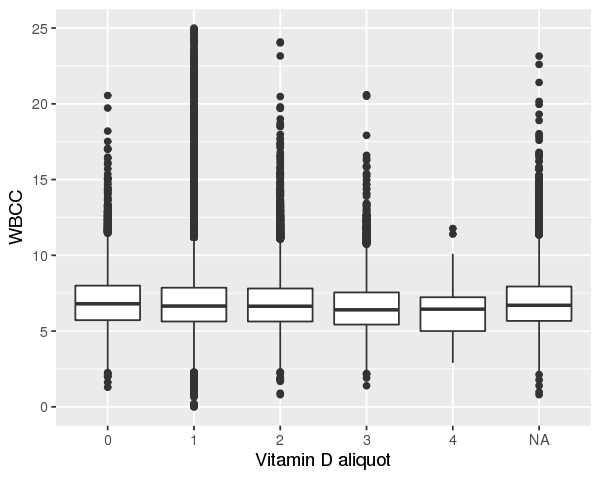

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

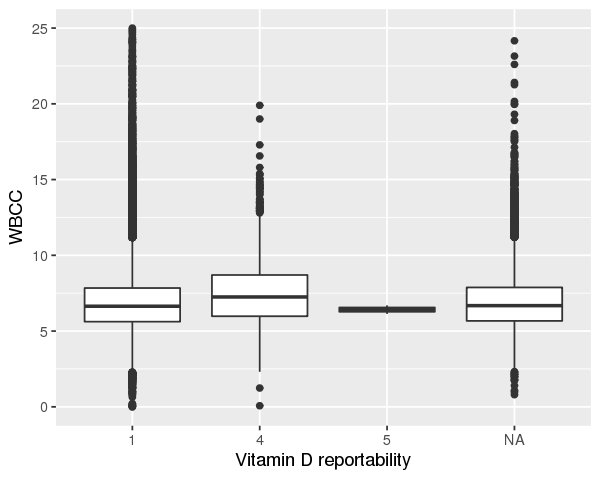

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

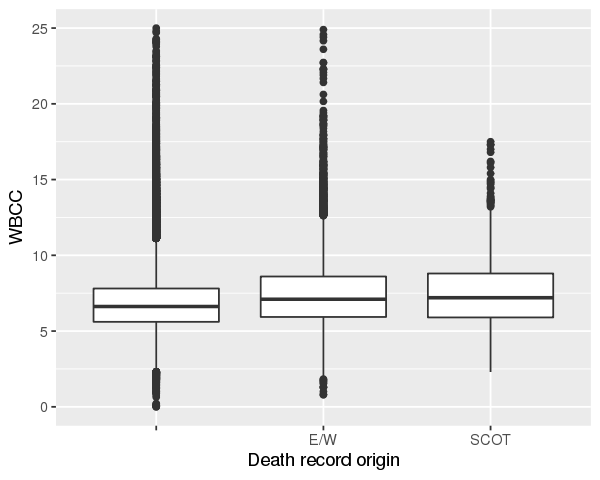

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

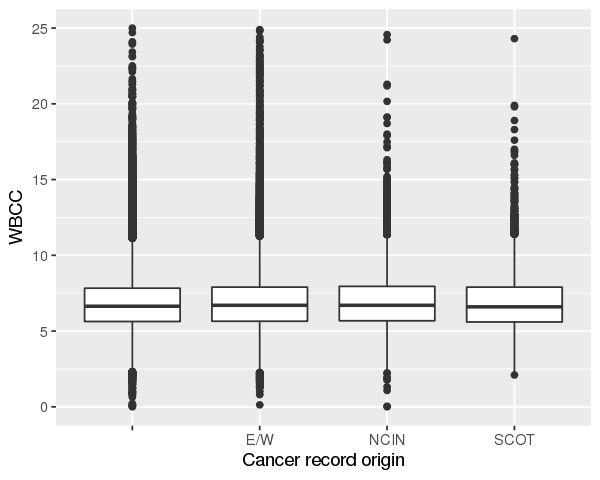

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

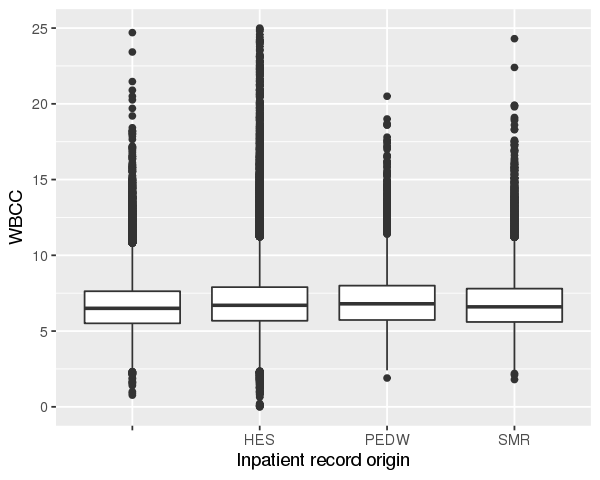

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

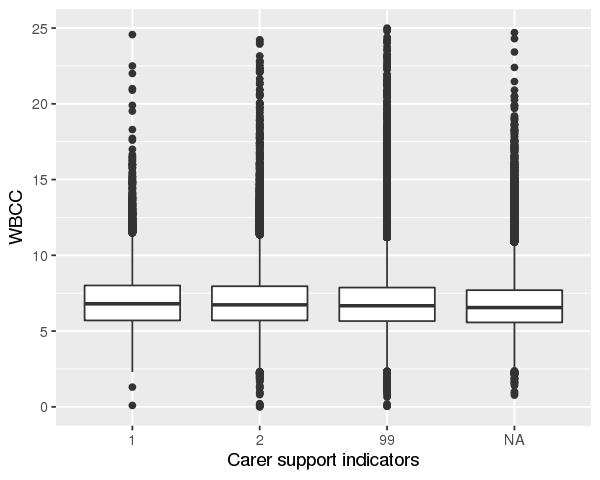

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

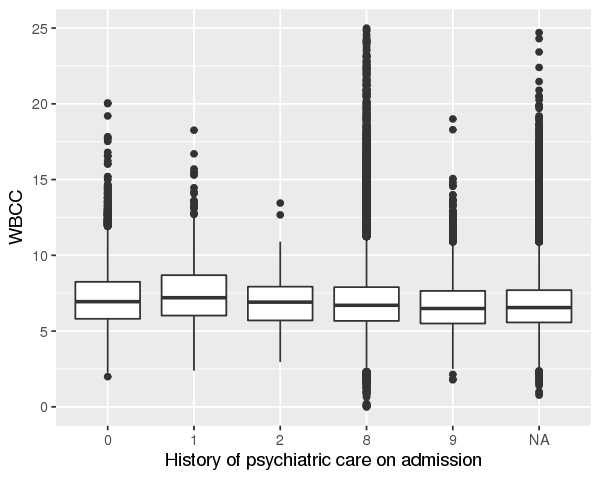

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

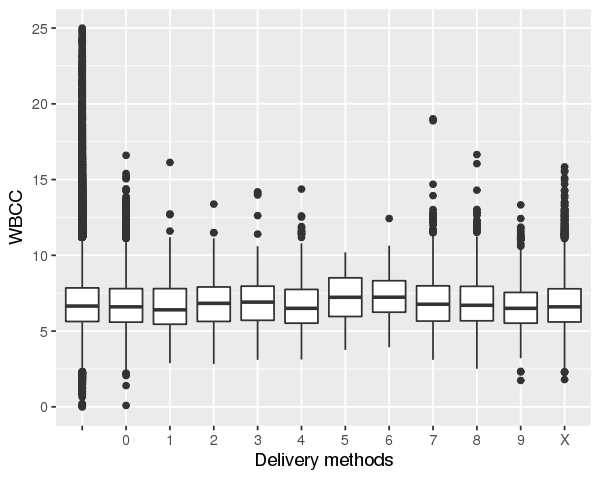

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

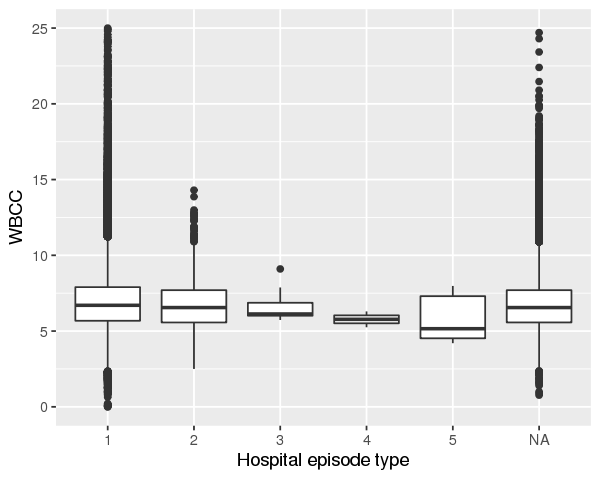

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

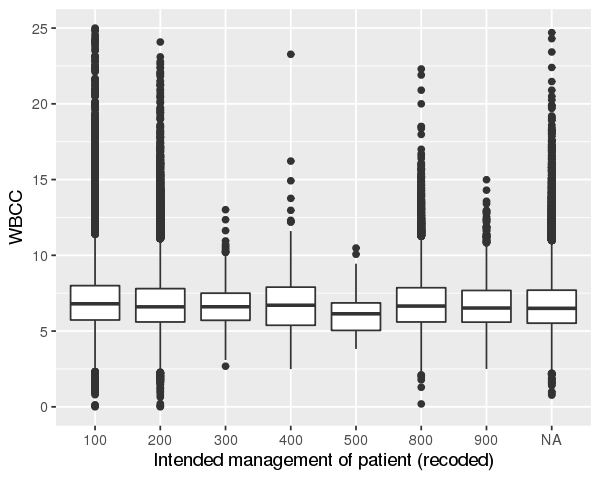

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

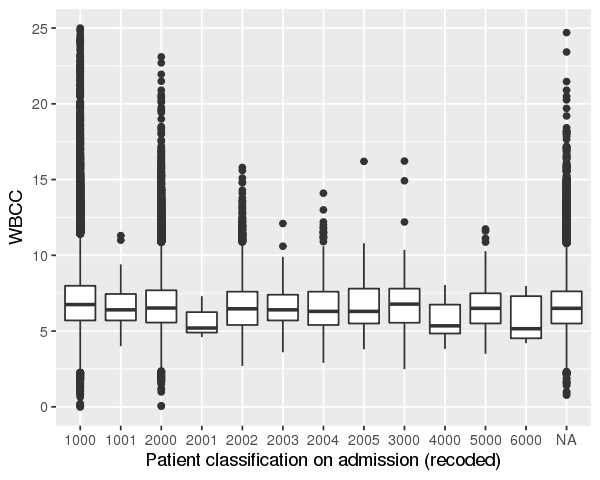

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

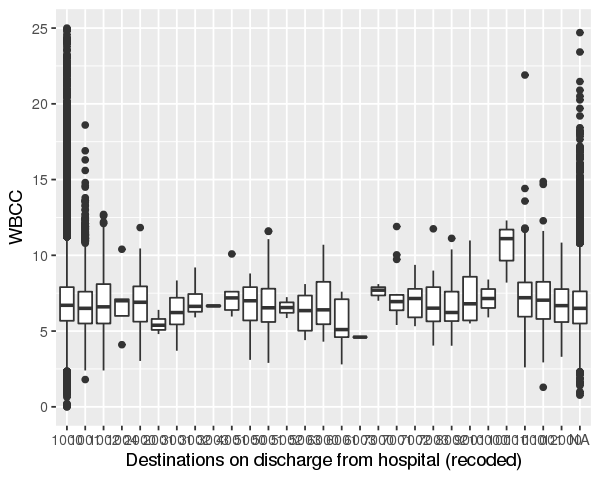

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

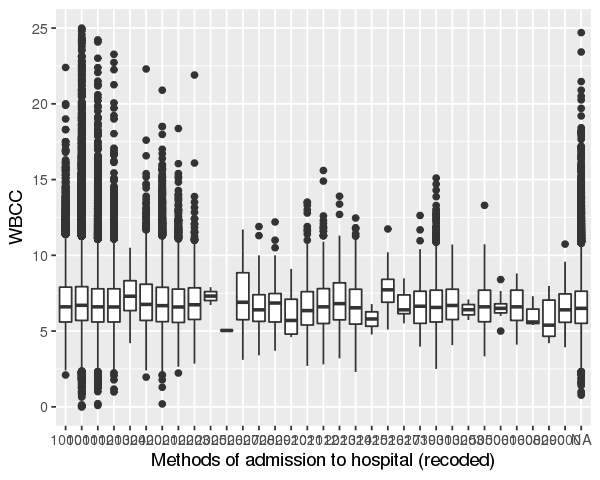

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

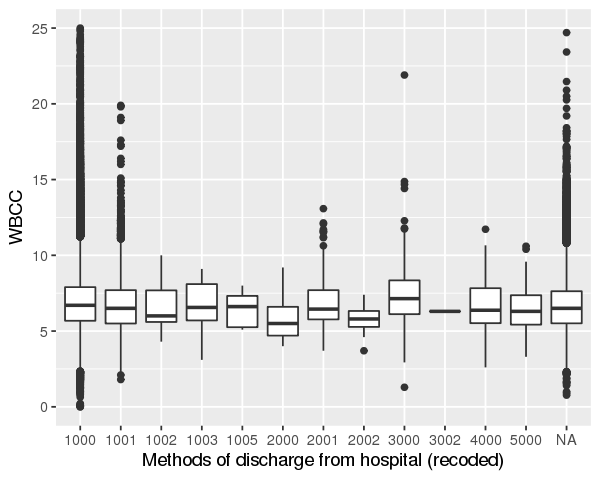

Warning message:
“Removed 176 rows containing non-finite values (stat_boxplot).”

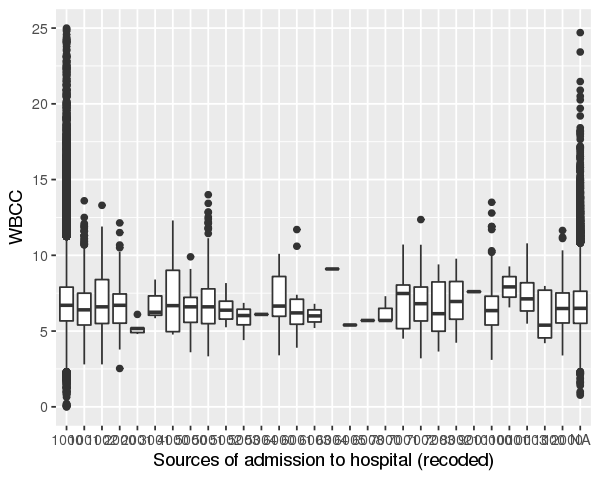

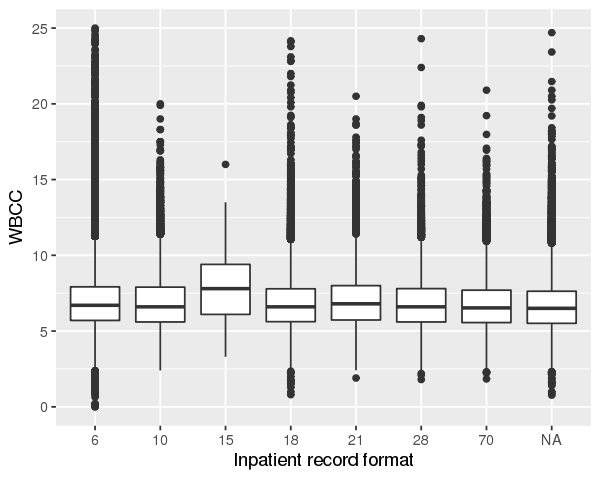

In [72]:
options(repr.plot.width=5, repr.plot.height=4)
for( i in 1:length(cols$var))
    {
    plot_box(cols$var[i],cols$var_names[i])
}

In [22]:
delete<-c('21-0.0','54-0.0','55-0.0','120-0.0','670-0.0','680-0.0','728-0.0','738-0.0','1031-0.0','1110-0.0')
cols<-cols %>% filter( ! var %in% delete)

In [23]:
delete<-c('1647-0.0','1677-0.0','1687-0.0','1697-0.0','1717-0.0','1727-0.0','1747-0.0','1757-0.0','1767-0.0','1797-0.0')
cols<-cols %>% filter( ! var %in% delete)

In [24]:
delete<-c('1835-0.0','2237-0.0','2296-0.0','3393-0.0','4081-0.0','6138-0.0','6141-0.0','6142-0.0','6143-0.0','20118-0.0')
cols<-cols %>% filter( ! var %in% delete)

In [25]:
delete<-c('30004-0.0','30014-0.0','40020-0.0','40021-0.0','40022-0.0','41244-0.0','41247-0.0','41249-0.0','41250-0.0','41253-0.0')
cols<-cols %>% filter( ! var %in% delete)

In [26]:
cols

var      
1   31-0.0   
2   806-0.0  
3   816-0.0  
4   826-0.0  
5   924-0.0  
6   943-0.0  
7   981-0.0  
8   1011-0.0 
9   1021-0.0 
10  1100-0.0 
11  1120-0.0 
12  1130-0.0 
13  1140-0.0 
14  1150-0.0 
15  1170-0.0 
16  1180-0.0 
17  1190-0.0 
18  1200-0.0 
19  1210-0.0 
20  1220-0.0 
21  1239-0.0 
22  1249-0.0 
23  1259-0.0 
24  1329-0.0 
25  1339-0.0 
26  1349-0.0 
27  1359-0.0 
28  1369-0.0 
29  1379-0.0 
30  1389-0.0 
⋮   ⋮        
165 30662-0.0
166 30666-0.0
167 30672-0.0
168 30682-0.0
169 30692-0.0
170 30702-0.0
171 30712-0.0
172 30716-0.0
173 30722-0.0
174 30732-0.0
175 30742-0.0
176 30762-0.0
177 30772-0.0
178 30782-0.0
179 30792-0.0
180 30802-0.0
181 30805-0.0
182 30806-0.0
183 30812-0.0
184 30822-0.0
185 30832-0.0
186 30842-0.0
187 30852-0.0
188 30862-0.0
189 30872-0.0
190 30882-0.0
191 30892-0.0
192 30896-0.0
193 41214-0.0
194 41218-0.0
    var_names                                                           
1   Sex                                                                 
2   Job involves mainly walking or standing                             
3   Job involves heavy manual or physical work                          
4   Job involves shift work                                             
5   Usual walking pace                                                  
6   Frequency of stair climbing in last 4 weeks                         
7   Duration walking for pleasure                                       
8   Frequency of light DIY in last 4 weeks                              
9   Duration of light DIY                                               
10  Drive faster than motorway speed limit                              
11  Weekly usage of mobile phone in last 3 months                       
12  Hands-free device/speakerphone use with mobile phone in last 3 month
13  Difference in mobile phone use compared to two years previously     
14  Usual side of head for mobile phone use                             
15  Getting up in morning                                               
16  Morning/evening person (chronotype)                                 
17  Nap during day                                                      
18  Sleeplessness / insomnia                                            
19  Snoring                                                             
20  Daytime dozing / sleeping (narcolepsy)                              
21  Current tobacco smoking                                             
22  Past tobacco smoking                                                
23  Smoking/smokers in household                                        
24  Oily fish intake                                                    
25  Non-oily fish intake                                                
26  Processed meat intake                                               
27  Poultry intake                                                      
28  Beef intake                                                         
29  Lamb/mutton intake                                                  
30  Pork intake                                                         
⋮   ⋮                                                                   
165 Direct bilirubin aliquot                                            
166 Direct bilirubin reportability                                      
167 Urea aliquot                                                        
168 Calcium aliquot                                                     
169 Cholesterol aliquot                                                 
170 Creatinine aliquot                                                  
171 C-reactive protein aliquot                                          
172 C-reactive protein reportability                                    
173 Cystatin C aliquot                                                  
174 Gamma glutamyltransferase aliquot                                   
175 Glucose aliquot                                                   

In [27]:
#write.csv(cols,'columns.csv',row.names = F)

In [55]:
db<-  db %>% select(c('eid','WBCC',cols$var))

In [56]:
dim(db)

[1] 478174    196

In [ ]:
#write.csv(cols,'columns.csv',row.names = F)

In [ ]:

# ensure results are repeatable
set.seed(7)
# load the library
library(mlbench)
library(caret)
# prepare training scheme
control <- trainControl(method="repeatedcv", number=10, repeats=3)
# train the model
model <- train(WBCC ~. -eid, data=db, method="lvq", preProcess="scale", trControl=control)
# estimate variable importance
importance <- varImp(model, scale=FALSE)
# summarize importance
print(importance)
